In [1]:
%pip install arviz
%pip install numpyro
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
# color definitions
base_color = "#1696D2"
accent_color = "#FCB918"
neutral_gray= "#C6C6C6"
green_color = '#186b2b'
yellow_color = '#dea228'

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-white")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "loo"

#sepress warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

/home/tcheng/.notebook_env/lib/python3.10/site-packages/arviz/rcparams.py:345: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


In [4]:
DATA_PATH = "data/"
MODEL_PATH = "."
OUTPUT_PATH = "output"
PLOT_PATH = "plots/"

In [5]:
from tqdm.autonotebook import tqdm

In [6]:
# Plot Nameing Mapping
plot_name_mapping = {
    'Likert': 'Likert',
    'Unlimited QV Vote': 'UQS Vote'    ,
    'Unlimited QV Credit': 'UQS Credit',
    'Unlimited QV': 'Overall UQS',
    'QV36 Vote': 'QS36 Vote',
    'QV108 Vote': 'QS108 Vote',
    'QV324 Vote': 'QS324 Vote',
    'QV Vote': 'Overall QS Vote',
    'QV36 Credit': 'QS36 Credit',
    'QV108 Credit': 'QS108 Credit',
    'QV324 Credit': 'QS324 Credit'  ,
    'QV Credit': 'Overall QS Credit',
    'CS36': 'LS18 Vote',
    'CS108': 'LS54 Vote',
    'CS324': 'LS162 Vote',
    'Constant Sum': 'Overall LS Vote'
}

## Import Data

### Likert Data

In [7]:
likert_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'ALLOCATE_LIKERT_P1.csv')).sort_values(by=['userId'])
print(likert_raw.shape)
likert_raw.head()

(56, 14)


_id  pets  art  education  environment  health  human  \
0  5e62bd916ffda4487364f749     3    3          5            5       5      5   
1  5e62cf03ef25df51135385b7     4    2          5            3       4      5   
2  5e62d0e16ffda4487364f75e     4    4          5            5       5      5   
3  5e6410c2ae7e33fbc93cdd0d     3    3          4            4       5      3   
4  5e641563789957f84988d143     5    5          5            5       5      5   

   international  faith  veteran  \
0              4      2        4   
1              4      4        5   
2              3      3        4   
3              3      1        4   
4              5      5        5   

                               data_reason_likert_p1     time  \
0  I chose societal issues that have a direct imp...  16:01.8   
1    I think people over other things take priority.  30:27.7   
2  I made these decisions based on what topics I ...  38:25.5   
3  I want most of the money to go towards health-...  23:15.0   
4  All these issues are important.  It’s all part...  42:59.7   

                     userId  order  
0  5e62bc5def25df51135385a3  first  
1  5e62ceb06ffda4487364f75b  first  
2  5e62cfd5ef25df51135385b9  first  
3  5e641008789957f84988d12b  first  
4  5e641507ae7e33fbc93cdd19  first

In [8]:
likert_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_LIKERT.csv')).sort_values(by=['userId'])
likert_d_raw.head()

_id  donation_a_pets  donation_b_art  \
0  5e62bf3aef25df51135385a6                0               0   
1  5e62cf4b6ffda4487364f75c                0               0   
2  5e62d1ba6ffda4487364f75f                0               0   
3  5e6411a9789957f84988d134                0               0   
4  5e641593789957f84988d144                0               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                    12                       0                 12   
1                     0                       0                  0   
2                     0                       5                  5   
3                     0                      10                 10   
4                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                11                         0                 0   
1                 0                         0                 0   
2                 5                         0                 0   
3                 5                         0                 0   
4                 0                         0                 0   

   donation_i_veteran     time                    userId  
0                   0  23:06.2  5e62bc5def25df51135385a3  
1                   0  31:39.6  5e62ceb06ffda4487364f75b  
2                   0  42:02.1  5e62cfd5ef25df51135385b9  
3                  10  27:05.8  5e641008789957f84988d12b  
4                   0  43:47.2  5e641507ae7e33fbc93cdd19

### QV Data

In [9]:
qv36_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_36.csv')).sort_values(by=['userId'])
print(qv36_raw.shape)
qv36_raw.head()

(107, 14)


_id  pets  art  education  environment  health  human  \
0  5e62c631ef25df51135385ae     2    0          0            5       1      2   
1  5e63ff50b7375d865ecb6e5e     2    1          3            2       2      3   
2  5e641244789957f84988d13f     1    1          0            3       2      2   
3  5e6411c4789957f84988d137     1    2          2            1       3      4   
4  5e6417c1789957f84988d147     1    1          3            2       3      3   

   international  faith  veteran                    userId     time  \
0              0      0        1  5e62c4156ffda4487364f751  52:49.9   
1              1      1        1  5e63fde404f53cb40efd2cdb  08:48.9   
2              2     -3       -2  5e640f2eae7e33fbc93cdd09  29:41.0   
3              1      0        0  5e640f66ae7e33fbc93cdd0b  27:32.6   
4              1      0        1  5e64113fae7e33fbc93cdd10  53:05.3   

                  completed     order  
0  5e62c4156ffda4487364f751     first  
1  5e63fde404f53cb40efd2cdb     first  
2  5e640f2eae7e33fbc93cdd09  decrease  
3  5e640f66ae7e33fbc93cdd0b  decrease  
4  5e64113fae7e33fbc93cdd10  decrease

In [10]:
qv36_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV36.csv')).sort_values(by=['userId'])
print(qv36_d_raw.shape)
qv36_d_raw.head()

(107, 13)


_id  donation_a_pets  donation_b_art  \
0  5e62c70def25df51135385af                0               0   
1  5e63ffdbb7375d865ecb6e5f                0               0   
2  5e641352789957f84988d141                0               0   
3  5e6411fa789957f84988d13c                0               0   
4  5e641842789957f84988d149               10               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       5                  0   
1                     0                       0                  0   
2                     0                       0                  0   
3                     0                       0                  0   
4                     0                      10                 10   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 0   
1                 0                         0                 0   
2                 5                         5                 0   
3                 0                         0                 0   
4                 0                         0                 0   

   donation_i_veteran     time                    userId  isQV  
0                   0  56:29.8  5e62c4156ffda4487364f751     1  
1                   0  11:07.8  5e63fde404f53cb40efd2cdb     1  
2                   0  34:10.4  5e640f2eae7e33fbc93cdd09     2  
3                   0  28:26.6  5e640f66ae7e33fbc93cdd0b     2  
4                   5  55:14.3  5e64113fae7e33fbc93cdd10     2

In [11]:
qv108_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_108.csv')).sort_values(by=['userId'])
qv108_raw.head()

_id  pets  art  education  environment  health  human  \
0  5e62ccb26ffda4487364f759     2    1          2            2       2     -8   
1  5e62d6c9ef25df51135385be     4    0          4            1       6      3   
2  5e636639169182538ed7dc65     3    3          5            5       3      3   
3  5e63ff8304f53cb40efd2cdd     3    2          5            2       2      5   
4  5e641183ae7e33fbc93cdd12     2    3          3            2       4      8   

   international  faith  veteran                    userId     time  \
0             -4      2        2  5e62c99c6ffda4487364f757  20:34.1   
1              0      4        3  5e62d3746ffda4487364f760  03:37.4   
2              1      0        4  5e6363eaab9c7a51ed5b57e2  15:37.8   
3              2      3        2  5e63fde404f53cb40efd2cdb  09:39.9   
4              1      0        0  5e640f66ae7e33fbc93cdd0b  26:27.5   

                  completed     order  
0  5e62c99c6ffda4487364f757  decrease  
1  5e62d3746ffda4487364f760     first  
2  5e6363eaab9c7a51ed5b57e2     first  
3  5e63fde404f53cb40efd2cdb  increase  
4  5e640f66ae7e33fbc93cdd0b     first

In [12]:
qv108_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV108.csv')).sort_values(by=['userId'])
qv108_d_raw.head()

_id  donation_a_pets  donation_b_art  \
0  5e62cde36ffda4487364f75a               10               0   
1  5e62d7fdef25df51135385bf                2               0   
2  5e636716ab9c7a51ed5b57e6                3               1   
3  5e63ffdbb7375d865ecb6e5f                0               0   
4  5e6411fa789957f84988d13c                0               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       0                  0   
1                     0                       0                  5   
2                    10                      15                  2   
3                     0                       0                  0   
4                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 5   
1                 5                         0                 0   
2                 2                         0                 0   
3                 0                         0                 0   
4                 0                         0                 0   

   donation_i_veteran     time                    userId  isQV  \
0                   5  25:39.2  5e62c99c6ffda4487364f757     2   
1                   5  08:45.6  5e62d3746ffda4487364f760     1   
2                   2  19:18.7  5e6363eaab9c7a51ed5b57e2     1   
3                   0  11:07.8  5e63fde404f53cb40efd2cdb     2   
4                   0  28:26.6  5e640f66ae7e33fbc93cdd0b     1   

                Unnamed: 13  
0  5e62c99c6ffda4487364f757  
1  5e62d3746ffda4487364f760  
2  5e6363eaab9c7a51ed5b57e2  
3  5e63fde404f53cb40efd2cdb  
4  5e640f66ae7e33fbc93cdd0b

In [13]:
qv324_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'QV_P1_324.csv')).sort_values(by=['userId'])
qv324_raw.head()

_id  pets  art  education  environment  health  human  \
0  5e62c6856ffda4487364f755     5    2          3           13       6      5   
1  5e62cc696ffda4487364f758     7    3          3            2       3    -12   
2  5e62d7496ffda4487364f763     6    0          7            3      12      4   
3  5e63669a169182538ed7dc66     5    5          9            9       7      4   
4  5e6411e9789957f84988d139     5    6          4            7       7      6   

   international  faith  veteran                    userId     time  \
0              6      0        4  5e62c4156ffda4487364f751  54:13.6   
1             -5      3        4  5e62c99c6ffda4487364f757  19:21.1   
2              0      5        6  5e62d3746ffda4487364f760  05:45.1   
3              3      0        5  5e6363eaab9c7a51ed5b57e2  17:14.3   
4              5     -7       -4  5e640f2eae7e33fbc93cdd09  28:09.9   

                  completed     order  
0  5e62c4156ffda4487364f751  increase  
1  5e62c99c6ffda4487364f757     first  
2  5e62d3746ffda4487364f760  increase  
3  5e6363eaab9c7a51ed5b57e2  increase  
4  5e640f2eae7e33fbc93cdd09     first

In [14]:
qv324_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'exp1_data', 'DONATION_QV324.csv')).sort_values(by=['userId'])
print(qv324_d_raw.shape)
qv324_d_raw.head()

(111, 14)


_id  donation_a_pets  donation_b_art  \
0  5e62c70def25df51135385af                0               0   
1  5e62cde36ffda4487364f75a               10               0   
2  5e62d7fdef25df51135385bf                2               0   
3  5e636716ab9c7a51ed5b57e6                3               1   
4  5e641352789957f84988d141                0               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       5                  0   
1                     0                       0                  0   
2                     0                       0                  5   
3                    10                      15                  2   
4                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 0   
1                 0                         0                 5   
2                 5                         0                 0   
3                 2                         0                 0   
4                 5                         5                 0   

   donation_i_veteran     time                    userId  isQV  \
0                   0  56:29.8  5e62c4156ffda4487364f751     2   
1                   5  25:39.2  5e62c99c6ffda4487364f757     1   
2                   5  08:45.6  5e62d3746ffda4487364f760     2   
3                   2  19:18.7  5e6363eaab9c7a51ed5b57e2     2   
4                   0  34:10.4  5e640f2eae7e33fbc93cdd09     1   

                Unnamed: 13  
0  5e62c4156ffda4487364f751  
1  5e62c99c6ffda4487364f757  
2  5e62d3746ffda4487364f760  
3  5e6363eaab9c7a51ed5b57e2  
4  5e640f2eae7e33fbc93cdd09

### Linear QV Data

In [15]:
lqv36_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_36.csv')).sort_values(by=['userId'])
print(lqv36_raw.shape)
lqv36_raw.head()

(105, 11)


userId  pets  art  education  environment  health  human  \
0  62ded8f8ff378df9a0d3080c     4    3          6            3       2      0   
1  62dedc47d1827047a2042384     2    2          3            3       2      3   
2  62dedd20d1827047a2042386     0    1          2            6       3      5   
3  62dee339ff378df9a0d3081b     2    3          8            1       2      1   
4  62dee4a6d1827047a204239c     1    1          4            5       4      1   

   international  faith  veteran     order  
0              0      0        0     first  
1              1      1        1     first  
2              1      0        0  decrease  
3              0      1        0  decrease  
4              0     -1        1  decrease

In [16]:
lqv36_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_36_Donation.csv')).sort_values(by=['userId'])
print(lqv36_d_raw.shape)
lqv36_d_raw.head()

(105, 10)


userId  donation_g_international  donation_e_health  \
0  62ded8f8ff378df9a0d3080c                         3                  2   
1  62dedc47d1827047a2042384                         0                  0   
2  62dedd20d1827047a2042386                         0                  0   
3  62dee339ff378df9a0d3081b                        10                  5   
4  62dee4a6d1827047a204239c                         1                  1   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     4                       2                 1   
1                     0                       0                 0   
2                     0                       5                 0   
3                     0                       0                10   
4                     1                       1                 1   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  
0                3               2                   1                 1  
1                0               0                   0                 0  
2                0               0                   0                 0  
3                5               0                   0                 5  
4                1               1                   0                 0

In [17]:
lqv108_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_108.csv')).sort_values(by=['userId'])
print(lqv108_raw.shape)
lqv108_raw.head()

(108, 11)


userId  pets  art  education  environment  health  human  \
0  62dee2f5d1827047a2042395    11    5         22            7       6      2   
1  62dee4a6d1827047a204239c     5    5          8            6      13      4   
2  62def0f9d1827047a20423b1    14    9          5            5       7      7   
3  62def631d1827047a20423b9    14    9          9            7      12      3   
4  62df8d7e6181cc219f31a139    17    9         15            5       4      3   

   international  faith  veteran  order  
0              0      0        1  first  
1              2    -10        1  first  
2              2      5        0  first  
3              0      0        0  first  
4              1      0        0  first

In [18]:
lqv108_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_108_Donation.csv')).sort_values(by=['userId'])
print(lqv108_d_raw.shape)
lqv108_d_raw.head()

(108, 10)


userId  donation_g_international  donation_e_health  \
0  62dee2f5d1827047a2042395                         0                  2   
1  62dee4a6d1827047a204239c                         0                  1   
2  62def0f9d1827047a20423b1                         5                  5   
3  62def631d1827047a20423b9                         4                  1   
4  62df8d7e6181cc219f31a139                         4                  2   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     5                       0                 3   
1                     1                       0                 1   
2                     0                       5                 5   
3                     2                       7                 2   
4                     6                       5                 2   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  
0                2               0                   5                 0  
1                1               1                   1                 1  
2                5               5                   0                 5  
3                2               5                   9                 3  
4                3               3                   5                 5

In [19]:
lqv324_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_324.csv')).sort_values(by=['userId'])
print(lqv324_raw.shape)
lqv324_raw.head()

(101, 11)


userId  pets  art  education  environment  health  human  \
0  62ded8f8ff378df9a0d3080c     3    4         23           18      13     19   
1  62dedc47d1827047a2042384     2    2          1            0       1      1   
2  62dedd20d1827047a2042386     5   10         20           42      25     35   
3  62dee2f5d1827047a2042395    27   13         39           28      35      9   
4  62dee339ff378df9a0d3081b    13   21         32           22      31     19   

   international  faith  veteran     order  
0             11     -2       54  increase  
1             -1     -1        1  increase  
2             10      5       10     first  
3              7      0        4  increase  
4             13      8        3     first

In [20]:
lqv324_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'linearQV_rerun_data', 'LinearQV_324_Donation.csv')).sort_values(by=['userId'])
print(lqv324_d_raw.shape)
lqv324_d_raw.head()

(101, 10)


userId  donation_g_international  donation_e_health  \
0  62ded8f8ff378df9a0d3080c                         3                  2   
1  62dedc47d1827047a2042384                         0                  0   
2  62dedd20d1827047a2042386                         0                  0   
3  62dee2f5d1827047a2042395                         3                  5   
4  62dee339ff378df9a0d3081b                        10                  5   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     4                       2                 1   
1                     0                       0                 0   
2                     0                       5                 0   
3                     5                       2                 2   
4                     0                       0                10   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  
0                3               2                   1                 1  
1                0               0                   0                 0  
2                0               0                   0                 0  
3                0               0                   0                 0  
4                5               0                   0                 5

### Unlimited QV

In [21]:
unlimited_raw = pd.read_csv(os.path.join(DATA_PATH, 'unlimitedQV_data', 'UnlimitedQV.csv')).sort_values(by=['userId'])
print(unlimited_raw.shape)
unlimited_raw.head()

(46, 11)


userId  pets  art  education  environment  health  human  \
0  61cce034ba78498af54e5e15     3    4          5            4       4      4   
1  61cce3afba78498af54e5e19     2    2          3            3       4      0   
2  61cce5dd2abead1afecf8b71     2    2          3            1       0      2   
3  61cce84a2abead1afecf8b77     0    5          2            3       4      3   
4  61ccf2ec2abead1afecf8b86     1    1          2            0       1      2   

   international  faith  veteran  order  
0              2      1        1  first  
1              4      2        4  first  
2             -1     -2        2  first  
3              3      0        0  first  
4              0      0       -2  first

In [22]:
vote_columns = ['pets','art','education','environment','health','human','international','faith','veteran']
def calculate_total_votes_credit_used(row, vote_columns):
  total_vote = 0
  total_credit = 0
  for col in vote_columns:
    total_vote += abs(row[col])
    total_credit += row[col] ** 2

  return total_vote, total_credit

unlimited_raw[['total_vote_spent', 'total_credit_spent']] = unlimited_raw.apply(calculate_total_votes_credit_used, axis=1, args=(vote_columns,)).apply(pd.Series)
unlimited_raw.head()

userId  pets  art  education  environment  health  human  \
0  61cce034ba78498af54e5e15     3    4          5            4       4      4   
1  61cce3afba78498af54e5e19     2    2          3            3       4      0   
2  61cce5dd2abead1afecf8b71     2    2          3            1       0      2   
3  61cce84a2abead1afecf8b77     0    5          2            3       4      3   
4  61ccf2ec2abead1afecf8b86     1    1          2            0       1      2   

   international  faith  veteran  order  total_vote_spent  total_credit_spent  
0              2      1        1  first                28                 104  
1              4      2        4  first                24                  78  
2             -1     -2        2  first                15                  31  
3              3      0        0  first                20                  72  
4              0      0       -2  first                 9                  15

In [23]:
unlimited_d_raw = pd.read_csv(os.path.join(DATA_PATH, 'unlimitedQV_data', 'UnlimitedQV_Donation.csv')).sort_values(by=['userId'])
print(unlimited_d_raw.shape)
unlimited_d_raw.head()

(46, 10)


userId  donation_i_veteran  donation_a_pets  \
0  61cce034ba78498af54e5e15                   0                0   
1  61cce3afba78498af54e5e19                   1                1   
2  61cce5dd2abead1afecf8b71                   5                5   
3  61cce84a2abead1afecf8b77                   0                5   
4  61ccf2ec2abead1afecf8b86                   2                5   

   donation_d_environment  donation_e_health  donation_b_art  \
0                       0                  0               0   
1                       1                  1               1   
2                       5                  0               5   
3                       1                  5               2   
4                       5                  5               3   

   donation_c_education  donation_f_human  donation_g_international  \
0                     0                 5                         0   
1                     1                 1                         1   
2                     5                 5                         5   
3                    10                 5                         5   
4                     5                 3                         5   

   donation_h_faith  
0                 0  
1                 1  
2                 0  
3                 2  
4                 2

#### Descriptive analysis

In [24]:
def analyze_donations(df, donation_columns=['donation_a_pets', 'donation_b_art', 'donation_c_education', 'donation_d_environment',
    'donation_e_health', 'donation_f_human', 'donation_g_international', 'donation_h_faith','donation_i_veteran'], user_id_col='worker_id'):
    """
    Analyze donation behavior from a survey dataframe.

    Parameters:
    - df (pd.DataFrame): The raw input dataframe.
    - donation_columns (list of str): List of columns representing donation categories.
    - user_id_col (str): Column name representing user ID (default: 'worker_id').

    Returns:
    - dict: Summary statistics and filtered DataFrames.
    """
    df = df.copy()  # avoid modifying the original dataframe
    df['total_donations'] = df[donation_columns].sum(axis=1)

    users_with_donations = df[df['total_donations'] > 0]
    users_without_donations = df[df['total_donations'] == 0]

    num_with = users_with_donations.shape[0]
    num_without = users_without_donations.shape[0]

    print(f"\tNumber of users with donations: {num_with}")
    print(f"\tNumber of users without donations: {num_without}")

In [25]:
print("likert_d_raw: ")
analyze_donations(likert_d_raw)
print("qv36_d_raw: ")
analyze_donations(qv36_d_raw)
print("qv108_d_raw: ")
analyze_donations(qv108_d_raw)
print("qv324_d_raw: ")
analyze_donations(qv324_d_raw)
print("lqv36_d_raw: ")
analyze_donations(lqv36_d_raw)
print("lqv108_d_raw: ")
analyze_donations(lqv108_d_raw)
print("lqv324_d_raw: ")
analyze_donations(lqv324_d_raw)
print("unlimited_d_raw: ")
analyze_donations(unlimited_d_raw)

likert_d_raw: 
	Number of users with donations: 44
	Number of users without donations: 12
qv36_d_raw: 
	Number of users with donations: 76
	Number of users without donations: 31
qv108_d_raw: 
	Number of users with donations: 76
	Number of users without donations: 32
qv324_d_raw: 
	Number of users with donations: 84
	Number of users without donations: 27
lqv36_d_raw: 
	Number of users with donations: 91
	Number of users without donations: 14
lqv108_d_raw: 
	Number of users with donations: 96
	Number of users without donations: 12
lqv324_d_raw: 
	Number of users with donations: 87
	Number of users without donations: 14
unlimited_d_raw: 
	Number of users with donations: 40
	Number of users without donations: 6


In [26]:
blue_palatte = sns.color_palette("Blues", 12)
orange_palette = sns.color_palette("Oranges", 8)
red_palette = sns.color_palette("Reds", 8)
green_palette = sns.color_palette("Greens", 8)
purple_palette = sns.color_palette("Purples", 8)

colors = {
    "likert": "#000000",
    "qv36": blue_palatte[2],
    "qv108": blue_palatte[3],
    "qv324": blue_palatte[4],
    "qv36_c": blue_palatte[7],
    "qv108_c": blue_palatte[8],
    "qv324_c": blue_palatte[9],
    "lqv36": red_palette[2],
    "lqv108": red_palette[3],
    "lqv324": red_palette[4],
    "unlimited": purple_palette[5],
    "unlimited_c": purple_palette[7],
    'Likert': "#000000",
    'Unlimited QS Vote': purple_palette[5],
    'Unlimited QS Credit': purple_palette[7],
    'QS Vote': blue_palatte[5],
    'QS Credit': blue_palatte[11],
    'LS': red_palette[3]
}

In [27]:
# apply seaboarn layout like r plots
sns.set_theme(style="whitegrid")


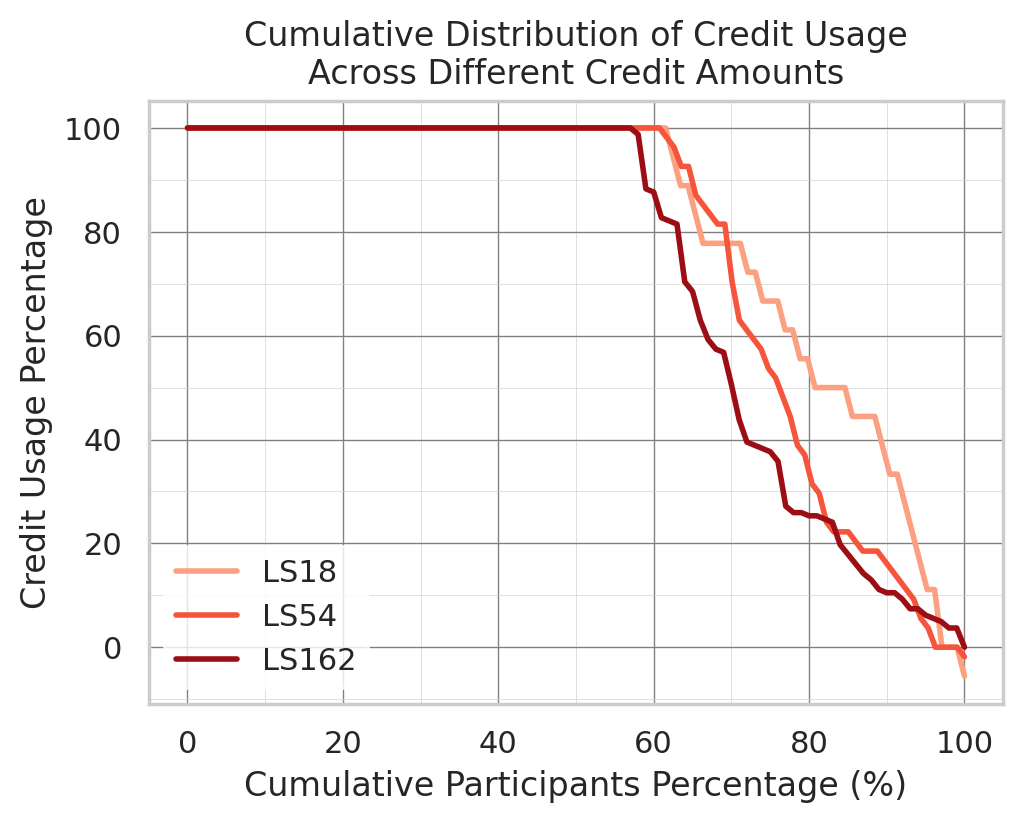

In [28]:
lqv36_raw['total_vote'] = lqv36_raw[['pets', 'art', 'education', 'environment', 'health', 'human', 'international', 'faith', 'veteran']].sum(axis=1)
lqv108_raw['total_vote'] = lqv108_raw[['pets', 'art', 'education', 'environment', 'health', 'human', 'international', 'faith', 'veteran']].sum(axis=1)
lqv324_raw['total_vote'] = lqv324_raw[['pets', 'art', 'education', 'environment', 'health', 'human', 'international', 'faith', 'veteran']].sum(axis=1)

# Recalculate usage percentages with correct max credits
lqv36_raw['usage_percentage'] = (lqv36_raw['total_vote'] / 18) * 100
lqv108_raw['usage_percentage'] = (lqv108_raw['total_vote'] / 54) * 100
lqv324_raw['usage_percentage'] = (lqv324_raw['total_vote'] / 162) * 100

# Calculate cumulative distribution for all three groups
def get_cumulative_distribution(df, max_credits):
    usage_percentages = sorted(df['usage_percentage'], reverse=True)
    population_percentage = np.linspace(0, 100, len(usage_percentages))
    return population_percentage, usage_percentages

pop_36, usage_36 = get_cumulative_distribution(lqv36_raw, 18)
pop_108, usage_108 = get_cumulative_distribution(lqv108_raw, 54)
pop_324, usage_324 = get_cumulative_distribution(lqv324_raw, 162)

# Create the cumulative distribution plot
plt.figure(figsize=(5, 4))
plt.plot(pop_36, usage_36, color=red_palette[2], linewidth=2, label='LS18')
plt.plot(pop_108, usage_108, color=red_palette[4], linewidth=2, label='LS54')
plt.plot(pop_324, usage_324, color=red_palette[7], linewidth=2, label='LS162')

plt.title('Cumulative Distribution of Credit Usage\nAcross Different Credit Amounts')
plt.xlabel('Cumulative Participants Percentage (%)')
plt.ylabel('Credit Usage Percentage')
plt.grid(True)

# Customize the grid lines
plt.grid(which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='lightgrey', linestyle='-', linewidth=0.25)

# Set the minor ticks to be every 10 units
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))

# Set the major ticks to be every 20 units
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))

plt.legend(frameon=True, facecolor='white', edgecolor='white', loc='lower left')

# Save the plot as a PDF under the "plots" directory
plt.savefig('plots/cumulative_distribution_credit_usage.pdf', format='pdf')


plt.show()

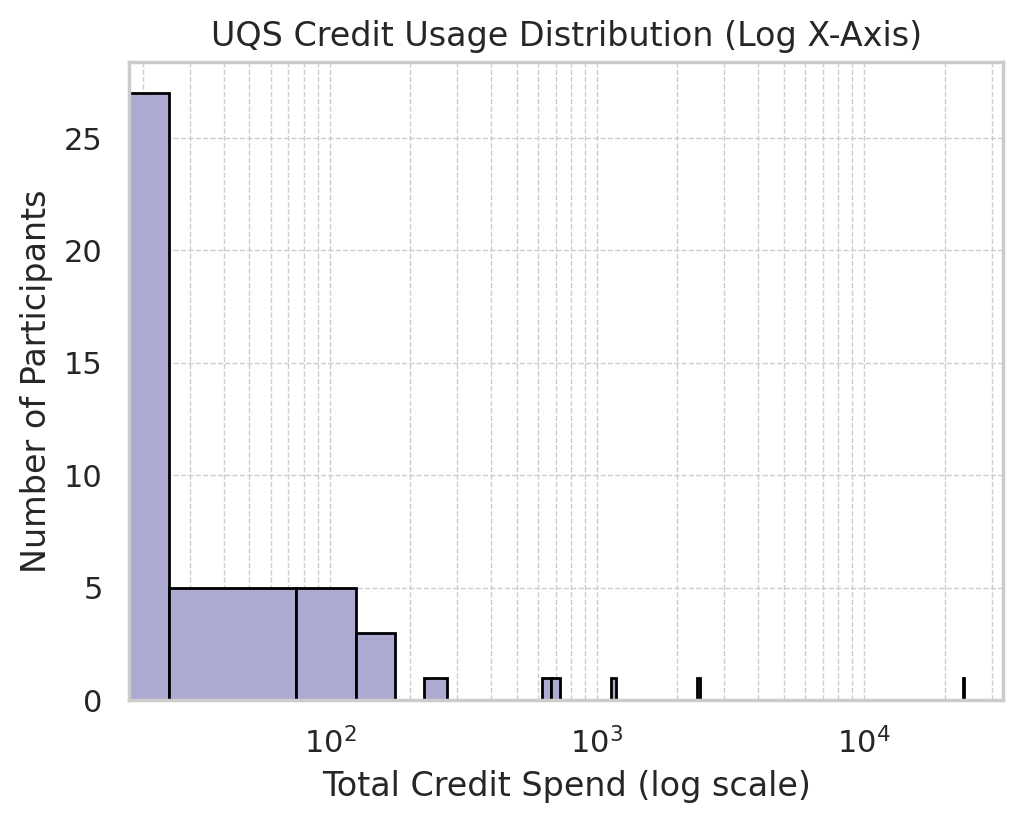

In [29]:
# Calculate total vote and credit spent
unlimited_raw['total_vote'] = unlimited_raw[['pets', 'art', 'education', 'environment', 'health', 'human', 'international', 'faith', 'veteran']].sum(axis=1)
unlimited_raw['total_credit_spent'] = unlimited_raw[['pets', 'art', 'education', 'environment', 'health', 'human', 'international', 'faith', 'veteran']].pow(2).sum(axis=1)

# Bin total credit spend by every 50 units
bins = np.arange(0, unlimited_raw['total_credit_spent'].max() + 50, 50)
uqs_bin_counts, bin_edges = np.histogram(unlimited_raw['total_credit_spent'], bins=bins)

# Plot the histogram
plt.figure(figsize=(5, 4))
plt.bar(bin_edges[:-1], uqs_bin_counts, width=50, color=purple_palette[3], edgecolor='black')

plt.xscale('log')  # Set x-axis to log scale

plt.title('UQS Credit Usage Distribution (Log X-Axis)')
plt.xlabel('Total Credit Spend (log scale)')
plt.ylabel('Number of Participants')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optional: Tweak major x-ticks for log spacing (auto is usually good)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))

# Save the plot
plt.savefig('plots/uqs_credit_usage_distribution.pdf', format='pdf')
plt.show()


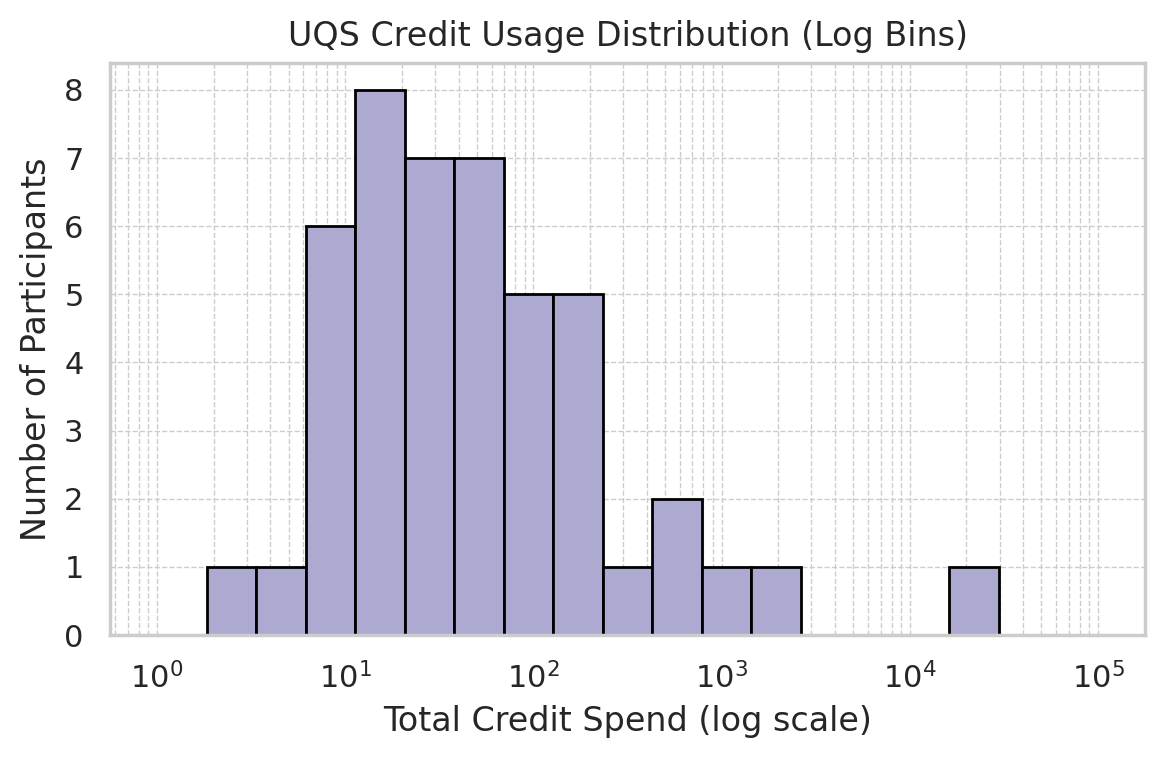

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Get nonzero credit spend values to avoid log(0)
credit_spend = unlimited_raw['total_credit_spent']
credit_spend_nonzero = credit_spend[credit_spend > 0]

# Define log-spaced bins
min_bin = np.floor(np.log10(credit_spend_nonzero.min()))
max_bin = np.ceil(np.log10(credit_spend_nonzero.max()))
log_bins = np.logspace(min_bin, max_bin, num=20)

# Plot with log-spaced bins
plt.figure(figsize=(6, 4))
plt.hist(credit_spend_nonzero, bins=log_bins, color=purple_palette[3], edgecolor='black')

plt.xscale('log')
plt.xlabel('Total Credit Spend (log scale)')
plt.ylabel('Number of Participants')
plt.title('UQS Credit Usage Distribution (Log Bins)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('plots/uqs_credit_usage_distribution_logbins.pdf', format='pdf')
plt.show()


In [31]:
# Report the maximum and minimum total vote spent
print("Max total vote spent:", unlimited_raw['total_credit_spent'].max())
print("Min total vote spent:", unlimited_raw['total_credit_spent'].min())

# Report the mean and median total vote spent
print("Mean total vote spent:", unlimited_raw['total_credit_spent'].mean())
print("Median total vote spent:", unlimited_raw['total_credit_spent'].median())

# Report the standard deviation of total vote spent
print("Standard deviation of total vote spent:", unlimited_raw['total_credit_spent'].std())

# Report the maximum vote allotted for each option
max_votes_allotted = unlimited_raw.max()
print("Max votes allotted for each option:")
print(max_votes_allotted)


Max total vote spent: 23578
Min total vote spent: 3
Mean total vote spent: 672.5434782608696
Median total vote spent: 37.5
Standard deviation of total vote spent: 3475.9634361107346
Max votes allotted for each option:
userId                61d4404c147b65eda6b6d93a
pets                                        79
art                                          8
education                                   51
environment                                105
health                                      36
human                                       31
international                               22
faith                                       21
veteran                                     23
order                                    first
total_vote_spent                           368
total_credit_spent                       23578
total_vote                                 368
dtype: object


### Data Processing

In [32]:
donate_columns = ['donation_a_pets','donation_b_art','donation_c_education','donation_d_environment','donation_e_health','donation_f_human','donation_g_international','donation_h_faith','donation_i_veteran']

# likert = likert_raw[vote_columns].to_numpy()-3 # Likert survey, normalized to -2 to 2
likert_d = likert_d_raw[donate_columns].to_numpy() # Likert donation

# qv36 = qv36_raw[vote_columns].to_numpy() # QV36 survey
qv36_d = qv36_d_raw[donate_columns].to_numpy() # QV36 donation

# qv108 = qv108_raw[vote_columns].to_numpy() # QV108 survey
qv108_d = qv108_d_raw[donate_columns].to_numpy() # QV108 donation

# qv324 = qv324_raw[vote_columns].to_numpy() # QV324 survey
qv324_d = qv324_d_raw[donate_columns].to_numpy() # QV324 donation

lqv36_d = lqv36_d_raw[donate_columns].to_numpy()
lqv108_d = lqv108_d_raw[donate_columns].to_numpy()
lqv324_d = lqv324_d_raw[donate_columns].to_numpy()

unlimited_d = unlimited_d_raw[donate_columns].to_numpy()

# print(likert[:5,:])

In [33]:
# Function to remove participants with zero total donation
def filter_nonzero(survey_data_wid, donation_data_wid, donation_data):
    d_total = np.sum(donation_data, axis=1)
    d_bool = (d_total != 0)
    survey_f = survey_data_wid[d_bool]
    donation_f = donation_data_wid[d_bool]
    total_spent = d_total[d_bool]
    donation_f['total_spent'] = total_spent
    display(donation_f.head())
    return survey_f, donation_f

In [34]:
# Remove participants with zero total donation and normalize donation amount
likert_f, likert_d_f = filter_nonzero(likert_raw, likert_d_raw, likert_d)
# likert_d_f_norm = normalize_donation_to_proportion(likert_d_f)

qv36_f, qv36_d_f = filter_nonzero(qv36_raw, qv36_d_raw, qv36_d)
display("qv36_f.shape:", qv36_f.shape)
# qv36_d_f_norm = normalize_donation_to_proportion(qv36_d_f)

qv108_f, qv108_d_f = filter_nonzero(qv108_raw, qv108_d_raw, qv108_d)
display("qv108_f.shape:", qv108_f.shape)
# qv108_d_f_norm = normalize_donation_to_proportion(qv108_d_f)

qv324_f, qv324_d_f = filter_nonzero(qv324_raw, qv324_d_raw, qv324_d)
display("qv324_f.shape:", qv324_f.shape)
# qv324_d_f_norm = normalize_donation_to_proportion(qv324_d_f)

lqv36_f, lqv36_d_f = filter_nonzero(lqv36_raw, lqv36_d_raw, lqv36_d)
display("lqv36_f.shape:", lqv36_f.shape)
# qv36_d_f_norm = normalize_donation_to_proportion(qv36_d_f)

lqv108_f, lqv108_d_f = filter_nonzero(lqv108_raw, lqv108_d_raw, lqv108_d)
display("lqv108_f.shape:", lqv108_f.shape)
# qv108_d_f_norm = normalize_donation_to_proportion(qv108_d_f)

lqv324_f, lqv324_d_f = filter_nonzero(lqv324_raw, lqv324_d_raw, lqv324_d)
display("lqv324_f.shape:", lqv324_f.shape)
# qv324_d_f_norm = normalize_donation_to_proportion(qv324_d_f)

unlimited_f, unlimited_d_f = filter_nonzero(unlimited_raw, unlimited_d_raw, unlimited_d)
display("unlimited_f.shape:", unlimited_f.shape)

_id  donation_a_pets  donation_b_art  \
0  5e62bf3aef25df51135385a6                0               0   
2  5e62d1ba6ffda4487364f75f                0               0   
3  5e6411a9789957f84988d134                0               0   
6  5e6425c4227b657a749950e4                4               0   
7  5e647a7bbec095b4abe6d64b                0               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                    12                       0                 12   
2                     0                       5                  5   
3                     0                      10                 10   
6                     0                       4                  0   
7                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                11                         0                 0   
2                 5                         0                 0   
3                 5                         0                 0   
6                 4                         0                 0   
7                 0                         0                 0   

   donation_i_veteran     time                    userId  total_spent  
0                   0  23:06.2  5e62bc5def25df51135385a3           35  
2                   0  42:02.1  5e62cfd5ef25df51135385b9           15  
3                  10  27:05.8  5e641008789957f84988d12b           35  
6                   0  52:53.0  5e64217364a3fd81b68688f3           12  
7                  15  54:19.9  5e6478e6f5e822730e8d725e           15

_id  donation_a_pets  donation_b_art  \
0  5e62c70def25df51135385af                0               0   
2  5e641352789957f84988d141                0               0   
4  5e641842789957f84988d149               10               0   
5  5e648f4c23530f5bd5b24199                0               0   
6  5e64b313a178bbb7c3b63322                5               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       5                  0   
2                     0                       0                  0   
4                     0                      10                 10   
5                     2                       0                  0   
6                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 0   
2                 5                         5                 0   
4                 0                         0                 0   
5                 2                         0                 0   
6                 5                         0                 0   

   donation_i_veteran     time                    userId  isQV  total_spent  
0                   0  56:29.8  5e62c4156ffda4487364f751     1            5  
2                   0  34:10.4  5e640f2eae7e33fbc93cdd09     2           10  
4                   5  55:14.3  5e64113fae7e33fbc93cdd10     2           35  
5                   0  23:08.1  5e6488ec23530f5bd5b24194     2            4  
6                   0  55:47.2  5e64adba54fc700d6d481f58     2           10

'qv36_f.shape:'

(76, 14)

_id  donation_a_pets  donation_b_art  \
0  5e62cde36ffda4487364f75a               10               0   
1  5e62d7fdef25df51135385bf                2               0   
2  5e636716ab9c7a51ed5b57e6                3               1   
6  5e642cf764a3fd81b68688f9                0               0   
7  5e64b313a178bbb7c3b63322                5               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       0                  0   
1                     0                       0                  5   
2                    10                      15                  2   
6                     0                       0                  0   
7                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 5   
1                 5                         0                 0   
2                 2                         0                 0   
6                15                         0                 0   
7                 5                         0                 0   

   donation_i_veteran     time                    userId  isQV  \
0                   5  25:39.2  5e62c99c6ffda4487364f757     2   
1                   5  08:45.6  5e62d3746ffda4487364f760     1   
2                   2  19:18.7  5e6363eaab9c7a51ed5b57e2     1   
6                  10  23:35.6  5e642789227b657a749950e5     2   
7                   0  55:47.2  5e64adba54fc700d6d481f58     1   

                Unnamed: 13  total_spent  
0  5e62c99c6ffda4487364f757           20  
1  5e62d3746ffda4487364f760           17  
2  5e6363eaab9c7a51ed5b57e2           35  
6  5e642789227b657a749950e5           25  
7  5e64adba54fc700d6d481f58           10

'qv108_f.shape:'

(76, 14)

_id  donation_a_pets  donation_b_art  \
0  5e62c70def25df51135385af                0               0   
1  5e62cde36ffda4487364f75a               10               0   
2  5e62d7fdef25df51135385bf                2               0   
3  5e636716ab9c7a51ed5b57e6                3               1   
4  5e641352789957f84988d141                0               0   

   donation_c_education  donation_d_environment  donation_e_health  \
0                     0                       5                  0   
1                     0                       0                  0   
2                     0                       0                  5   
3                    10                      15                  2   
4                     0                       0                  0   

   donation_f_human  donation_g_international  donation_h_faith  \
0                 0                         0                 0   
1                 0                         0                 5   
2                 5                         0                 0   
3                 2                         0                 0   
4                 5                         5                 0   

   donation_i_veteran     time                    userId  isQV  \
0                   0  56:29.8  5e62c4156ffda4487364f751     2   
1                   5  25:39.2  5e62c99c6ffda4487364f757     1   
2                   5  08:45.6  5e62d3746ffda4487364f760     2   
3                   2  19:18.7  5e6363eaab9c7a51ed5b57e2     2   
4                   0  34:10.4  5e640f2eae7e33fbc93cdd09     1   

                Unnamed: 13  total_spent  
0  5e62c4156ffda4487364f751            5  
1  5e62c99c6ffda4487364f757           20  
2  5e62d3746ffda4487364f760           17  
3  5e6363eaab9c7a51ed5b57e2           35  
4  5e640f2eae7e33fbc93cdd09           10

'qv324_f.shape:'

(84, 14)

userId  donation_g_international  donation_e_health  \
0  62ded8f8ff378df9a0d3080c                         3                  2   
2  62dedd20d1827047a2042386                         0                  0   
3  62dee339ff378df9a0d3081b                        10                  5   
4  62dee4a6d1827047a204239c                         1                  1   
5  62def631d1827047a20423b9                         2                  2   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     4                       2                 1   
2                     0                       5                 0   
3                     0                       0                10   
4                     1                       1                 1   
5                     9                       1                 2   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  \
0                3               2                   1                 1   
2                0               0                   0                 0   
3                5               0                   0                 5   
4                1               1                   0                 0   
5                5               3                   7                 4   

   total_spent  
0           19  
2            5  
3           35  
4            7  
5           35

'lqv36_f.shape:'

(91, 13)

userId  donation_g_international  donation_e_health  \
0  62dee2f5d1827047a2042395                         0                  2   
1  62dee4a6d1827047a204239c                         0                  1   
2  62def0f9d1827047a20423b1                         5                  5   
3  62def631d1827047a20423b9                         4                  1   
4  62df8d7e6181cc219f31a139                         4                  2   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     5                       0                 3   
1                     1                       0                 1   
2                     0                       5                 5   
3                     2                       7                 2   
4                     6                       5                 2   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  \
0                2               0                   5                 0   
1                1               1                   1                 1   
2                5               5                   0                 5   
3                2               5                   9                 3   
4                3               3                   5                 5   

   total_spent  
0           17  
1            7  
2           35  
3           35  
4           35

'lqv108_f.shape:'

(96, 13)

userId  donation_g_international  donation_e_health  \
0  62ded8f8ff378df9a0d3080c                         3                  2   
2  62dedd20d1827047a2042386                         0                  0   
3  62dee2f5d1827047a2042395                         3                  5   
4  62dee339ff378df9a0d3081b                        10                  5   
5  62def0f9d1827047a20423b1                         5                  0   

   donation_c_education  donation_d_environment  donation_f_human  \
0                     4                       2                 1   
2                     0                       5                 0   
3                     5                       2                 2   
4                     0                       0                10   
5                     0                       5                 5   

   donation_a_pets  donation_b_art  donation_i_veteran  donation_h_faith  \
0                3               2                   1                 1   
2                0               0                   0                 0   
3                0               0                   0                 0   
4                5               0                   0                 5   
5                5               5                   5                 5   

   total_spent  
0           19  
2            5  
3           17  
4           35  
5           35

'lqv324_f.shape:'

(87, 13)

userId  donation_i_veteran  donation_a_pets  \
0  61cce034ba78498af54e5e15                   0                0   
1  61cce3afba78498af54e5e19                   1                1   
2  61cce5dd2abead1afecf8b71                   5                5   
3  61cce84a2abead1afecf8b77                   0                5   
4  61ccf2ec2abead1afecf8b86                   2                5   

   donation_d_environment  donation_e_health  donation_b_art  \
0                       0                  0               0   
1                       1                  1               1   
2                       5                  0               5   
3                       1                  5               2   
4                       5                  5               3   

   donation_c_education  donation_f_human  donation_g_international  \
0                     0                 5                         0   
1                     1                 1                         1   
2                     5                 5                         5   
3                    10                 5                         5   
4                     5                 3                         5   

   donation_h_faith  total_spent  
0                 0            5  
1                 1            9  
2                 0           35  
3                 2           35  
4                 2           35

'unlimited_f.shape:'

(40, 14)

In [35]:
# function that calculates pair response differences
def survey_diff(qv_id, qv_survey_responses, condition, topic_columns):
    l = qv_id.shape[0]
    condition = pd.DataFrame([condition] * l, columns=['condition'])
    display(l)

    qv_pair_list = []
    for i in range(len(topic_columns)-1):
        topic_1 = topic_columns[i]
        topic_1_df = pd.DataFrame([topic_1]*l, columns=['topic_1'])

        for j in range(i+1, len(topic_columns)):
            topic_2 = topic_columns[j]
            topic_2_df = pd.DataFrame([topic_2]*l, columns=['topic_2'])

            topic_1_val = pd.DataFrame(qv_survey_responses[:,i], columns=['topic_1_val'])
            topic_2_val = pd.DataFrame(qv_survey_responses[:,j], columns=['topic_2_val'])

            vote_diff = qv_survey_responses[:,i] - qv_survey_responses[:,j]
            vote_diff_df = pd.DataFrame(vote_diff, columns=['vote_diff'])

            vote_diff_complete_df = pd.concat([qv_id.reset_index(), condition, topic_1_df, topic_1_val, topic_2_df, topic_2_val, vote_diff_df], axis=1)
            qv_pair_list.append(vote_diff_complete_df)

    # print(len(qv_pair_list))
    qv_pair = pd.concat(qv_pair_list, axis=0)
    display(qv_pair.shape)
    display(qv_pair.head())

    return qv_pair

In [36]:
def normalize_diff(diffs, min_diff, max_diff):
  diffs_norm = 2 * (diffs - min_diff) / (max_diff - min_diff) - 1
  display(diffs_norm.min(), diffs_norm.max())
  return diffs_norm

In [37]:
def normalize_diff_per_row(row, diff_col_name, total_col_name):
  diff = row[diff_col_name]
  total_used = row[total_col_name]
  if total_used != 0:
    diff_norm = 2 * (diff + total_used) / (total_used * 2) - 1
    if diff_norm < -1 or diff_norm > 1:
      display("out of range:")
      display(row)
  else:
    diff_norm = 0
  return diff_norm

#### QV

In [38]:
# function that calculates pair credit differences
def credit_diff(qv_df, new_condition):
  columns = list(qv_df.columns)
  columns.remove("vote_diff")
  qv_credit_df = qv_df[columns]
  qv_credit_df['credit_diff'] = qv_credit_df['topic_1_val'] ** 2 - qv_credit_df['topic_2_val'] ** 2
  qv_credit_df['condition'] = new_condition

  return qv_credit_df

In [39]:
qv36_pair = survey_diff(qv36_f[['userId', 'order']], qv36_f[vote_columns].to_numpy(), 'qv36', vote_columns)
qv36_pair_credit = credit_diff(qv36_pair, 'qv36_c')
# qv36_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv36_pair.csv'))

qv36_pair['vote_diff_norm'] = normalize_diff(qv36_pair['vote_diff'], -8, 8) # +5 vs -3
qv36_pair['vote_diff_ordinal'] = qv36_pair['vote_diff'] + 8
qv36_pair_credit['credit_diff_norm'] = normalize_diff(qv36_pair_credit['credit_diff'], -36, 36)
display(qv36_pair.head())

76

(2736, 9)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c4156ffda4487364f751     first      qv36    pets            2   
1      2  5e640f2eae7e33fbc93cdd09  decrease      qv36    pets            1   
2      4  5e64113fae7e33fbc93cdd10  decrease      qv36    pets            1   
3      5  5e6488ec23530f5bd5b24194  decrease      qv36    pets            1   
4      6  5e64adba54fc700d6d481f58  decrease      qv36    pets            2   

  topic_2  topic_2_val  vote_diff  
0     art            0          2  
1     art            1          0  
2     art            1          0  
3     art            2         -1  
4     art            0          2

np.float64(-0.625)

np.float64(1.0)

np.float64(-0.6944444444444444)

np.float64(0.6944444444444444)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c4156ffda4487364f751     first      qv36    pets            2   
1      2  5e640f2eae7e33fbc93cdd09  decrease      qv36    pets            1   
2      4  5e64113fae7e33fbc93cdd10  decrease      qv36    pets            1   
3      5  5e6488ec23530f5bd5b24194  decrease      qv36    pets            1   
4      6  5e64adba54fc700d6d481f58  decrease      qv36    pets            2   

  topic_2  topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0     art            0          2           0.250                 10  
1     art            1          0           0.000                  8  
2     art            1          0           0.000                  8  
3     art            2         -1          -0.125                  7  
4     art            0          2           0.250                 10

In [40]:
qv108_pair = survey_diff(qv108_f[['userId', 'order']], qv108_f[vote_columns].to_numpy(), 'qv108', vote_columns)
qv108_pair_credit = credit_diff(qv108_pair, 'qv108_c')
# qv108_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv108_pair.csv'))

qv108_pair['vote_diff_norm'] = normalize_diff(qv108_pair['vote_diff'], -14, 14)
qv108_pair['vote_diff_ordinal'] = qv108_pair['vote_diff'] + 14
qv108_pair_credit['credit_diff_norm'] = normalize_diff(qv108_pair_credit['credit_diff'], -108, 108)
display(qv108_pair.head())

76

(2736, 9)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c99c6ffda4487364f757  decrease     qv108    pets            2   
1      1  5e62d3746ffda4487364f760     first     qv108    pets            4   
2      2  5e6363eaab9c7a51ed5b57e2     first     qv108    pets            3   
3      6  5e642789227b657a749950e5  decrease     qv108    pets            4   
4      7  5e64adba54fc700d6d481f58     first     qv108    pets            4   

  topic_2  topic_2_val  vote_diff  
0     art            1          1  
1     art            0          4  
2     art            3          0  
3     art            0          4  
4     art            2          2

np.float64(-0.7142857142857143)

np.float64(1.0)

np.float64(-0.75)

np.float64(0.75)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c99c6ffda4487364f757  decrease     qv108    pets            2   
1      1  5e62d3746ffda4487364f760     first     qv108    pets            4   
2      2  5e6363eaab9c7a51ed5b57e2     first     qv108    pets            3   
3      6  5e642789227b657a749950e5  decrease     qv108    pets            4   
4      7  5e64adba54fc700d6d481f58     first     qv108    pets            4   

  topic_2  topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0     art            1          1        0.071429                 15  
1     art            0          4        0.285714                 18  
2     art            3          0        0.000000                 14  
3     art            0          4        0.285714                 18  
4     art            2          2        0.142857                 16

In [41]:
qv324_pair = survey_diff(qv324_f[['userId', 'order']], qv324_f[vote_columns].to_numpy(), 'qv324', vote_columns)
qv324_pair_credit = credit_diff(qv324_pair, 'qv324_c')
# qv324_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv324_pair.csv'))

qv324_pair['vote_diff_norm'] = normalize_diff(qv324_pair['vote_diff'], -25, 25)
qv324_pair['vote_diff_ordinal'] = qv324_pair['vote_diff'] + 25
qv324_pair_credit['credit_diff_norm'] = normalize_diff(qv324_pair_credit['credit_diff'], -324, 324)
display(qv324_pair.head())

84

(3024, 9)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c4156ffda4487364f751  increase     qv324    pets            5   
1      1  5e62c99c6ffda4487364f757     first     qv324    pets            7   
2      2  5e62d3746ffda4487364f760  increase     qv324    pets            6   
3      3  5e6363eaab9c7a51ed5b57e2  increase     qv324    pets            5   
4      4  5e640f2eae7e33fbc93cdd09     first     qv324    pets            5   

  topic_2  topic_2_val  vote_diff  
0     art            2          3  
1     art            3          4  
2     art            0          6  
3     art            5          0  
4     art            6         -1

np.float64(-0.72)

np.float64(0.76)

np.float64(-1.0)

np.float64(1.0)

index                    userId     order condition topic_1  topic_1_val  \
0      0  5e62c4156ffda4487364f751  increase     qv324    pets            5   
1      1  5e62c99c6ffda4487364f757     first     qv324    pets            7   
2      2  5e62d3746ffda4487364f760  increase     qv324    pets            6   
3      3  5e6363eaab9c7a51ed5b57e2  increase     qv324    pets            5   
4      4  5e640f2eae7e33fbc93cdd09     first     qv324    pets            5   

  topic_2  topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0     art            2          3            0.12                 28  
1     art            3          4            0.16                 29  
2     art            0          6            0.24                 31  
3     art            5          0            0.00                 25  
4     art            6         -1           -0.04                 24

In [42]:
qv_pair = pd.concat([qv36_pair, qv108_pair, qv324_pair], axis=0).reset_index()[['userId', 'condition', 'order', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff', 'vote_diff_norm', 'vote_diff_ordinal']]
display(qv_pair.head())

qv_c_pair = pd.concat([qv36_pair_credit, qv108_pair_credit, qv324_pair_credit], axis=0).reset_index()[['userId', 'condition', 'order', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'credit_diff', 'credit_diff_norm']]
qv_c_pair_renamed = qv_c_pair.rename(columns={"credit_diff": "vote_diff", "credit_diff_norm": "vote_diff_norm"})
display(qv_c_pair_renamed.head())

userId condition     order topic_1  topic_1_val topic_2  \
0  5e62c4156ffda4487364f751      qv36     first    pets            2     art   
1  5e640f2eae7e33fbc93cdd09      qv36  decrease    pets            1     art   
2  5e64113fae7e33fbc93cdd10      qv36  decrease    pets            1     art   
3  5e6488ec23530f5bd5b24194      qv36  decrease    pets            1     art   
4  5e64adba54fc700d6d481f58      qv36  decrease    pets            2     art   

   topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0            0          2           0.250                 10  
1            1          0           0.000                  8  
2            1          0           0.000                  8  
3            2         -1          -0.125                  7  
4            0          2           0.250                 10

userId condition     order topic_1  topic_1_val topic_2  \
0  5e62c4156ffda4487364f751    qv36_c     first    pets            2     art   
1  5e640f2eae7e33fbc93cdd09    qv36_c  decrease    pets            1     art   
2  5e64113fae7e33fbc93cdd10    qv36_c  decrease    pets            1     art   
3  5e6488ec23530f5bd5b24194    qv36_c  decrease    pets            1     art   
4  5e64adba54fc700d6d481f58    qv36_c  decrease    pets            2     art   

   topic_2_val  vote_diff  vote_diff_norm  
0            0          4        0.111111  
1            1          0        0.000000  
2            1          0        0.000000  
3            2         -3       -0.083333  
4            0          4        0.111111

#### Likert

In [43]:
likert_pair = survey_diff(likert_f[['userId', 'order']], likert_f[vote_columns].to_numpy(), 'likert', vote_columns)
# likert_pair.to_csv(os.path.join(OUTPUT_PATH, 'likert_pair.csv'))
likert_pair['vote_diff_norm'] = normalize_diff(likert_pair['vote_diff'], -4, 4)
likert_pair['vote_diff_ordinal'] = likert_pair['vote_diff'] + 4
display(likert_pair.head())

44

(1584, 9)

index                    userId  order condition topic_1  topic_1_val  \
0      0  5e62bc5def25df51135385a3  first    likert    pets            3   
1      2  5e62cfd5ef25df51135385b9  first    likert    pets            4   
2      3  5e641008789957f84988d12b  first    likert    pets            3   
3      6  5e64217364a3fd81b68688f3  first    likert    pets            5   
4      7  5e6478e6f5e822730e8d725e  first    likert    pets            4   

  topic_2  topic_2_val  vote_diff  
0     art            3          0  
1     art            4          0  
2     art            3          0  
3     art            4          1  
4     art            3          1

np.float64(-1.0)

np.float64(1.0)

index                    userId  order condition topic_1  topic_1_val  \
0      0  5e62bc5def25df51135385a3  first    likert    pets            3   
1      2  5e62cfd5ef25df51135385b9  first    likert    pets            4   
2      3  5e641008789957f84988d12b  first    likert    pets            3   
3      6  5e64217364a3fd81b68688f3  first    likert    pets            5   
4      7  5e6478e6f5e822730e8d725e  first    likert    pets            4   

  topic_2  topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0     art            3          0            0.00                  4  
1     art            4          0            0.00                  4  
2     art            3          0            0.00                  4  
3     art            4          1            0.25                  5  
4     art            3          1            0.25                  5

#### LQV

In [44]:
lqv36_pair = survey_diff(lqv36_f[['userId', 'order']], lqv36_f[vote_columns].to_numpy(), 'lqv36', vote_columns)
# lqv36_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv36_pair.csv'))
lqv36_pair['vote_diff_norm'] = normalize_diff(lqv36_pair['vote_diff'], -18, 18)

91

(3276, 9)

index                    userId     order condition topic_1  topic_1_val  \
0      0  62ded8f8ff378df9a0d3080c     first     lqv36    pets            4   
1      2  62dedd20d1827047a2042386  decrease     lqv36    pets            0   
2      3  62dee339ff378df9a0d3081b  decrease     lqv36    pets            2   
3      4  62dee4a6d1827047a204239c  decrease     lqv36    pets            1   
4      5  62def631d1827047a20423b9  decrease     lqv36    pets            5   

  topic_2  topic_2_val  vote_diff  
0     art            3          1  
1     art            1         -1  
2     art            3         -1  
3     art            1          0  
4     art            3          2

np.float64(-1.0)

np.float64(1.0)

In [45]:
lqv108_pair = survey_diff(lqv108_f[['userId', 'order']], lqv108_f[vote_columns].to_numpy(), 'lqv108', vote_columns)
# lqv108_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv108_pair.csv'))
lqv108_pair['vote_diff_norm'] = normalize_diff(lqv108_pair['vote_diff'], -54, 54)

96

(3456, 9)

index                    userId  order condition topic_1  topic_1_val  \
0      0  62dee2f5d1827047a2042395  first    lqv108    pets           11   
1      1  62dee4a6d1827047a204239c  first    lqv108    pets            5   
2      2  62def0f9d1827047a20423b1  first    lqv108    pets           14   
3      3  62def631d1827047a20423b9  first    lqv108    pets           14   
4      4  62df8d7e6181cc219f31a139  first    lqv108    pets           17   

  topic_2  topic_2_val  vote_diff  
0     art            5          6  
1     art            5          0  
2     art            9          5  
3     art            9          5  
4     art            9          8

np.float64(-1.0)

np.float64(1.0)

In [46]:
lqv324_pair = survey_diff(lqv324_f[['userId', 'order']], lqv324_f[vote_columns].to_numpy(), 'lqv324', vote_columns)
# lqv324_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv324_pair.csv'))
lqv324_pair['vote_diff_norm'] = normalize_diff(lqv324_pair['vote_diff'], -162, 162)

87

(3132, 9)

index                    userId     order condition topic_1  topic_1_val  \
0      0  62ded8f8ff378df9a0d3080c  increase    lqv324    pets            3   
1      2  62dedd20d1827047a2042386     first    lqv324    pets            5   
2      3  62dee2f5d1827047a2042395  increase    lqv324    pets           27   
3      4  62dee339ff378df9a0d3081b     first    lqv324    pets           13   
4      5  62def0f9d1827047a20423b1  increase    lqv324    pets           39   

  topic_2  topic_2_val  vote_diff  
0     art            4         -1  
1     art           10         -5  
2     art           13         14  
3     art           21         -8  
4     art           13         26

np.float64(-0.6296296296296297)

np.float64(1.0)

#### Unlimited

In [47]:
unlimited_pair = survey_diff(unlimited_f[['userId', 'order', 'total_vote_spent', 'total_credit_spent']], unlimited_f[vote_columns].to_numpy(), 'unlimited', vote_columns)
unlimited_pair_credit = credit_diff(unlimited_pair, 'unlimited_c')
display(unlimited_pair_credit.head())
# unlimited_pair.to_csv(os.path.join(OUTPUT_PATH, 'unlimited_pair.csv'))

# Votes for unlimited QV
unlimited_pair['vote_diff_norm'] = unlimited_pair.apply(normalize_diff_per_row, axis=1, args=('vote_diff', 'total_vote_spent',))
unlimited_pair.head()
display(unlimited_pair['vote_diff_norm'].min(), unlimited_pair['vote_diff_norm'].max())

# Credits for unlimited QV, column "credit_diff_norm" is renamed as "vote_diff_norm" to enable concatenation
unlimited_pair_credit['vote_diff_norm'] = unlimited_pair_credit.apply(normalize_diff_per_row, axis=1, args=('credit_diff', 'total_credit_spent',))
unlimited_pair_credit.head()
display(unlimited_pair_credit['vote_diff_norm'].min(), unlimited_pair['vote_diff_norm'].max())

40

(1440, 11)

index                    userId  order  total_vote_spent  \
0      0  61cce034ba78498af54e5e15  first                28   
1      1  61cce3afba78498af54e5e19  first                24   
2      2  61cce5dd2abead1afecf8b71  first                15   
3      3  61cce84a2abead1afecf8b77  first                20   
4      4  61ccf2ec2abead1afecf8b86  first                 9   

   total_credit_spent  condition topic_1  topic_1_val topic_2  topic_2_val  \
0                 104  unlimited    pets            3     art            4   
1                  78  unlimited    pets            2     art            2   
2                  31  unlimited    pets            2     art            2   
3                  72  unlimited    pets            0     art            5   
4                  15  unlimited    pets            1     art            1   

   vote_diff  
0         -1  
1          0  
2          0  
3         -5  
4          0

index                    userId  order  total_vote_spent  \
0      0  61cce034ba78498af54e5e15  first                28   
1      1  61cce3afba78498af54e5e19  first                24   
2      2  61cce5dd2abead1afecf8b71  first                15   
3      3  61cce84a2abead1afecf8b77  first                20   
4      4  61ccf2ec2abead1afecf8b86  first                 9   

   total_credit_spent    condition topic_1  topic_1_val topic_2  topic_2_val  \
0                 104  unlimited_c    pets            3     art            4   
1                  78  unlimited_c    pets            2     art            2   
2                  31  unlimited_c    pets            2     art            2   
3                  72  unlimited_c    pets            0     art            5   
4                  15  unlimited_c    pets            1     art            1   

   credit_diff  
0           -7  
1            0  
2            0  
3          -25  
4            0

np.float64(-0.75)

np.float64(0.5)

np.float64(-0.6722222222222223)

np.float64(0.5)

#### Concatenate

In [48]:
shared_cols = ['userId', 'condition', 'order', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff', 'vote_diff_norm']
# unlimited_pair_selected = unlimited_pair[shared_cols]

all_pair = pd.concat([qv_pair, qv_c_pair_renamed, likert_pair, lqv36_pair, lqv108_pair, lqv324_pair, unlimited_pair, unlimited_pair_credit], axis=0).reset_index()[['userId', 'condition', 'order', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff', 'vote_diff_norm', 'vote_diff_ordinal']]
all_pair['vote_diff_ordinal'] = all_pair['vote_diff_ordinal'].astype('Int64')

display(all_pair.head())
display(all_pair.shape)
all_pair.to_csv(os.path.join(OUTPUT_PATH, 'all_pair.csv'))

userId condition     order topic_1  topic_1_val topic_2  \
0  5e62c4156ffda4487364f751      qv36     first    pets            2     art   
1  5e640f2eae7e33fbc93cdd09      qv36  decrease    pets            1     art   
2  5e64113fae7e33fbc93cdd10      qv36  decrease    pets            1     art   
3  5e6488ec23530f5bd5b24194      qv36  decrease    pets            1     art   
4  5e64adba54fc700d6d481f58      qv36  decrease    pets            2     art   

   topic_2_val  vote_diff  vote_diff_norm  vote_diff_ordinal  
0            0        2.0           0.250                 10  
1            1        0.0           0.000                  8  
2            1        0.0           0.000                  8  
3            2       -1.0          -0.125                  7  
4            0        2.0           0.250                 10

(31320, 10)

In [49]:
frequency_df = all_pair.groupby(['userId', 'condition', 'topic_1', 'topic_2', 'vote_diff']).size().reset_index(name='Frequency')
duplicated_bool = frequency_df['Frequency'] > 1
rows_duplicated = frequency_df[duplicated_bool]
display(rows_duplicated.shape)

(72, 6)

In [50]:
all_pair_unique = all_pair.drop_duplicates(subset=['userId', 'condition', 'topic_1', 'topic_2', 'order', 'topic_1_val', 'topic_2_val', 'vote_diff'])
display(all_pair_unique.shape)

(31248, 10)

In [51]:
ordinal_pair = all_pair_unique[all_pair_unique['condition'].isin(['qv36', 'qv108', 'qv324', 'likert'])]
ordinal_pair['vote_diff_ordinal'].value_counts()

vote_diff_ordinal
8     820
4     724
14    580
5     512
25    500
9     497
10    435
11    428
6     402
7     395
12    380
13    313
3     309
15    306
16    266
24    244
18    232
17    231
26    220
19    208
20    202
22    179
27    177
23    175
21    167
28    165
29    156
30    150
31    121
2      95
32     93
33     80
34     70
35     55
37     42
1      40
36     37
39     19
0      16
38     15
40     13
41      5
43      4
42      1
44      1
Name: count, dtype: Int64

#### Donation

In [52]:
qv36_d_pair = survey_diff(qv36_d_f[['userId', 'total_spent']], qv36_d_f[donate_columns].to_numpy(), 'qv36', vote_columns)
# qv36_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv36_d_pair.csv'))'
qv36_d_pair_credit = survey_diff(qv36_d_f[['userId', 'total_spent']], qv36_d_f[donate_columns].to_numpy(), 'qv36_c', vote_columns)

76

(2736, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c4156ffda4487364f751            5      qv36    pets   
1      2  5e640f2eae7e33fbc93cdd09           10      qv36    pets   
2      4  5e64113fae7e33fbc93cdd10           35      qv36    pets   
3      5  5e6488ec23530f5bd5b24194            4      qv36    pets   
4      6  5e64adba54fc700d6d481f58           10      qv36    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1            0     art            0          0  
2           10     art            0         10  
3            0     art            0          0  
4            5     art            0          5

76

(2736, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c4156ffda4487364f751            5    qv36_c    pets   
1      2  5e640f2eae7e33fbc93cdd09           10    qv36_c    pets   
2      4  5e64113fae7e33fbc93cdd10           35    qv36_c    pets   
3      5  5e6488ec23530f5bd5b24194            4    qv36_c    pets   
4      6  5e64adba54fc700d6d481f58           10    qv36_c    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1            0     art            0          0  
2           10     art            0         10  
3            0     art            0          0  
4            5     art            0          5

In [53]:
qv108_d_pair = survey_diff(qv108_d_f[['userId', 'total_spent']], qv108_d_f[donate_columns].to_numpy(), 'qv108', vote_columns)
# qv108_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv108_d_pair.csv'))
qv108_d_pair_credit = survey_diff(qv108_d_f[['userId', 'total_spent']], qv108_d_f[donate_columns].to_numpy(), 'qv108_c', vote_columns)

76

(2736, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c99c6ffda4487364f757           20     qv108    pets   
1      1  5e62d3746ffda4487364f760           17     qv108    pets   
2      2  5e6363eaab9c7a51ed5b57e2           35     qv108    pets   
3      6  5e642789227b657a749950e5           25     qv108    pets   
4      7  5e64adba54fc700d6d481f58           10     qv108    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0           10     art            0         10  
1            2     art            0          2  
2            3     art            1          2  
3            0     art            0          0  
4            5     art            0          5

76

(2736, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c99c6ffda4487364f757           20   qv108_c    pets   
1      1  5e62d3746ffda4487364f760           17   qv108_c    pets   
2      2  5e6363eaab9c7a51ed5b57e2           35   qv108_c    pets   
3      6  5e642789227b657a749950e5           25   qv108_c    pets   
4      7  5e64adba54fc700d6d481f58           10   qv108_c    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0           10     art            0         10  
1            2     art            0          2  
2            3     art            1          2  
3            0     art            0          0  
4            5     art            0          5

In [54]:
qv324_d_pair = survey_diff(qv324_d_f[['userId', 'total_spent']], qv324_d_f[donate_columns].to_numpy(), 'qv324', vote_columns)
# qv324_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'qv324_d_pair.csv'))
qv324_d_pair_credit = survey_diff(qv324_d_f[['userId', 'total_spent']], qv324_d_f[donate_columns].to_numpy(), 'qv324_c', vote_columns)

84

(3024, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c4156ffda4487364f751            5     qv324    pets   
1      1  5e62c99c6ffda4487364f757           20     qv324    pets   
2      2  5e62d3746ffda4487364f760           17     qv324    pets   
3      3  5e6363eaab9c7a51ed5b57e2           35     qv324    pets   
4      4  5e640f2eae7e33fbc93cdd09           10     qv324    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1           10     art            0         10  
2            2     art            0          2  
3            3     art            1          2  
4            0     art            0          0

84

(3024, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62c4156ffda4487364f751            5   qv324_c    pets   
1      1  5e62c99c6ffda4487364f757           20   qv324_c    pets   
2      2  5e62d3746ffda4487364f760           17   qv324_c    pets   
3      3  5e6363eaab9c7a51ed5b57e2           35   qv324_c    pets   
4      4  5e640f2eae7e33fbc93cdd09           10   qv324_c    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1           10     art            0         10  
2            2     art            0          2  
3            3     art            1          2  
4            0     art            0          0

In [55]:
likert_d_pair = survey_diff(likert_d_f[['userId', 'total_spent']], likert_d_f[donate_columns].to_numpy(), 'likert', vote_columns)
# likert_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'likert_d_pair.csv'))

44

(1584, 9)

index                    userId  total_spent condition topic_1  \
0      0  5e62bc5def25df51135385a3           35    likert    pets   
1      2  5e62cfd5ef25df51135385b9           15    likert    pets   
2      3  5e641008789957f84988d12b           35    likert    pets   
3      6  5e64217364a3fd81b68688f3           12    likert    pets   
4      7  5e6478e6f5e822730e8d725e           15    likert    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1            0     art            0          0  
2            0     art            0          0  
3            4     art            0          4  
4            0     art            0          0

In [56]:
lqv36_d_pair = survey_diff(lqv36_d_f[['userId', 'total_spent']], lqv36_d_f[donate_columns].to_numpy(), 'lqv36', vote_columns)
# lqv36_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv36_d_pair.csv'))

91

(3276, 9)

index                    userId  total_spent condition topic_1  \
0      0  62ded8f8ff378df9a0d3080c           19     lqv36    pets   
1      2  62dedd20d1827047a2042386            5     lqv36    pets   
2      3  62dee339ff378df9a0d3081b           35     lqv36    pets   
3      4  62dee4a6d1827047a204239c            7     lqv36    pets   
4      5  62def631d1827047a20423b9           35     lqv36    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            3     art            2          1  
1            0     art            0          0  
2            5     art            0          5  
3            1     art            1          0  
4            5     art            3          2

In [57]:
lqv108_d_pair = survey_diff(lqv108_d_f[['userId', 'total_spent']], lqv108_d_f[donate_columns].to_numpy(), 'lqv108', vote_columns)
# lqv108_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv108_d_pair.csv'))

96

(3456, 9)

index                    userId  total_spent condition topic_1  \
0      0  62dee2f5d1827047a2042395           17    lqv108    pets   
1      1  62dee4a6d1827047a204239c            7    lqv108    pets   
2      2  62def0f9d1827047a20423b1           35    lqv108    pets   
3      3  62def631d1827047a20423b9           35    lqv108    pets   
4      4  62df8d7e6181cc219f31a139           35    lqv108    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            2     art            0          2  
1            1     art            1          0  
2            5     art            5          0  
3            2     art            5         -3  
4            3     art            3          0

In [58]:
lqv324_d_pair = survey_diff(lqv324_d_f[['userId', 'total_spent']], lqv324_d_f[donate_columns].to_numpy(), 'lqv324', vote_columns)
# lqv324_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'lqv324_d_pair.csv'))

87

(3132, 9)

index                    userId  total_spent condition topic_1  \
0      0  62ded8f8ff378df9a0d3080c           19    lqv324    pets   
1      2  62dedd20d1827047a2042386            5    lqv324    pets   
2      3  62dee2f5d1827047a2042395           17    lqv324    pets   
3      4  62dee339ff378df9a0d3081b           35    lqv324    pets   
4      5  62def0f9d1827047a20423b1           35    lqv324    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            3     art            2          1  
1            0     art            0          0  
2            0     art            0          0  
3            5     art            0          5  
4            5     art            5          0

In [59]:
unlimited_d_pair = survey_diff(unlimited_d_f[['userId', 'total_spent']], unlimited_d_f[donate_columns].to_numpy(), 'unlimited', vote_columns)
# unlimited_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'unlimited_d_pair.csv'))
unlimited_d_pair_credit = survey_diff(unlimited_d_f[['userId', 'total_spent']], unlimited_d_f[donate_columns].to_numpy(), 'unlimited_c', vote_columns)

40

(1440, 9)

index                    userId  total_spent  condition topic_1  \
0      0  61cce034ba78498af54e5e15            5  unlimited    pets   
1      1  61cce3afba78498af54e5e19            9  unlimited    pets   
2      2  61cce5dd2abead1afecf8b71           35  unlimited    pets   
3      3  61cce84a2abead1afecf8b77           35  unlimited    pets   
4      4  61ccf2ec2abead1afecf8b86           35  unlimited    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1            1     art            1          0  
2            5     art            5          0  
3            5     art            2          3  
4            5     art            3          2

40

(1440, 9)

index                    userId  total_spent    condition topic_1  \
0      0  61cce034ba78498af54e5e15            5  unlimited_c    pets   
1      1  61cce3afba78498af54e5e19            9  unlimited_c    pets   
2      2  61cce5dd2abead1afecf8b71           35  unlimited_c    pets   
3      3  61cce84a2abead1afecf8b77           35  unlimited_c    pets   
4      4  61ccf2ec2abead1afecf8b86           35  unlimited_c    pets   

   topic_1_val topic_2  topic_2_val  vote_diff  
0            0     art            0          0  
1            1     art            1          0  
2            5     art            5          0  
3            5     art            2          3  
4            5     art            3          2

In [60]:
all_d_pair = pd.concat([qv36_d_pair, qv108_d_pair, qv324_d_pair, qv36_d_pair_credit, qv108_d_pair_credit, qv324_d_pair_credit, likert_d_pair, lqv36_d_pair, lqv108_d_pair, lqv324_d_pair, unlimited_d_pair, unlimited_d_pair_credit], axis=0).reset_index()[['userId', 'condition', 'topic_1', 'topic_1_val', 'topic_2', 'topic_2_val', 'vote_diff', 'total_spent']]
all_d_pair['vote_diff_norm'] = all_d_pair.apply(normalize_diff_per_row, axis=1, args=('vote_diff', 'total_spent',))

all_d_pair = all_d_pair.rename(columns={"vote_diff": "donation_diff", "vote_diff_norm": "donation_diff_norm"})

display(all_d_pair.head())
display(all_d_pair['donation_diff_norm'].min(), all_d_pair['donation_diff_norm'].max())
display(all_d_pair.shape)
all_d_pair.to_csv(os.path.join(OUTPUT_PATH, 'all_d_pair.csv'))

userId condition topic_1  topic_1_val topic_2  \
0  5e62c4156ffda4487364f751      qv36    pets            0     art   
1  5e640f2eae7e33fbc93cdd09      qv36    pets            0     art   
2  5e64113fae7e33fbc93cdd10      qv36    pets           10     art   
3  5e6488ec23530f5bd5b24194      qv36    pets            0     art   
4  5e64adba54fc700d6d481f58      qv36    pets            5     art   

   topic_2_val  donation_diff  total_spent  donation_diff_norm  
0            0              0            5            0.000000  
1            0              0           10            0.000000  
2            0             10           35            0.285714  
3            0              0            4            0.000000  
4            0              5           10            0.500000

np.float64(-1.0)

np.float64(1.0)

(31320, 9)

In [61]:
frequency_df = all_d_pair.groupby(['userId', 'condition', 'topic_1', 'topic_2']).size().reset_index(name='Frequency')
duplicated_bool = frequency_df['Frequency'] > 1
rows_duplicated = frequency_df[duplicated_bool]
display(rows_duplicated.shape)

(72, 5)

In [62]:
all_d_pair_unique = all_d_pair.drop_duplicates(subset=['userId', 'condition', 'topic_1', 'topic_2'])
display(all_d_pair_unique.shape)

(31248, 9)

## Join donation and survey dataframes

In [63]:
all_pair_comp = all_pair_unique.merge(all_d_pair_unique, how='left', on=['userId', 'condition', 'topic_1', 'topic_2'], suffixes=("_vote", "_donation"))
display(all_pair_comp.shape)
all_pair_comp.head()

(31248, 15)

userId condition     order topic_1  topic_1_val_vote  \
0  5e62c4156ffda4487364f751      qv36     first    pets                 2   
1  5e640f2eae7e33fbc93cdd09      qv36  decrease    pets                 1   
2  5e64113fae7e33fbc93cdd10      qv36  decrease    pets                 1   
3  5e6488ec23530f5bd5b24194      qv36  decrease    pets                 1   
4  5e64adba54fc700d6d481f58      qv36  decrease    pets                 2   

  topic_2  topic_2_val_vote  vote_diff  vote_diff_norm  vote_diff_ordinal  \
0     art                 0        2.0           0.250                 10   
1     art                 1        0.0           0.000                  8   
2     art                 1        0.0           0.000                  8   
3     art                 2       -1.0          -0.125                  7   
4     art                 0        2.0           0.250                 10   

   topic_1_val_donation  topic_2_val_donation  donation_diff  total_spent  \
0                     0                     0              0            5   
1                     0                     0              0           10   
2                    10                     0             10           35   
3                     0                     0              0            4   
4                     5                     0              5           10   

   donation_diff_norm  
0            0.000000  
1            0.000000  
2            0.285714  
3            0.000000  
4            0.500000

In [64]:
frequency_df = all_pair_comp.groupby(['userId', 'condition', 'topic_1', 'topic_2']).size().reset_index(name='Frequency')
rows_duplicated = frequency_df[frequency_df['Frequency'] > 1]
display(rows_duplicated.shape)

(0, 5)

In [65]:
display(all_pair_comp['vote_diff_norm'].min(), all_pair_comp['vote_diff_norm'].max())
display(all_pair_comp['donation_diff_norm'].min(), all_pair_comp['donation_diff_norm'].max())
# print(all_pair_comp['vote_diff_ordinal'].value_counts())

np.float64(-1.0)

np.float64(1.0)

np.float64(-1.0)

np.float64(1.0)

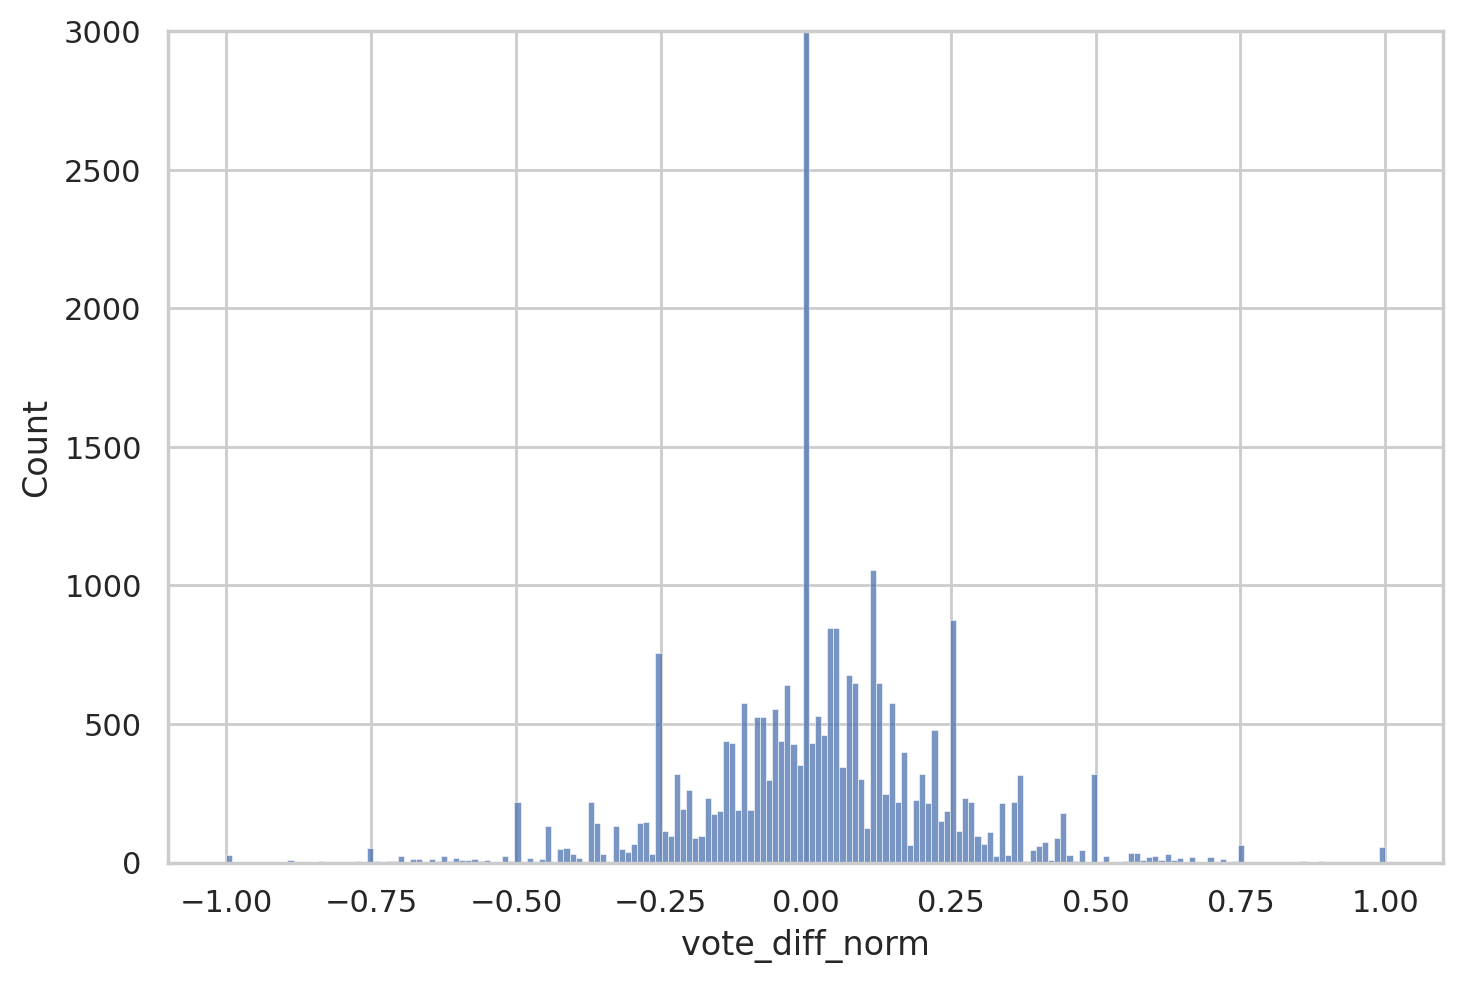

In [66]:
sns.histplot(all_pair_comp['vote_diff_norm'])
plt.ylim(0, 3000)
plt.show()

In [67]:
vote_norm_mean = all_pair_comp['vote_diff_norm'].mean()
vote_norm_median = all_pair_comp['vote_diff_norm'].median()
vote_norm_std = all_pair_comp['vote_diff_norm'].std()
display(vote_norm_mean, vote_norm_median, vote_norm_std)

np.float64(0.02387966197845284)

np.float64(0.0)

np.float64(0.2017556889969424)

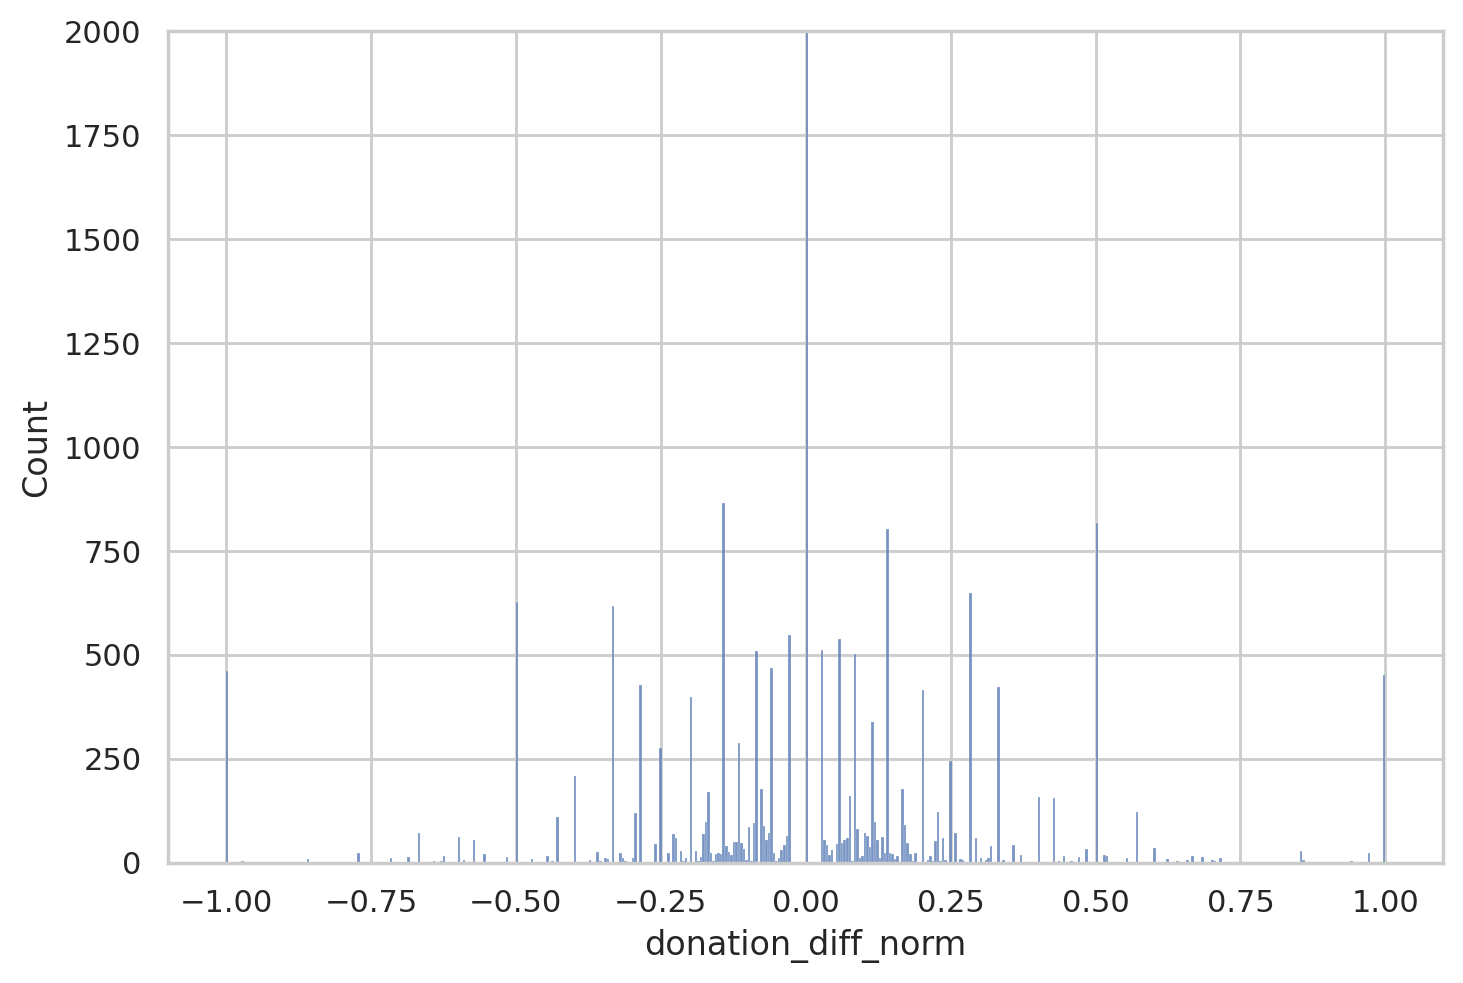

In [68]:
sns.histplot(all_pair_comp['donation_diff_norm'])
plt.ylim(0, 2000)
plt.show()

In [69]:
display(all_pair_comp[all_pair_comp['donation_diff_norm'] == 0].shape)

(14726, 15)

In [70]:
display(all_pair_comp[(all_pair_comp['donation_diff_norm'] == 0) & (all_pair_comp['topic_1_val_donation'] == 0) & (all_pair_comp['topic_2_val_donation'] == 0)].shape)

(9691, 15)

#### Separate Ordinal and Continuous Conditions

In [71]:
# Ordinal conditions
all_pair_comp_ordinal = all_pair_comp[all_pair_comp['condition'].isin(['qv36', 'qv108', 'qv324', 'likert'])]

def add_ordinal_level(row, ordinal_lvl_dict):
  condition = row['condition']
  ordinal_lvl = ordinal_lvl_dict[condition]
  return ordinal_lvl

ordinal_lvl_dict = {
    'qv36': 17,
    'qv108': 29,
    'qv324':51,
    'likert': 9
}

all_pair_comp_ordinal['ordinal_lvl'] = all_pair_comp_ordinal.apply(add_ordinal_level, axis=1, args=(ordinal_lvl_dict,))

all_pair_comp_ordinal.head()


userId condition     order topic_1  topic_1_val_vote  \
0  5e62c4156ffda4487364f751      qv36     first    pets                 2   
1  5e640f2eae7e33fbc93cdd09      qv36  decrease    pets                 1   
2  5e64113fae7e33fbc93cdd10      qv36  decrease    pets                 1   
3  5e6488ec23530f5bd5b24194      qv36  decrease    pets                 1   
4  5e64adba54fc700d6d481f58      qv36  decrease    pets                 2   

  topic_2  topic_2_val_vote  vote_diff  vote_diff_norm  vote_diff_ordinal  \
0     art                 0        2.0           0.250                 10   
1     art                 1        0.0           0.000                  8   
2     art                 1        0.0           0.000                  8   
3     art                 2       -1.0          -0.125                  7   
4     art                 0        2.0           0.250                 10   

   topic_1_val_donation  topic_2_val_donation  donation_diff  total_spent  \
0                     0                     0              0            5   
1                     0                     0              0           10   
2                    10                     0             10           35   
3                     0                     0              0            4   
4                     5                     0              5           10   

   donation_diff_norm  ordinal_lvl  
0            0.000000           17  
1            0.000000           17  
2            0.285714           17  
3            0.000000           17  
4            0.500000           17

In [72]:
# Further breakdown ordinal conditions, one condition per dataframe
qv36_pair_ordinal = all_pair_comp_ordinal[all_pair_comp_ordinal['condition'].isin(['qv36'])]
qv108_pair_ordinal = all_pair_comp_ordinal[all_pair_comp_ordinal['condition'].isin(['qv108'])]
qv324_pair_ordinal = all_pair_comp_ordinal[all_pair_comp_ordinal['condition'].isin(['qv324'])]
likert_pair_ordinal = all_pair_comp_ordinal[all_pair_comp_ordinal['condition'].isin(['likert'])]

In [73]:
# Continuous conditions
all_pair_comp_continuous = all_pair_comp[all_pair_comp['condition'].isin(['qv36_c', 'qv108_c', 'qv324_c', 'lqv36', 'lqv108', 'lqv324', 'unlimited', 'unlimited_c'])]

def add_condition_id(row, condition_id_dict):
  condition = row['condition']
  condition_id = condition_id_dict[condition]
  return condition_id

# Index(['likert', 'lqv108', 'lqv324', 'lqv36', 'qv108', 'qv108_c', 'qv324',
#   'qv324_c', 'qv36', 'qv36_c', 'unlimited', 'unlimited_c'],

condition_id_dict = {
    'qv36_c': 9,
    'qv108_c': 5,
    'qv324_c': 7,
    'lqv36': 3,
    'lqv108': 1,
    'lqv324': 2,
    'unlimited': 10,
    'unlimited_c': 11
}

all_pair_comp_continuous['condition_id'] = all_pair_comp_continuous.apply(add_condition_id, axis=1, args=(condition_id_dict,))

all_pair_comp_continuous.head()

all_pair_comp_continuous.to_csv(os.path.join(OUTPUT_PATH, 'all_pair_comp_continuous.csv'))

### Plot Ordinal and Continous variable Results

In [74]:
model_data = az.from_netcdf(MODEL_PATH + '/numpyro_intensity_ord_cont_0323_500_2000.trace')

In [75]:
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator

def plot_posterior_predictive_cumulative(data, xlabel):
  axs = az.plot_ppc(data=data,
              group='posterior',
              kind='cumulative',
              random_seed=5,
              colors=[neutral_gray, base_color, accent_color])

  z = axs
  axs.set_title('Posterior Predictive', size=12)
  z.set_xlabel(xlabel, fontsize=16)  # no individual labels
  z.set_ylabel("Density", fontsize=16)
  z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  z.spines['right'].set_visible(False)
  z.spines['top'].set_visible(False)
  z.spines['left'].set_visible(False)
  z.spines['bottom'].set_visible(False)
  z.spines['bottom'].set_position(('outward', 10))
  z.xaxis.set_minor_locator(AutoMinorLocator(5))
  z.set_xlim(left=-2, right=2)
  z.tick_params(which='both', width=2)
  z.tick_params(which='major', length=7)
  z.tick_params(which='minor', length=4, color=neutral_gray)

  # plt.subplots_adjust(hspace=0.75, wspace=0.1)
  # filename = 'plots/' +Title + '.pdf'
  # plt.savefig(filename, transparent=False)
  plt.show()
  # rc('text', usetex=False)


# plot_posterior_predictive_cumulative(model_data, 'Normalized Donation Difference')

In [76]:
az.summary(data=model_data,
          var_names=[
              # 'b_cond_bar', 'sigma_cond',
              'b_cond',
              'b_vote_bar', 'sigma_vote', 'b_vote',
              'b_topic_bar', 'sigma_topic', 'b_topic',
              'b_order_bar', 'sigma_order', 'b_order',
              'b_sigma'
          ],
           round_to=2
          )

mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
b_cond[likert]         -0.16  0.08     -0.28      -0.04       0.00     0.00   
b_cond[lqv108]          0.15  0.06      0.05       0.24       0.00     0.00   
b_cond[lqv324]          0.14  0.06      0.05       0.24       0.00     0.00   
b_cond[lqv36]           0.14  0.06      0.04       0.23       0.00     0.00   
b_cond[qv108]          -0.32  0.08     -0.45      -0.19       0.00     0.00   
b_cond[qv108_c]         0.14  0.06      0.05       0.24       0.00     0.00   
b_cond[qv324]          -0.36  0.07     -0.47      -0.24       0.00     0.00   
b_cond[qv324_c]         0.12  0.06      0.03       0.22       0.00     0.00   
b_cond[qv36]           -0.29  0.09     -0.43      -0.14       0.00     0.00   
b_cond[qv36_c]          0.15  0.06      0.05       0.24       0.00     0.00   
b_cond[unlimited]       0.14  0.06      0.04       0.23       0.00     0.00   
b_cond[unlimited_c]     0.14  0.06      0.04       0.22       0.00     0.00   
b_vote_bar              0.50  0.14      0.29       0.71       0.00     0.00   
sigma_vote              0.45  0.11      0.28       0.61       0.00     0.00   
b_vote[likert]          0.52  0.06      0.42       0.62       0.00     0.00   
b_vote[lqv108]         -0.03  0.02     -0.07      -0.00       0.00     0.00   
b_vote[lqv324]          0.08  0.03      0.04       0.12       0.00     0.00   
b_vote[lqv36]           0.09  0.02      0.06       0.12       0.00     0.00   
b_vote[qv108]           1.08  0.11      0.90       1.26       0.00     0.00   
b_vote[qv108_c]         0.68  0.03      0.63       0.71       0.00     0.00   
b_vote[qv324]           0.97  0.08      0.84       1.10       0.00     0.00   
b_vote[qv324_c]         0.67  0.03      0.62       0.71       0.00     0.00   
b_vote[qv36]            1.01  0.13      0.79       1.20       0.00     0.00   
b_vote[qv36_c]          0.60  0.03      0.56       0.65       0.00     0.00   
b_vote[unlimited]       0.19  0.04      0.13       0.25       0.00     0.00   
b_vote[unlimited_c]     0.21  0.03      0.16       0.27       0.00     0.00   
b_topic_bar             0.00  0.10     -0.16       0.16       0.00     0.00   
sigma_topic             0.50  0.29      0.05       0.93       0.00     0.00   
b_topic[art]           -0.09  0.06     -0.18       0.00       0.00     0.00   
b_topic[education]     -0.08  0.06     -0.17       0.02       0.00     0.00   
b_topic[environment]   -0.07  0.06     -0.16       0.02       0.00     0.00   
b_topic[faith]         -0.06  0.06     -0.15       0.03       0.00     0.00   
b_topic[health]        -0.07  0.06     -0.16       0.02       0.00     0.00   
b_topic[human]         -0.07  0.06     -0.17       0.02       0.00     0.00   
b_topic[international] -0.05  0.06     -0.15       0.04       0.00     0.00   
b_topic[pets]          -0.06  0.06     -0.16       0.03       0.00     0.00   
b_topic[veteran]       -0.01  1.00     -1.55       1.64       0.01     0.01   
b_order_bar            -0.00  0.10     -0.16       0.16       0.00     0.00   
sigma_order             0.02  0.04      0.00       0.03       0.00     0.00   
b_order[decrease]      -0.00  0.10     -0.17       0.16       0.00     0.00   
b_order[first]         -0.00  0.10     -0.16       0.16       0.00     0.00   
b_order[increase]       0.00  0.10     -0.16       0.17       0.00     0.00   
b_sigma[likert]         0.26  0.00      0.25       0.26       0.00     0.00   
b_sigma[lqv108]         0.17  0.00      0.17       0.18       0.00     0.00   
b_sigma[lqv324]         0.18  0.00      0.17       0.18       0.00     0.00   
b_sigma[lqv36]          0.19  0.00      0.18       0.19       0.00     0.00   
b_sigma[qv108]          0.25  0.00      0.24       0.25       0.00     0.00   
b_sigma[qv108_c]        0.25  0.00      0.24       0.25       0.00     0.00   
b_sigma[qv324]          0.28  0.00      0.27       0.28       0.00     0.00   
b_sigma[qv324_c]        0.28  0.00      0.28       0.29       0.00     0.0

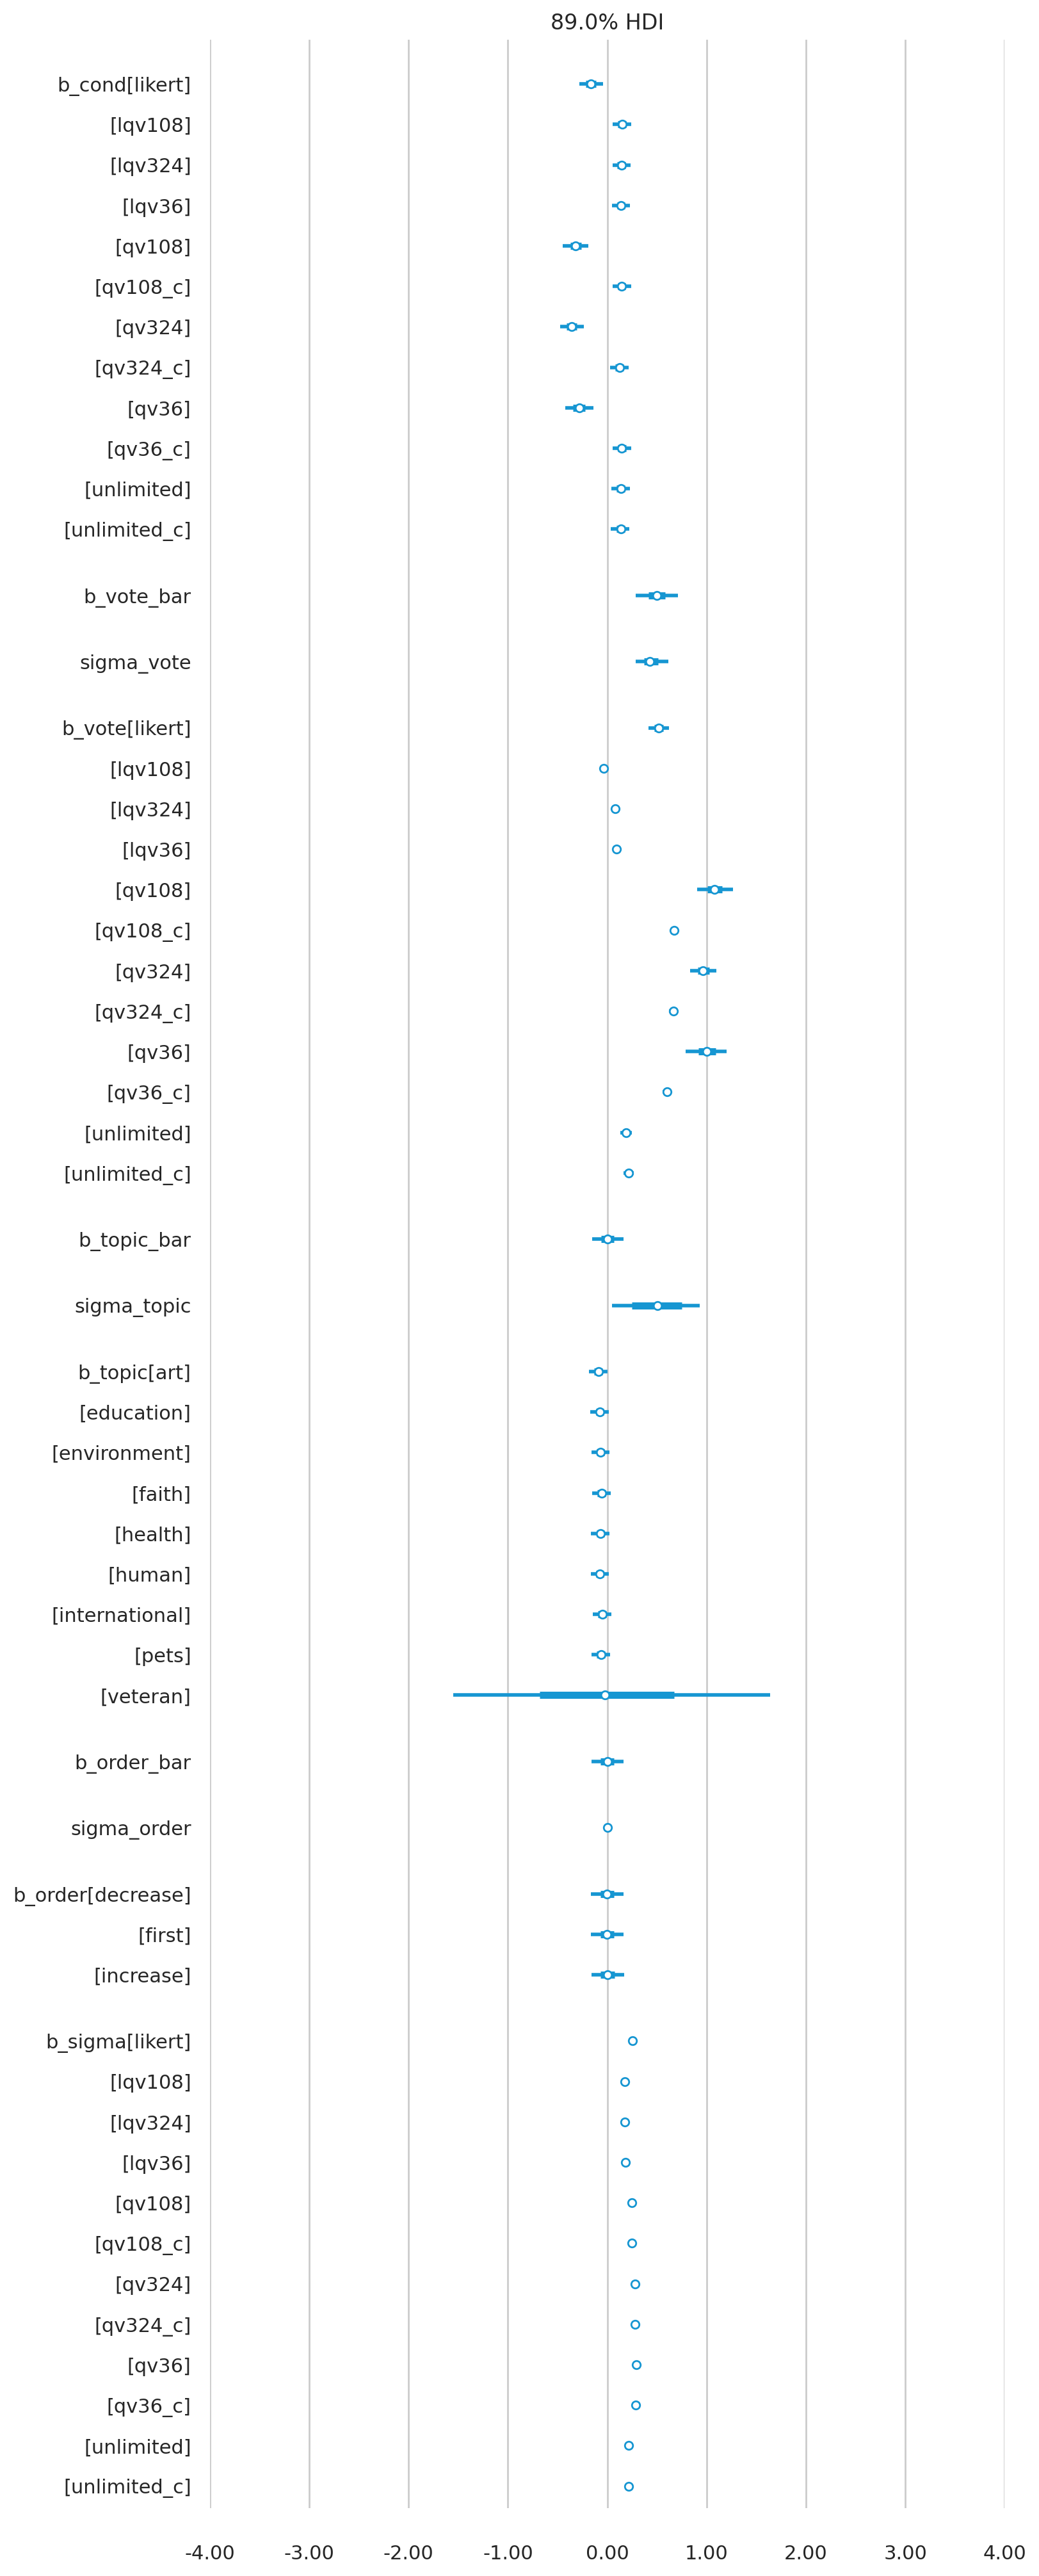

In [77]:
axs = az.plot_forest(data=model_data,
                     var_names=[
                                # 'b_cond_bar', 'sigma_cond',
                                'b_cond',
                                'b_vote_bar', 'sigma_vote', 'b_vote',
                                'b_topic_bar', 'sigma_topic', 'b_topic',
                                'b_order_bar', 'sigma_order', 'b_order',
                                'b_sigma'
                                ],
                     combined=True,
                     colors=base_color,
                     ridgeplot_alpha=0.3,
                     linewidth=2,
                     figsize=(8, 20))

z = axs[0]
# axs.set_title(Title, size=12)
# z.set_xlabel(r'$\mu$', fontsize=18)  # no individual labels
# z.set_ylabel("Density", fontsize=10)
z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
z.spines['right'].set_visible(False)
z.spines['top'].set_visible(False)
z.spines['left'].set_visible(False)
z.spines['bottom'].set_visible(False)
z.spines['bottom'].set_position(('outward', 10))
z.xaxis.set_minor_locator(AutoMinorLocator(5))
z.set_xlim(left=-4, right=4)
z.tick_params(which='both', width=2)
z.tick_params(which='major', length=7)
z.tick_params(which='minor', length=4, color=neutral_gray)

# plt.subplots_adjust(hspace=0.75, wspace=0.1)
# plt.savefig('plots/rater_rating_variation.pdf', transparent=False)
plt.show()

In [78]:
order_data = model_data.posterior['b_order_bar'].mean(("chain"))
topic_data = model_data.posterior['b_topic_bar'].mean(("chain"))
sum_except_cond = topic_data * 2 + order_data

condition_data = model_data.posterior['b_cond'].mean(("chain"))
vote_data = model_data.posterior['b_vote'].mean(("chain"))
sigmas = model_data.posterior['b_sigma'].mean(("chain"))

conditions = ['likert', 'unlimited', 'unlimited_c', 'qv36', 'qv108', 'qv324', 'qv36_c', 'qv108_c', 'qv324_c', 'lqv36', 'lqv108', 'lqv324']

pred_mus = []
pred_sigmas = []
pred_b_votes = []

for cond in conditions:
  b_cond = condition_data.sel(conditions=cond).values
  b_vote = vote_data.sel(conditions=cond).values
  b_sigma = sigmas.sel(conditions=cond).values
  mu = b_cond + b_vote * 0.5 + sum_except_cond
  pred_mus.append(mu)
  pred_sigmas.append(b_sigma)
  pred_b_votes.append(b_vote)

contrasts_abs = []
contrasts_rel = []
contrasts_ratio = []
likert_mu = pred_mus[0]
unlimited_mu = pred_mus[1]
unlimited_c_mu = pred_mus[2]
likert_sigma = pred_sigmas[0]
unlimited_sigma = pred_sigmas[1]
unlimited_c_sigma = pred_sigmas[2]
likert_b_vote = pred_b_votes[0]
unlimited_b_vote = pred_b_votes[1]
unlimited_c_b_vote = pred_b_votes[2]

plot_indices = [3, 4, 5, 6, 7, 8, 9, 10, 11]
selected_conditions = [conditions[i] for i in plot_indices]
# if 'likert' in selected_conditions:
#   selected_conditions.remove('likert')
# if 'unlimited' in selected_conditions:
#   selected_conditions.remove('unlimited')

selected_pred_mus = [pred_mus[i] for i in plot_indices]
selected_pred_sigmas = [pred_sigmas[i] for i in plot_indices]
selected_pred_b_votes = [pred_b_votes[i] for i in plot_indices]
# pred_sigmas.pop(3)
# pred_sigmas.pop(7)

for i in range(len(selected_conditions)):
  abs_effect = selected_pred_mus[i] - likert_mu
  pooled_sigma = np.sqrt(((selected_pred_sigmas[i] ** 2 + likert_sigma ** 2) / 2))
  rel_effect = abs_effect/pooled_sigma
  contrasts_abs.append(abs_effect)
  contrasts_rel.append(rel_effect)

  ratio_effect = selected_pred_b_votes[i]/likert_b_vote
  contrasts_ratio.append(ratio_effect)



In [79]:
def calculate_predictive_posterior(cond_normalized_vote_diff_list, model_data):
  order_data = model_data.posterior['b_order_bar'].mean(("chain"))
  topic_data = model_data.posterior['b_topic_bar'].mean(("chain"))
  sum_except_cond = topic_data * 2 + order_data

  condition_data = model_data.posterior['b_cond'].mean(("chain"))
  vote_data = model_data.posterior['b_vote'].mean(("chain"))
  sigmas = model_data.posterior['b_sigma'].mean(("chain"))

  # conditions = ['likert', 'unlimited', 'unlimited_c', 'qv36', 'qv108', 'qv324', 'qv36_c', 'qv108_c', 'qv324_c', 'lqv36', 'lqv108', 'lqv324']

  pred_mus = []
  pred_sigmas = []
  pred_b_votes = []

  for cond, normalized_vote_diff in conditions:
    b_cond = condition_data.sel(conditions=cond).values
    b_vote = vote_data.sel(conditions=cond).values
    b_sigma = sigmas.sel(conditions=cond).values
    mu = b_cond + b_vote * normalized_vote_diff + sum_except_cond
    pred_mus.append(mu)
    pred_sigmas.append(b_sigma)
    pred_b_votes.append(b_vote)

  return pred_b_votes, pred_mus, pred_sigmas

In [80]:
# def calculate_effect_sizes(pred_mus, pred_sigmas, ref_cond_ind):

#   contrasts_abs = []
#   contrasts_rel = []
#   # contrasts_ratio = []
#   ref_mu = pred_mus[ref_cond_ind]
#   ref_sigma = pred_sigmas[ref_cond_ind]

#   for i in range(12):
#     if i == ref_cond_ind:
#       continue
#     else:
#       abs_effect = pred_mus[i] - ref_mu
#       pooled_sigma = np.sqrt(((pred_sigmas[i] ** 2 + ref_sigma ** 2) / 2))
#       rel_effect = abs_effect/pooled_sigma
#       contrasts_abs.append(abs_effect)
#       contrasts_rel.append(rel_effect)

#   return contrasts_abs, contrasts_rel

In [81]:
def calculate_grouped_predictions(pred_mus, pred_sigmas, grouped_ind_dict):

  pred_mus_grouped = {}
  pred_sigmas_grouped = {}

  for cond, ind_list in grouped_ind_dict.items():
    pred_mu_sum = pred_mus[ind_list[0]]
    pred_sigmas_sum = pred_sigmas[ind_list[0]] ** 2

    for i in ind_list[1:]:
      pred_mu_sum += pred_mus[i]
      pred_sigmas_sum += pred_sigmas[i] ** 2

    pred_mu_avg = pred_mu_sum / len(ind_list)
    pred_sigma_avg = np.sqrt(pred_sigmas_sum / len(ind_list))

    pred_mus_grouped[cond] = pred_mu_avg
    pred_sigmas_grouped[cond] = pred_sigma_avg

  return pred_mus_grouped, pred_sigmas_grouped

In [82]:
def calculate_effect_sizes(pred_mus, pred_sigmas, ref_mu, ref_sigma):

  contrasts_abs = {}
  contrasts_rel = {}

  for cond, pred_mu in pred_mus.items():
    pred_sigma = pred_sigmas[cond]

    abs_effect = pred_mu - ref_mu
    pooled_sigma = np.sqrt(((pred_sigma ** 2 + ref_sigma ** 2) / 2))
    rel_effect = abs_effect/pooled_sigma

    contrasts_abs[cond] = abs_effect
    contrasts_rel[cond] = rel_effect

  return contrasts_abs, contrasts_rel

In [83]:
# Plot posterior predictive of donation difference
def plot_predicted_donation_diff(predicted_donation, titles, row, col, normalized_vote_diff=-100, SD=-100):
  subplot_positions = []

  for r in range(row):
    for c in range(col):
      if row == 1:
        subplot_pos = (c,)
      else:
        subplot_pos = (r, c)
      subplot_positions.append(subplot_pos)


  fig, axes = plt.subplots(row, col, figsize=(5*col, 5*row), sharex=True, sharey=True)

  for title, subplot_position in zip(titles, subplot_positions):

      z = axes[subplot_position]
      z.grid(False)
      az.plot_posterior(
          predicted_donation[title],
          ax=z,
          textsize=18,
          ref_val=normalized_vote_diff,
          ref_val_color=yellow_color,
          lw=3,
          color=base_color,
          hdi_prob=0.94, kind="hist",
          round_to=3,
  #         alpha=0.3,
  #         rope=[0.95, 1.05],
  #         rope_color=green_color
      )

      z.set_title(plot_name_mapping[title], size=22)
      if subplot_position[0] == row - 1:
        z.set_xlabel('Predicted Mean', fontsize=20)
      else:
        z.set_xlabel('')

      if subplot_position[1] == 0:
        z.set_ylabel("Posterior Density", fontsize=20)
      else:
        z.set_ylabel('')
      z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.spines['right'].set_visible(False)
      z.spines['top'].set_visible(False)
      z.spines['left'].set_visible(False)
      z.spines['bottom'].set_visible(False)
      z.spines['bottom'].set_position(('outward', 10))
      z.xaxis.set_minor_locator(AutoMinorLocator(5))
  #     if subplot_position == (1,1):
      z.set_xlim(left=-0.75, right=0.75)
      z.tick_params(which='both', width=3)
      z.tick_params(which='major', length=8)
      z.tick_params(which='minor', length=5, color=neutral_gray)

  axes[0, 3].remove()

  plt.suptitle("Predicted Donation Difference Per Surveying Tool \n(" + str(SD) + " SD preference difference)", size=24, y=1.02)

  # plt.subplots_adjust(hspace=0.75, wspace=0.1)
  plt.tight_layout()

  Title = 'Predicted_Donation_Diff_Vote_Diff=' + str(normalized_vote_diff)
  filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
  plt.savefig(filename, transparent=False, bbox_inches="tight")
  plt.show()

In [84]:
# Plot absolute effect sizes
def plot_absolute_effect_sizes(contrasts_abs, conds_to_plot, ref_cond, row, col, normalized_vote_diff, saved_title):
  subplot_positions = []

  for r in range(row):
    for c in range(col):
      if row == 1:
        subplot_pos = (c,)
      else:
        subplot_pos = (r, c)
      subplot_positions.append(subplot_pos)


  fig, axes = plt.subplots(row, col, figsize=(5*col, 5*row))

  for cond, subplot_position in zip(conds_to_plot, subplot_positions):

      z = axes[subplot_position]
      az.plot_posterior(
          contrasts_abs[cond],
          ax=z,
          textsize=12,
          ref_val=0.0,
          ref_val_color=yellow_color,
          lw=2,
  #         alpha=0.3,
          color=base_color,
          hdi_prob=0.94, kind="hist",
  #         rope=[0.95, 1.05],
          round_to=3,
  #         rope_color=green_color
      )


      z.set_title(cond + ' vs. ' + ref_cond, size=20)
      z.set_xlabel('Predicted Mean', fontsize=16)
      z.set_ylabel("Density", fontsize=16)
      z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.spines['right'].set_visible(False)
      z.spines['top'].set_visible(False)
      z.spines['left'].set_visible(False)
      z.spines['bottom'].set_visible(False)
      z.spines['bottom'].set_position(('outward', 12))
      z.xaxis.set_minor_locator(AutoMinorLocator(5))
  #     if subplot_position == (1,1):
      z.set_xlim(left=-1, right=1)
      z.tick_params(which='both', width=3)
      z.tick_params(which='major', length=8)
      z.tick_params(which='minor', length=5, color=neutral_gray)

  plt.suptitle("Absolute Effect Size Compared to Likert\n(Normalized Vote Difference = " + str(normalized_vote_diff) + ")", size=22, y=1.01)

  # plt.subplots_adjust(hspace=0.75, wspace=0.1)
  plt.tight_layout()

  Title = 'Absolute_Contrast_Intensity_' + saved_title + '_Vote_Diff=' + str(normalized_vote_diff)
  filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
  plt.savefig(filename, transparent=False, bbox_inches="tight")
  plt.show()

In [85]:
# Plot relative effect sizes
def plot_relative_effect_sizes(contrasts_rel, conds_to_plot, ref_cond, row, col, normalized_vote_diff, saved_title):
  subplot_positions = []

  for r in range(row):
    for c in range(col):
      if row == 1:
        subplot_pos = (c,)
      else:
        subplot_pos = (r, c)
      subplot_positions.append(subplot_pos)


  fig, axes = plt.subplots(row, col, figsize=(5*col, 5*row))

  for cond, subplot_position in zip(conds_to_plot, subplot_positions):

      z = axes[subplot_position]
      az.plot_posterior(
          contrasts_rel[cond],
          ax=z,
          textsize=12,
          ref_val=0.0,
          ref_val_color=yellow_color,
          lw=2,
  #         alpha=0.3,
          color=base_color,
          hdi_prob=0.94, kind="hist",
  #         rope=[0.95, 1.05],
          round_to=3,
  #         rope_color=green_color
      )


      z.set_title(cond + ' vs. ' + ref_cond, size=18)
      z.set_xlabel('Predicted Mean', fontsize=14)
      z.set_ylabel("Density", fontsize=14)
      z.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      z.spines['right'].set_visible(False)
      z.spines['top'].set_visible(False)
      z.spines['left'].set_visible(False)
      z.spines['bottom'].set_visible(False)
      z.spines['bottom'].set_position(('outward', 10))
      z.xaxis.set_minor_locator(AutoMinorLocator(5))
  #     if subplot_position == (1,1):
      z.set_xlim(left=-4, right=4)
      z.tick_params(which='both', width=2)
      z.tick_params(which='major', length=7)
      z.tick_params(which='minor', length=4, color=neutral_gray)

  plt.suptitle("Relative Effect Size Compared to Likert\n(Normalized Vote Difference = " + str(normalized_vote_diff) + ")", size=20, y=1.01)

  # plt.subplots_adjust(hspace=0.75, wspace=0.1)
  plt.tight_layout()

  Title = 'Relative_Contrast_Intensity_' + saved_title + '_Vote_Diff=' + str(normalized_vote_diff)
  filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
  plt.savefig(filename, transparent=False, bbox_inches="tight")
  plt.show()

##### Predicted donation

In [86]:
SD = 2

In [87]:
normalized_vote_diff = 0.19 * SD
transformed_ordinal_vote_diff = (normalized_vote_diff + 1)/2

conditions = [
    ('likert', transformed_ordinal_vote_diff),
    ('unlimited', normalized_vote_diff),
    ('unlimited_c', normalized_vote_diff),
    ('qv36', transformed_ordinal_vote_diff),
    ('qv108', transformed_ordinal_vote_diff),
    ('qv324', transformed_ordinal_vote_diff),
    ('qv36_c', normalized_vote_diff),
    ('qv108_c', normalized_vote_diff),
    ('qv324_c', normalized_vote_diff),
    ('lqv36', normalized_vote_diff),
    ('lqv108', normalized_vote_diff),
    ('lqv324', normalized_vote_diff)
    ]

pred_b_votes, pred_mus, pred_sigmas = calculate_predictive_posterior(conditions, model_data)

In [88]:
grouped_ind_dict = {
    'Likert': [0],
    'Unlimited QV Vote': [1],
    'Unlimited QV Credit': [2],
    'Unlimited QV': [1, 2],
    'QV36 Vote': [3],
    'QV108 Vote': [4],
    'QV324 Vote': [5],
    'QV Vote': [3, 4, 5],
    'QV36 Credit': [6],
    'QV108 Credit': [7],
    'QV324 Credit': [8],
    'QV Credit': [6, 7, 8],
    'CS36': [9],
    'CS108': [10],
    'CS324': [11],
    'Constant Sum': [9, 10, 11]
}
pred_mus_grouped, pred_sigmas_grouped = calculate_grouped_predictions(pred_mus, pred_sigmas, grouped_ind_dict)

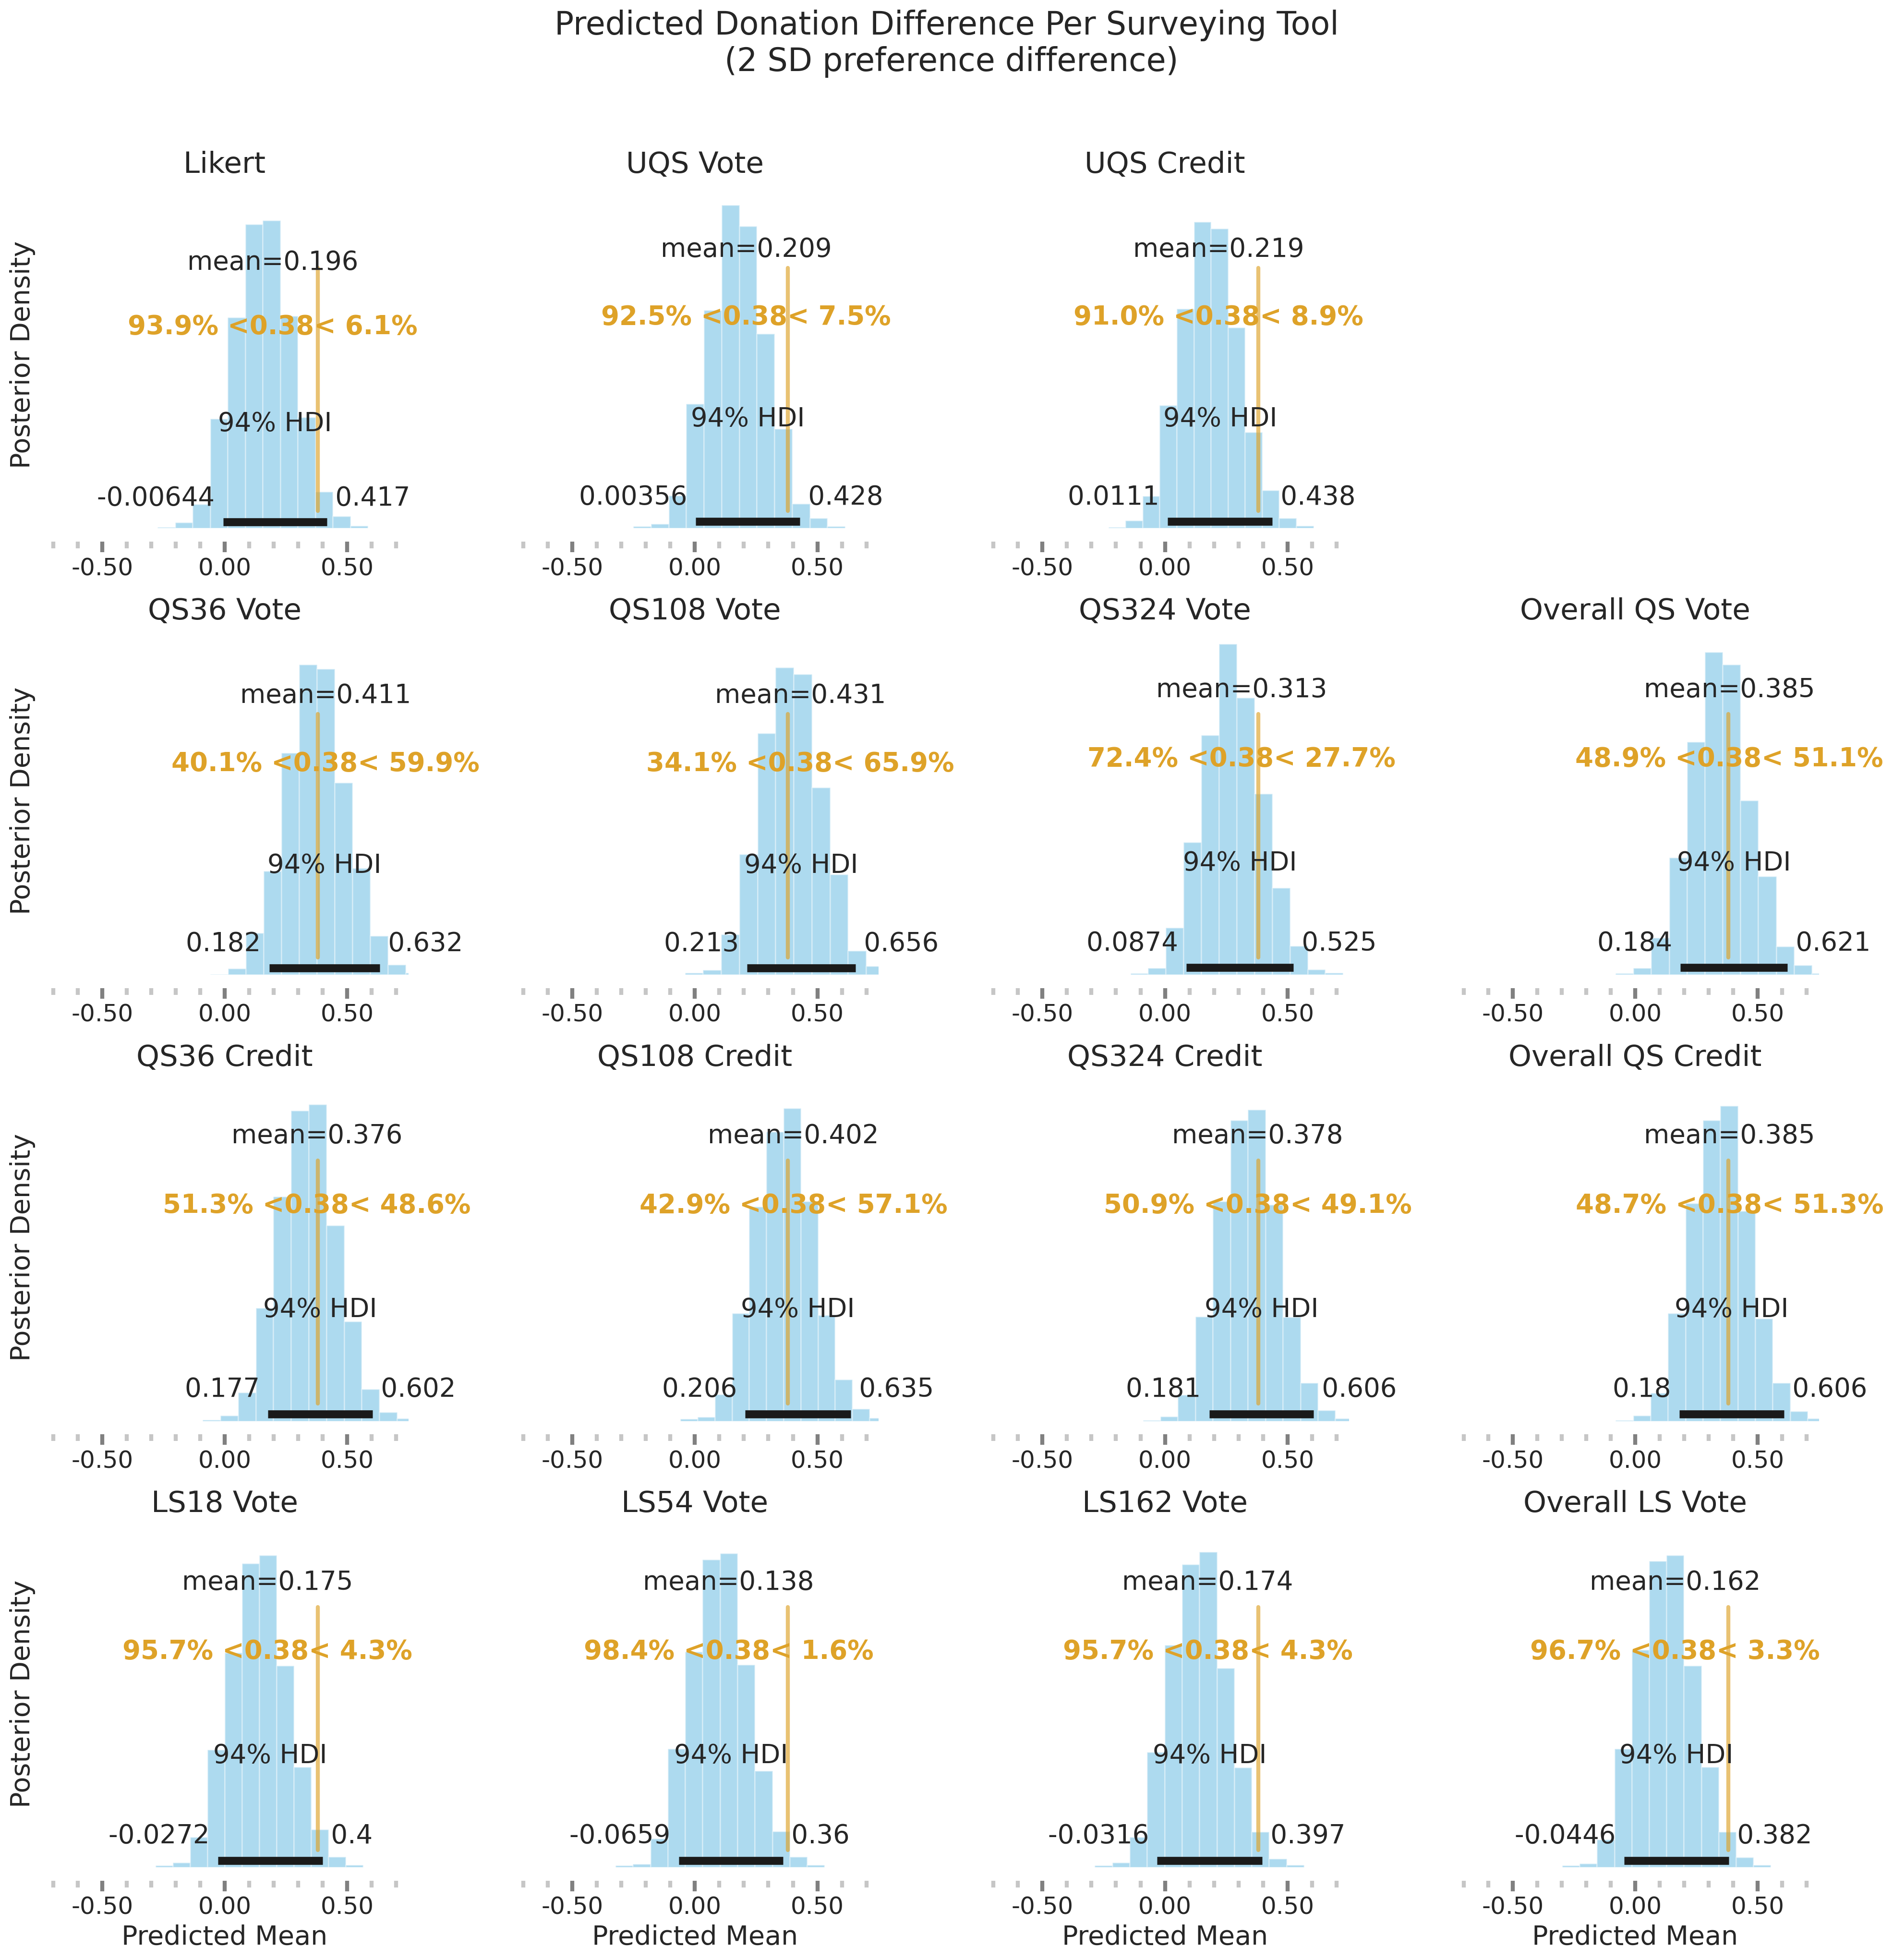

In [89]:
# Plot predicted donation for all conditions
import seaborn as sns
sns.set_theme(style="whitegrid")


titles = [
    'Likert',
    'Unlimited QV Vote',
    'Unlimited QV Credit',
    'Unlimited QV',
    'QV36 Vote',
    'QV108 Vote',
    'QV324 Vote',
    'QV Vote',
    'QV36 Credit',
    'QV108 Credit',
    'QV324 Credit',
    'QV Credit',
    'CS36',
    'CS108',
    'CS324',
    'Constant Sum'
]

plot_predicted_donation_diff(pred_mus_grouped, titles, 4, 4, normalized_vote_diff=normalized_vote_diff, SD=SD)

In [90]:
def plot_donation_diff_overlaid(predicted_donation, titles, row, col, normalized_vote_diff=-100, SD=-100):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 7))

    for title in titles:
        if title not in predicted_donation:
            continue

        label = plot_name_mapping[title]
        
        blue_palatte = sns.color_palette("Blues", 12)
        orange_palette = sns.color_palette("Oranges", 8)
        red_palette = sns.color_palette("Reds", 8)
        purple_palette = sns.color_palette("Purples", 8)


        colors = {
            "Likert": "#000000",
            "QS36 Vote": blue_palatte[2],
            "QS108 Vote": blue_palatte[3],
            "QS324 Vote": blue_palatte[4],
            "QS36 Credit": blue_palatte[7],
            "QS108 Credit": blue_palatte[8],
            "QS324 Credit": blue_palatte[9],
            "LS18 Vote": red_palette[2],
            "LS54 Vote": red_palette[3],
            "LS162 Vote": red_palette[4],
            "UQS Vote": purple_palette[5],
            "UQS Credit": purple_palette[7],
            'Overall QS Vote': blue_palatte[5],
            'Overall QS Credit': blue_palatte[11],
            'Overall LS Vote': red_palette[3]
        }

        color = colors.get(label, "#333333")

        sns.kdeplot(
            predicted_donation[title],
            label=label,
            lw=2.5,
            color=color,
            bw_adjust=1.1,
            alpha=0.75
        )

    # Reference line (e.g., vote-based predicted diff)
    if normalized_vote_diff != -100:
        plt.axvline(x=normalized_vote_diff, color=yellow_color, lw=2.5, linestyle='--', label='Vote Difference')

    plt.title(f"Posterior Distribution of Donation Differences\n({SD} SD preference difference)", fontsize=18)
    plt.xlabel("Predicted Donation Difference", fontsize=14)
    plt.ylabel("Posterior Density", fontsize=14)
    plt.legend(title="Survey Tool", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.xlim(-0.75, 0.75)

    Title = f'Predicted_Donation_Diff_Overlay_Vote_Diff={normalized_vote_diff}'
    filename = os.path.join(OUTPUT_PATH, Title + '.pdf')
    plt.savefig(filename, transparent=False, bbox_inches="tight")
    plt.show()


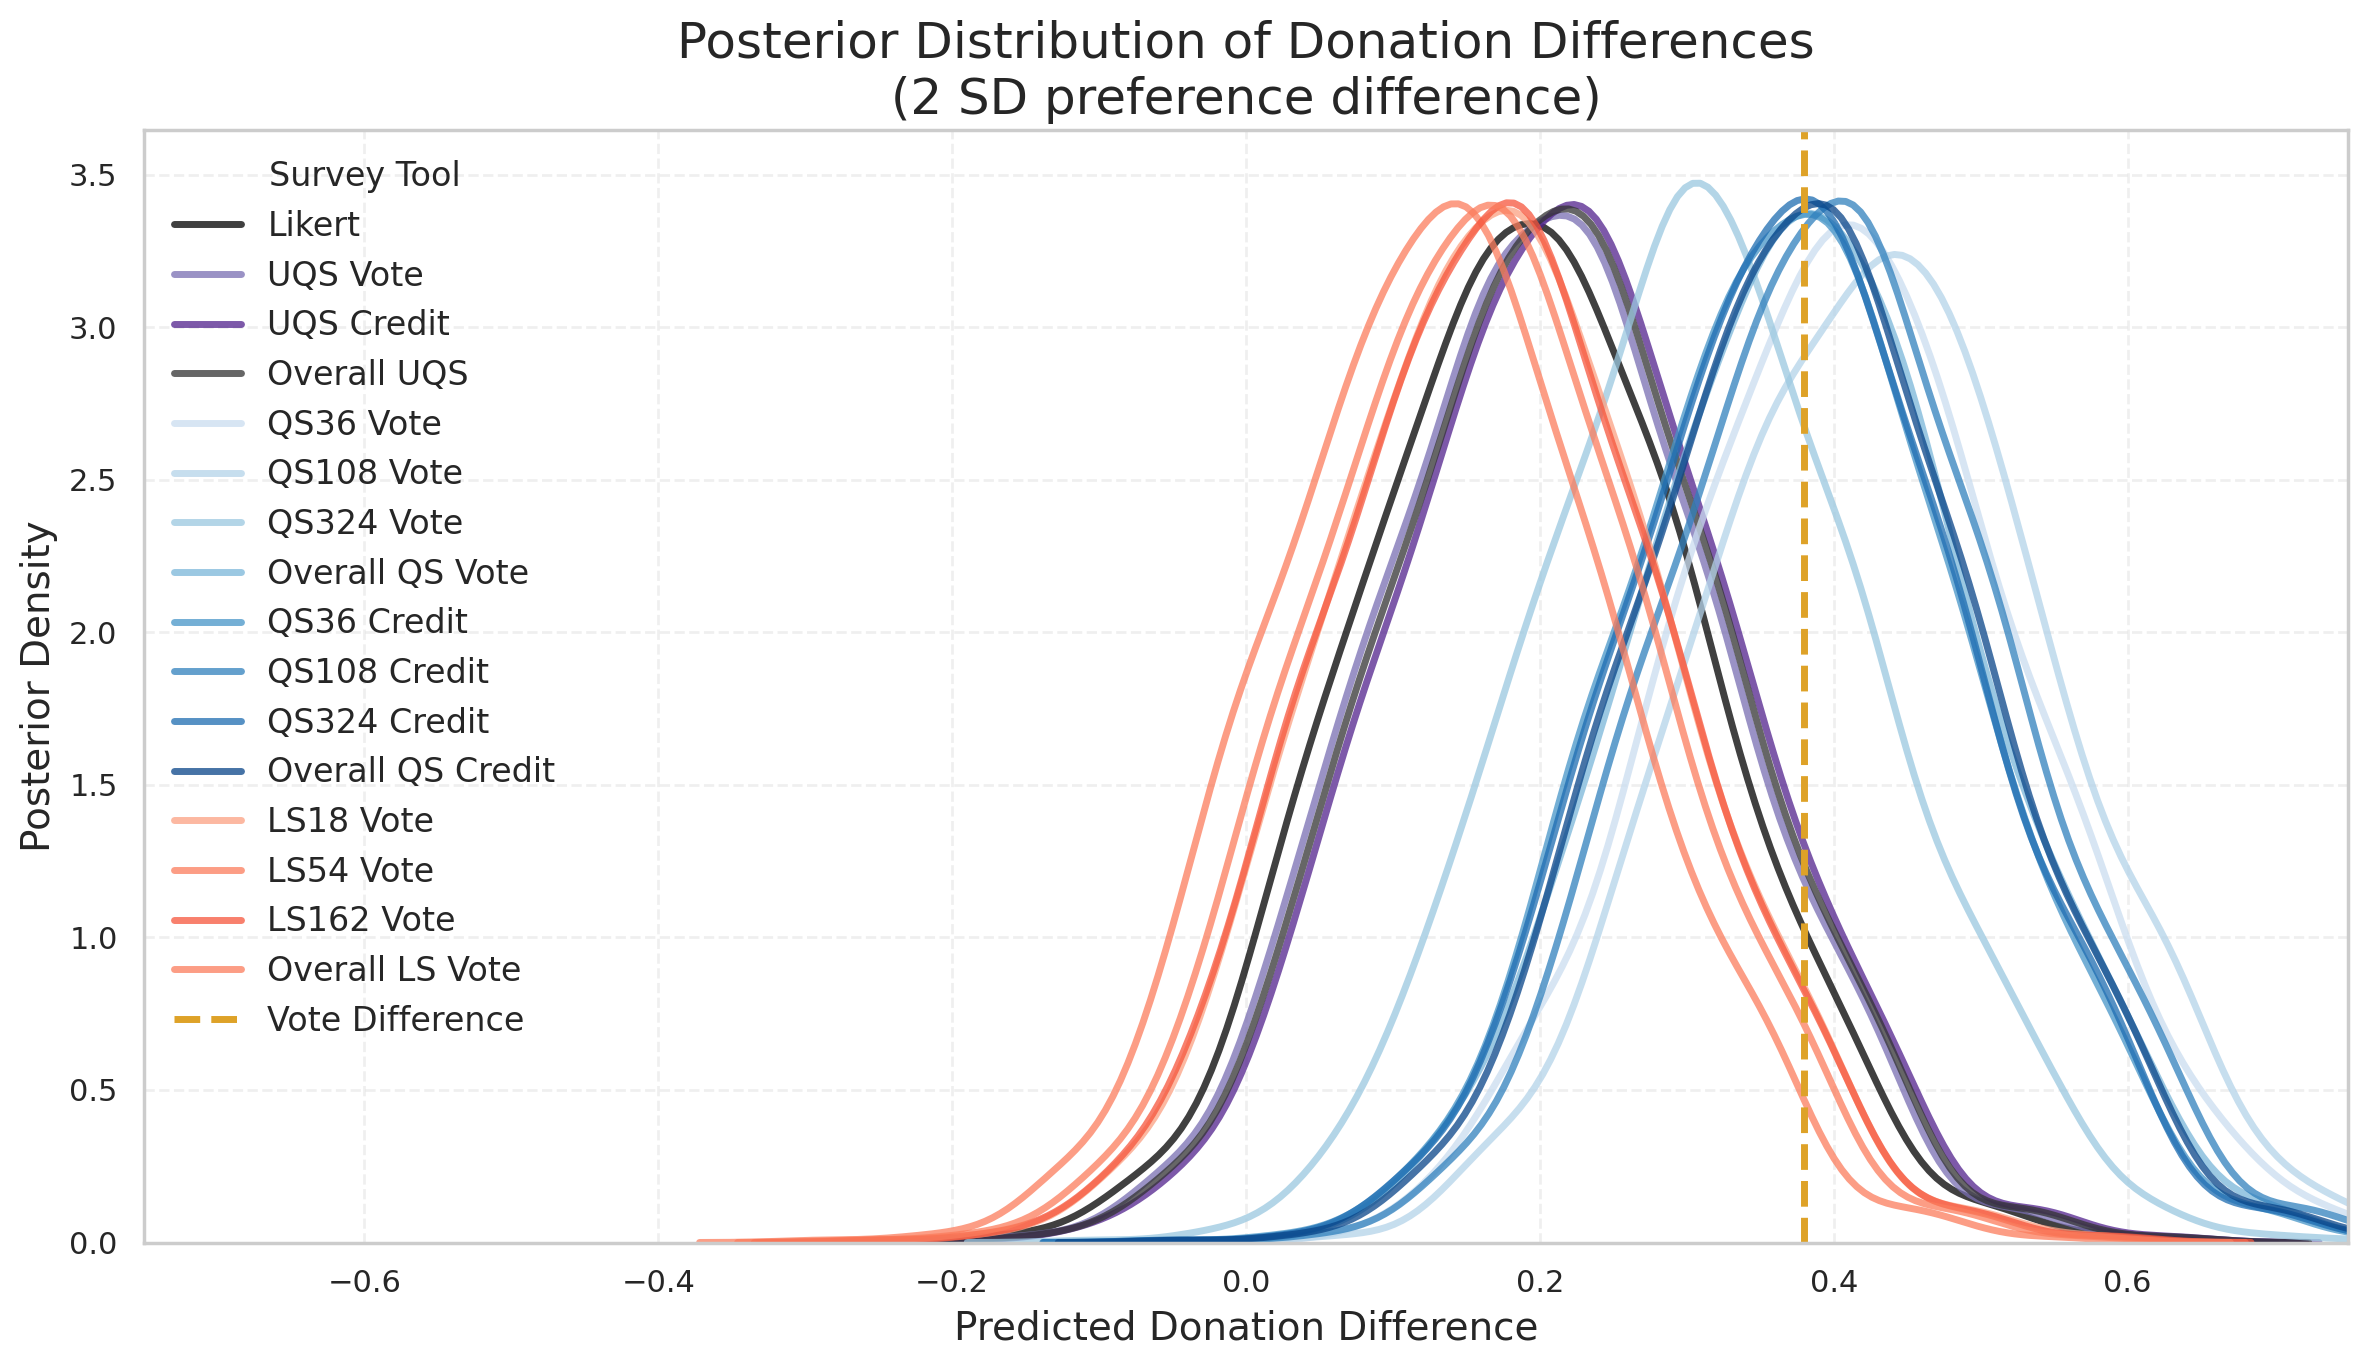

In [91]:
# Plot predicted donation for all conditions
import seaborn as sns
sns.set_theme(style="whitegrid")


titles = [
    'Likert',
    'Unlimited QV Vote',
    'Unlimited QV Credit',
    'Unlimited QV',
    'QV36 Vote',
    'QV108 Vote',
    'QV324 Vote',
    'QV Vote',
    'QV36 Credit',
    'QV108 Credit',
    'QV324 Credit',
    'QV Credit',
    'CS36',
    'CS108',
    'CS324',
    'Constant Sum'
]

plot_donation_diff_overlaid(pred_mus_grouped, titles, 4, 4, normalized_vote_diff=normalized_vote_diff, SD=SD)

##### Compare to Likert

In [92]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['Likert'], pred_sigmas_grouped['Likert'])

In [93]:
# Plot absolute difference between QV, QV_C, LQV with likert
conds_to_plot = [
  'QV36 Vote',
  'QV108 Vote',
  'QV324 Vote',
  'QV Vote',
  'QV36 Credit',
  'QV108 Credit',
  'QV324 Credit',
  'QV Credit',
  'CS36',
  'CS108',
  'CS324',
  'Constant Sum'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

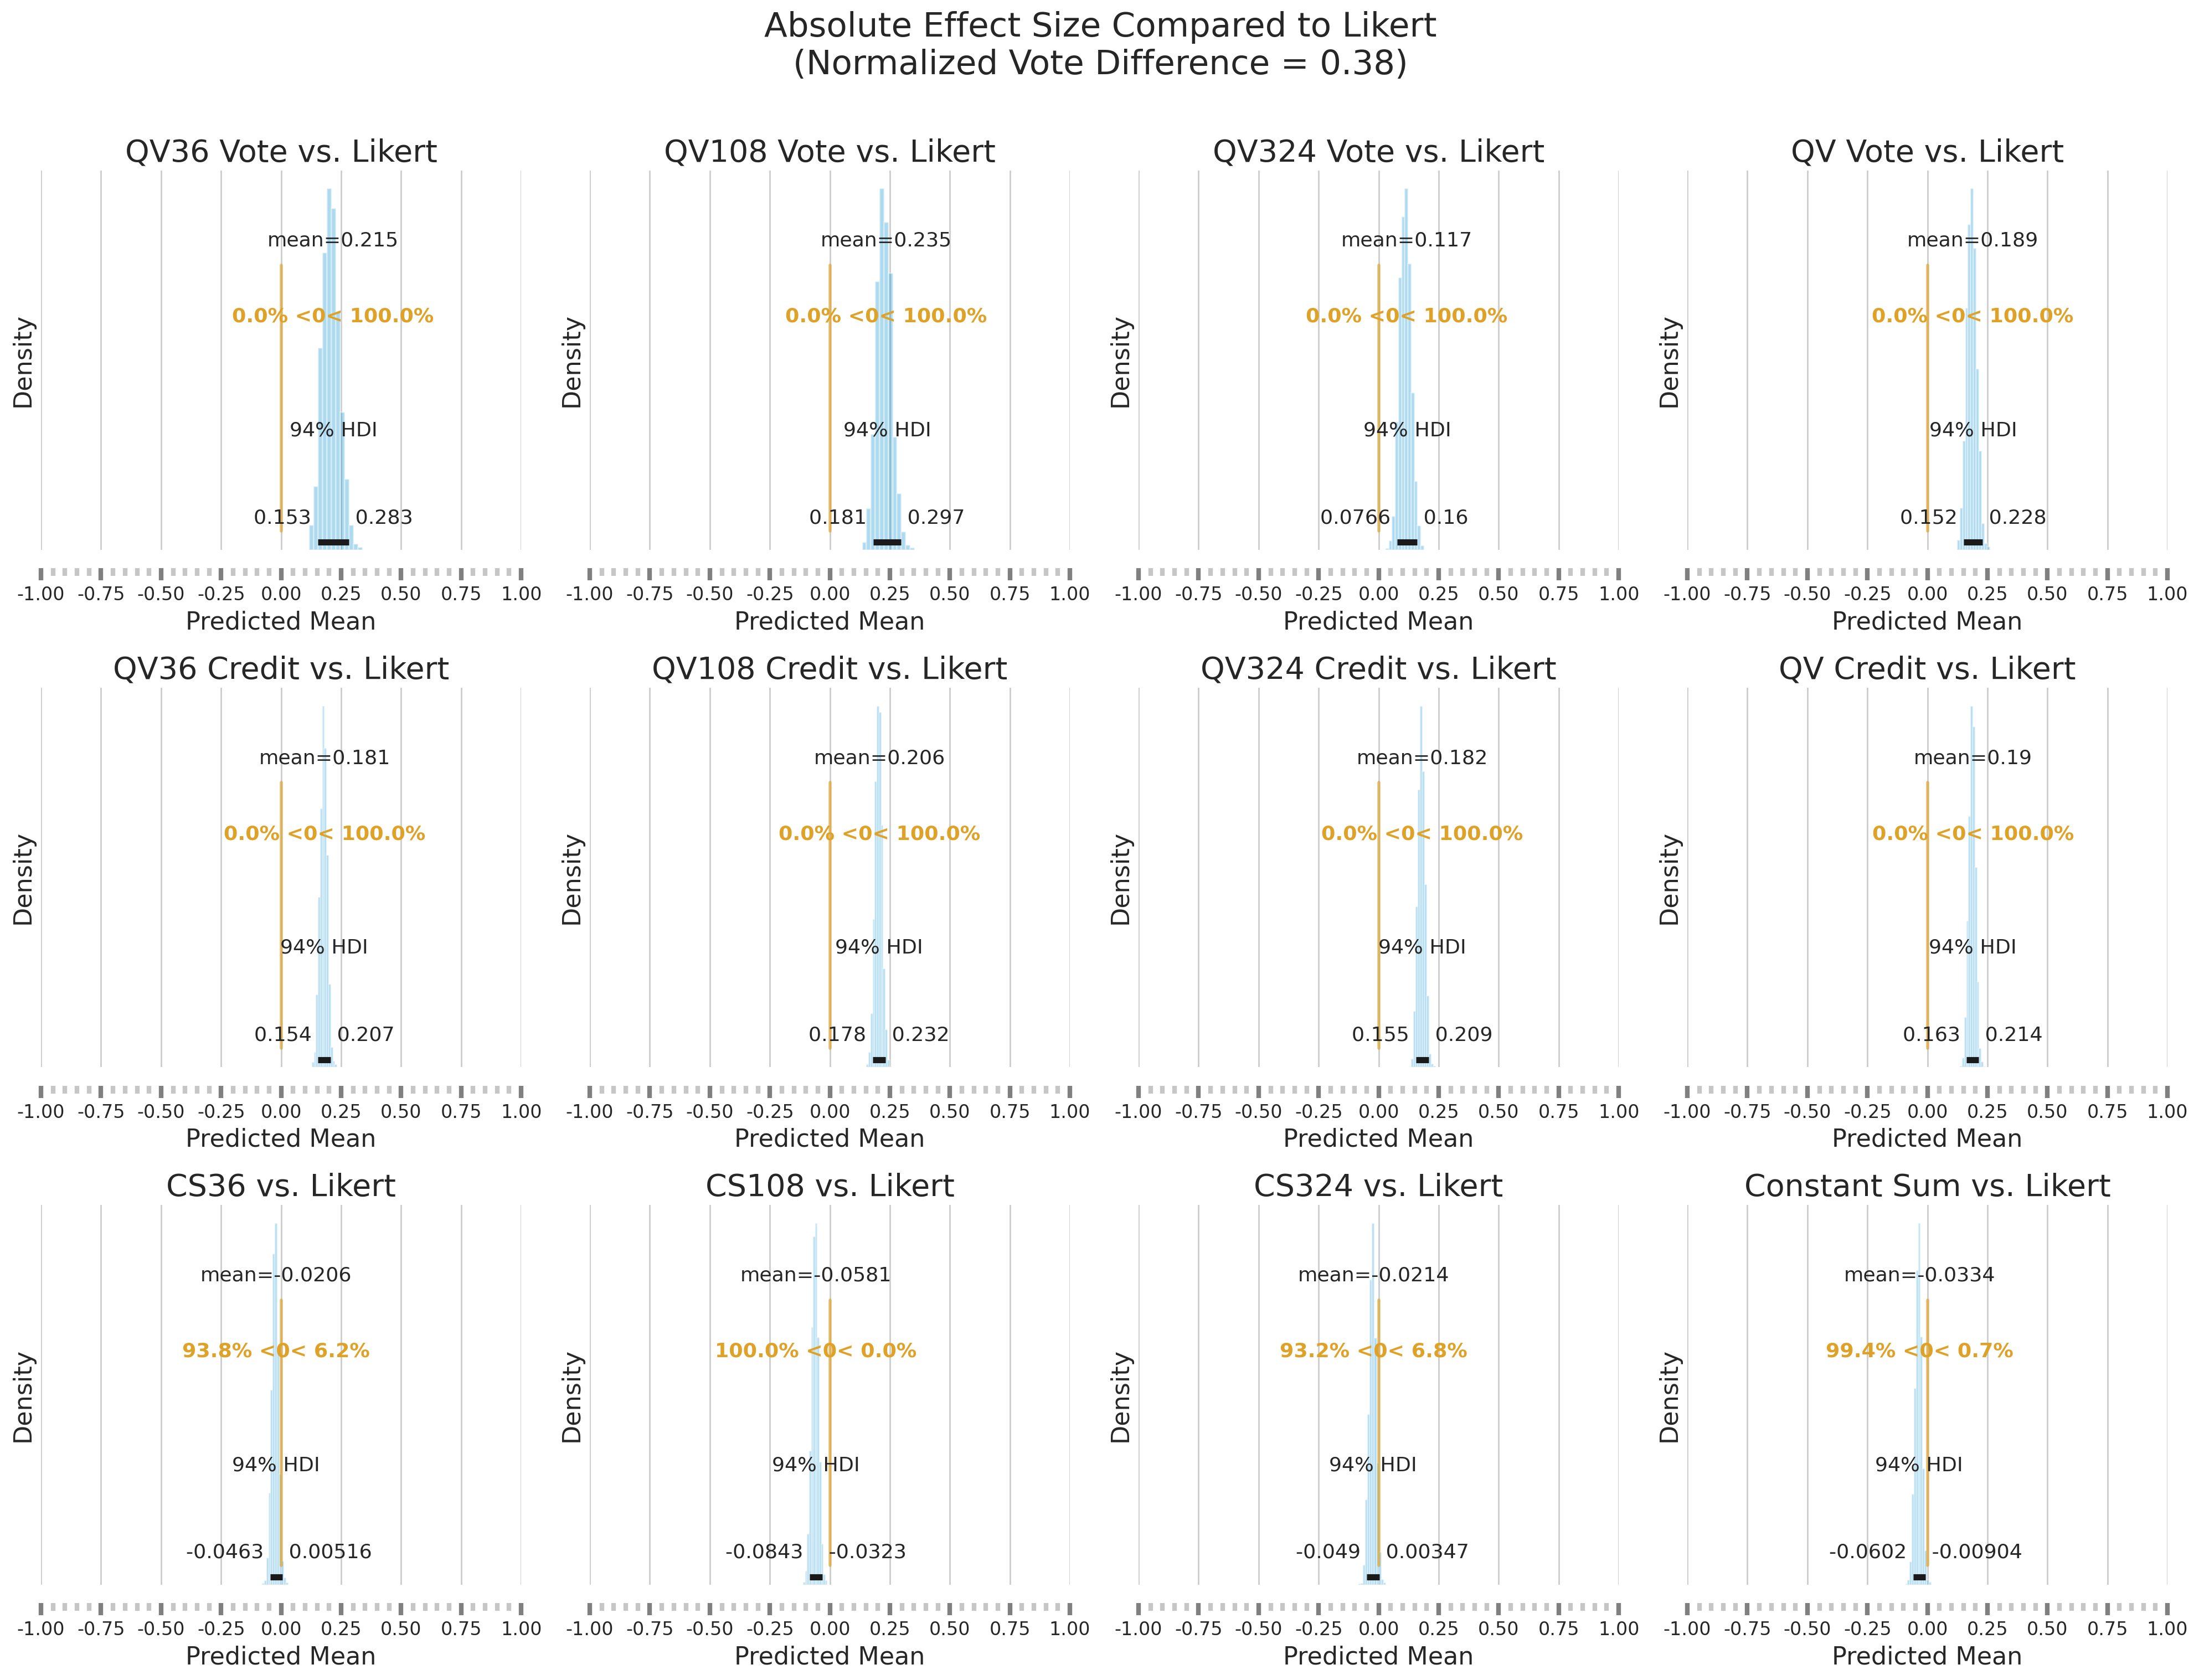

In [94]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'Likert', 3, 4, normalized_vote_diff, 'All9_against_Likert')

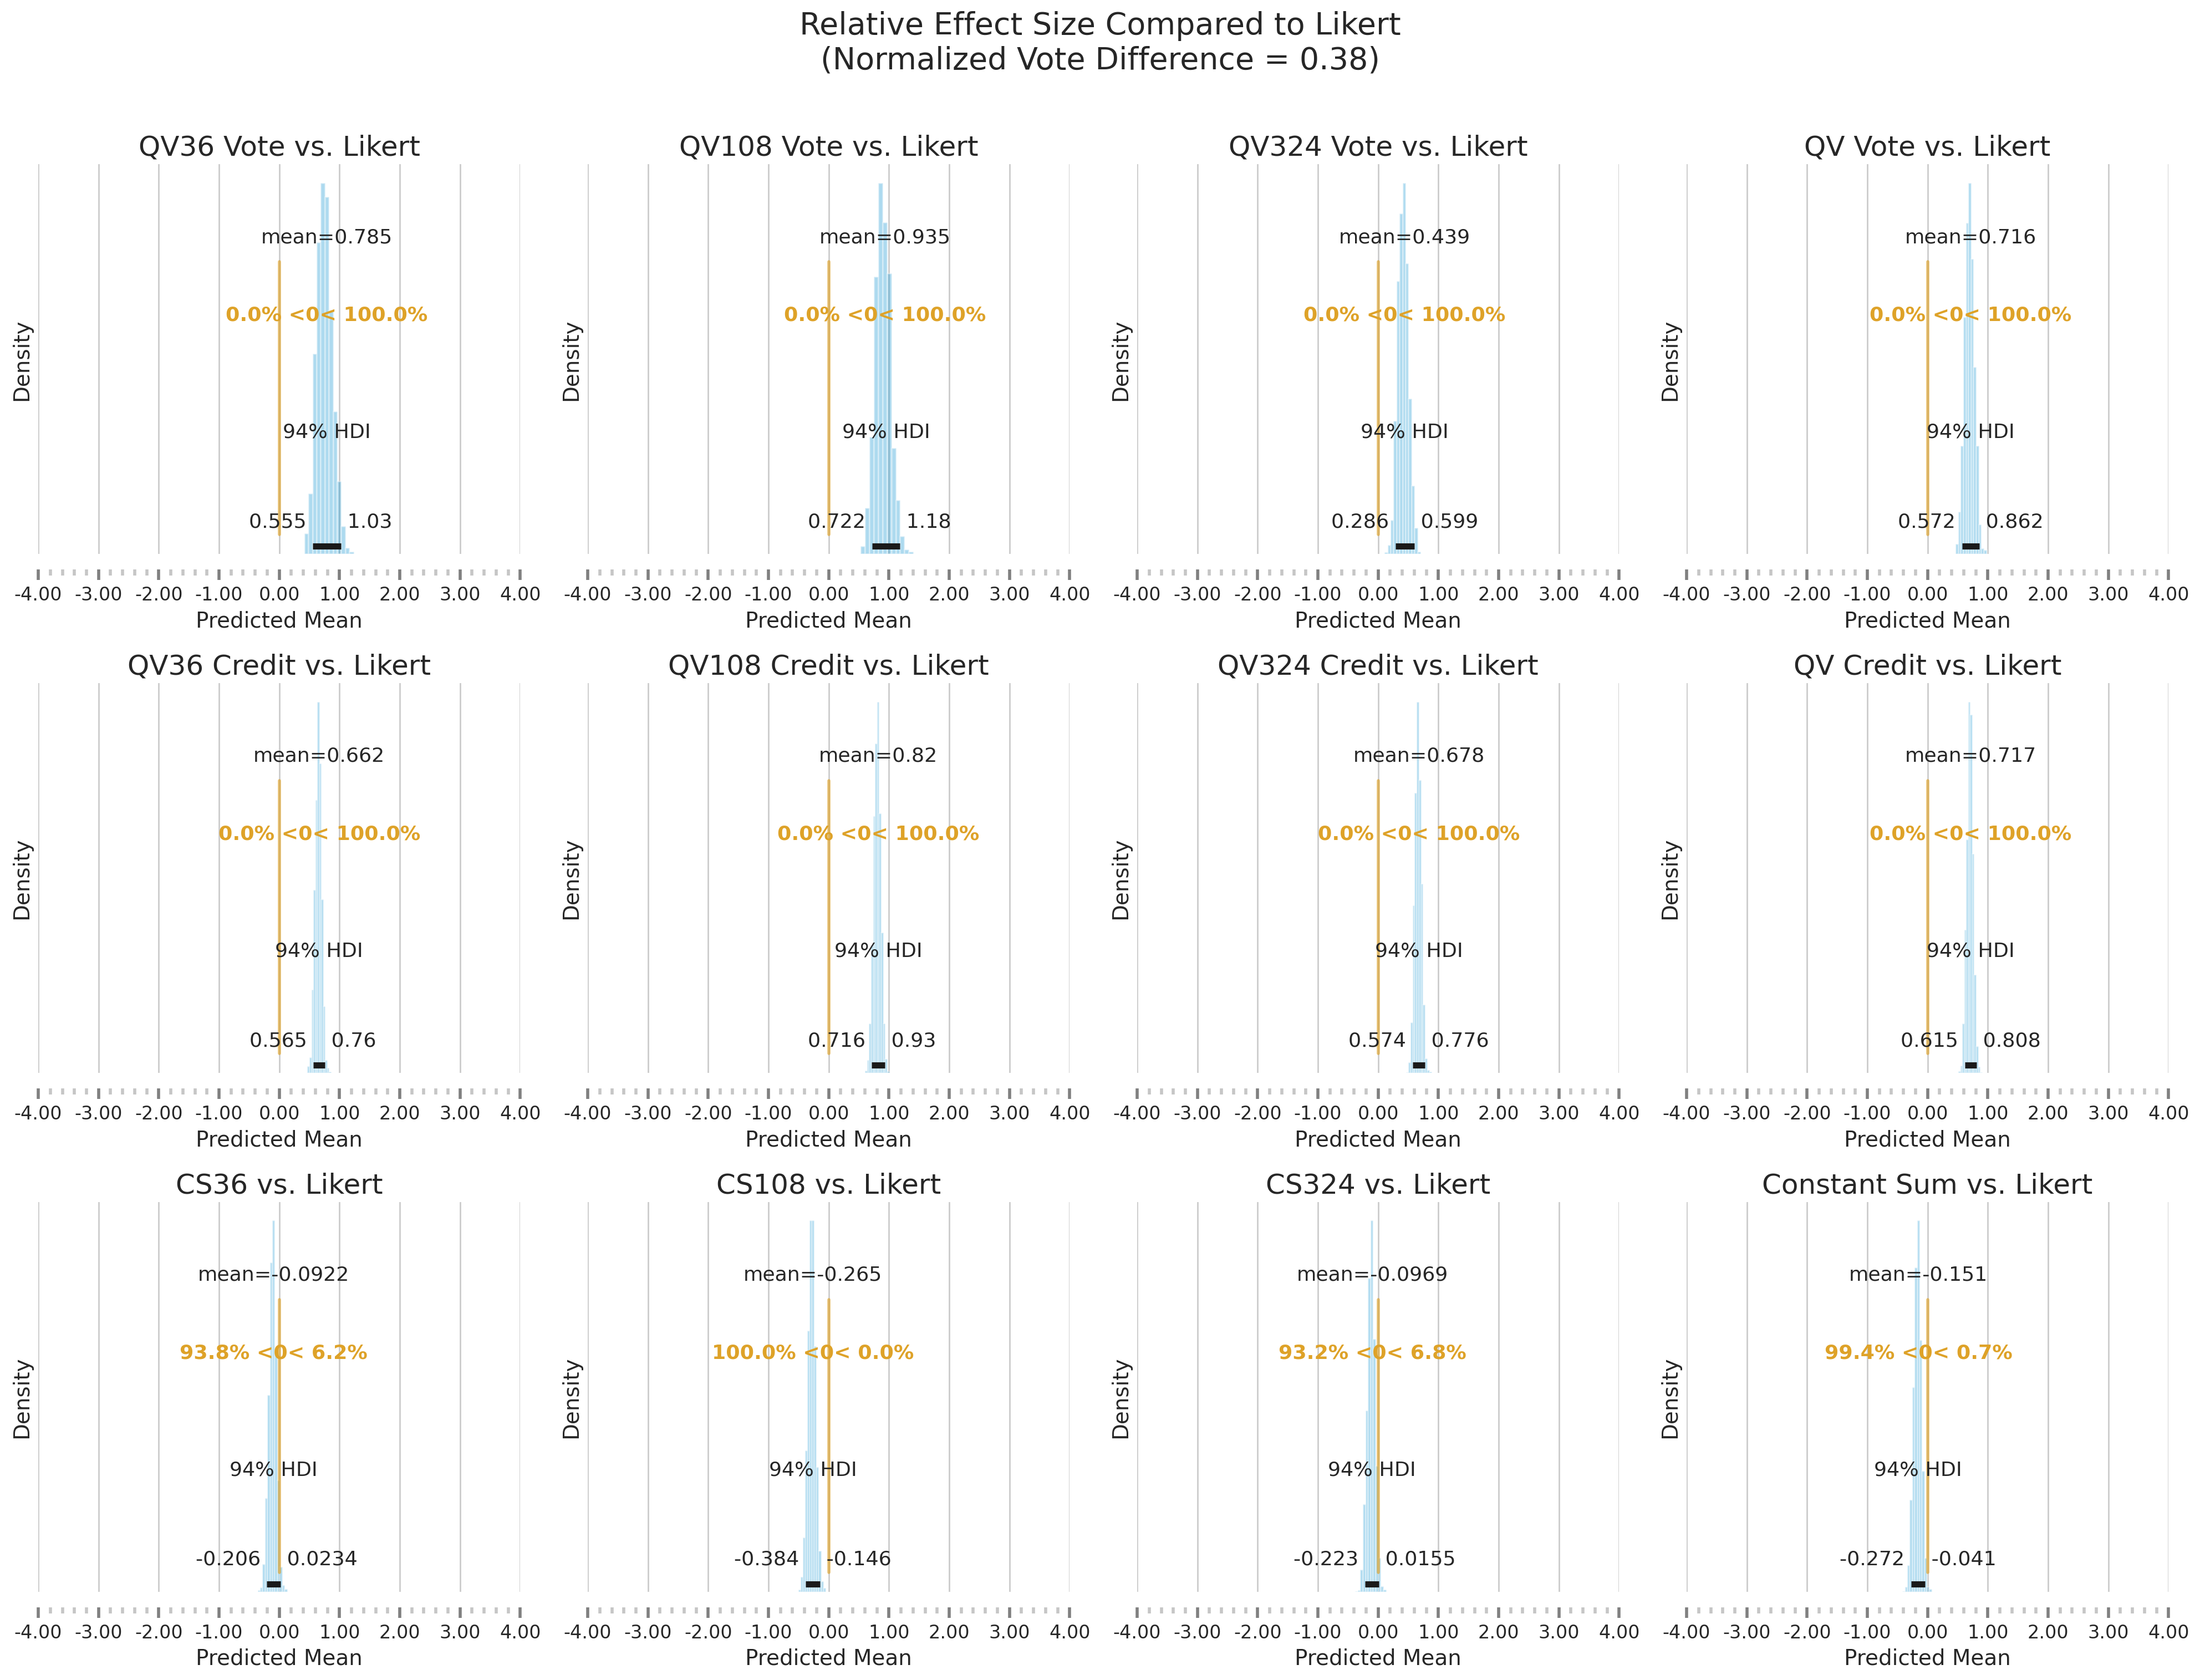

In [95]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'Likert', 3, 4, normalized_vote_diff, 'All9_against_Likert')

In [96]:
# Plot absolute difference between Unlimited QV, Unlimited QV_C with likert
conds_to_plot = [
  'Unlimited QV Vote',
  'Unlimited QV Credit',
  'Unlimited QV'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

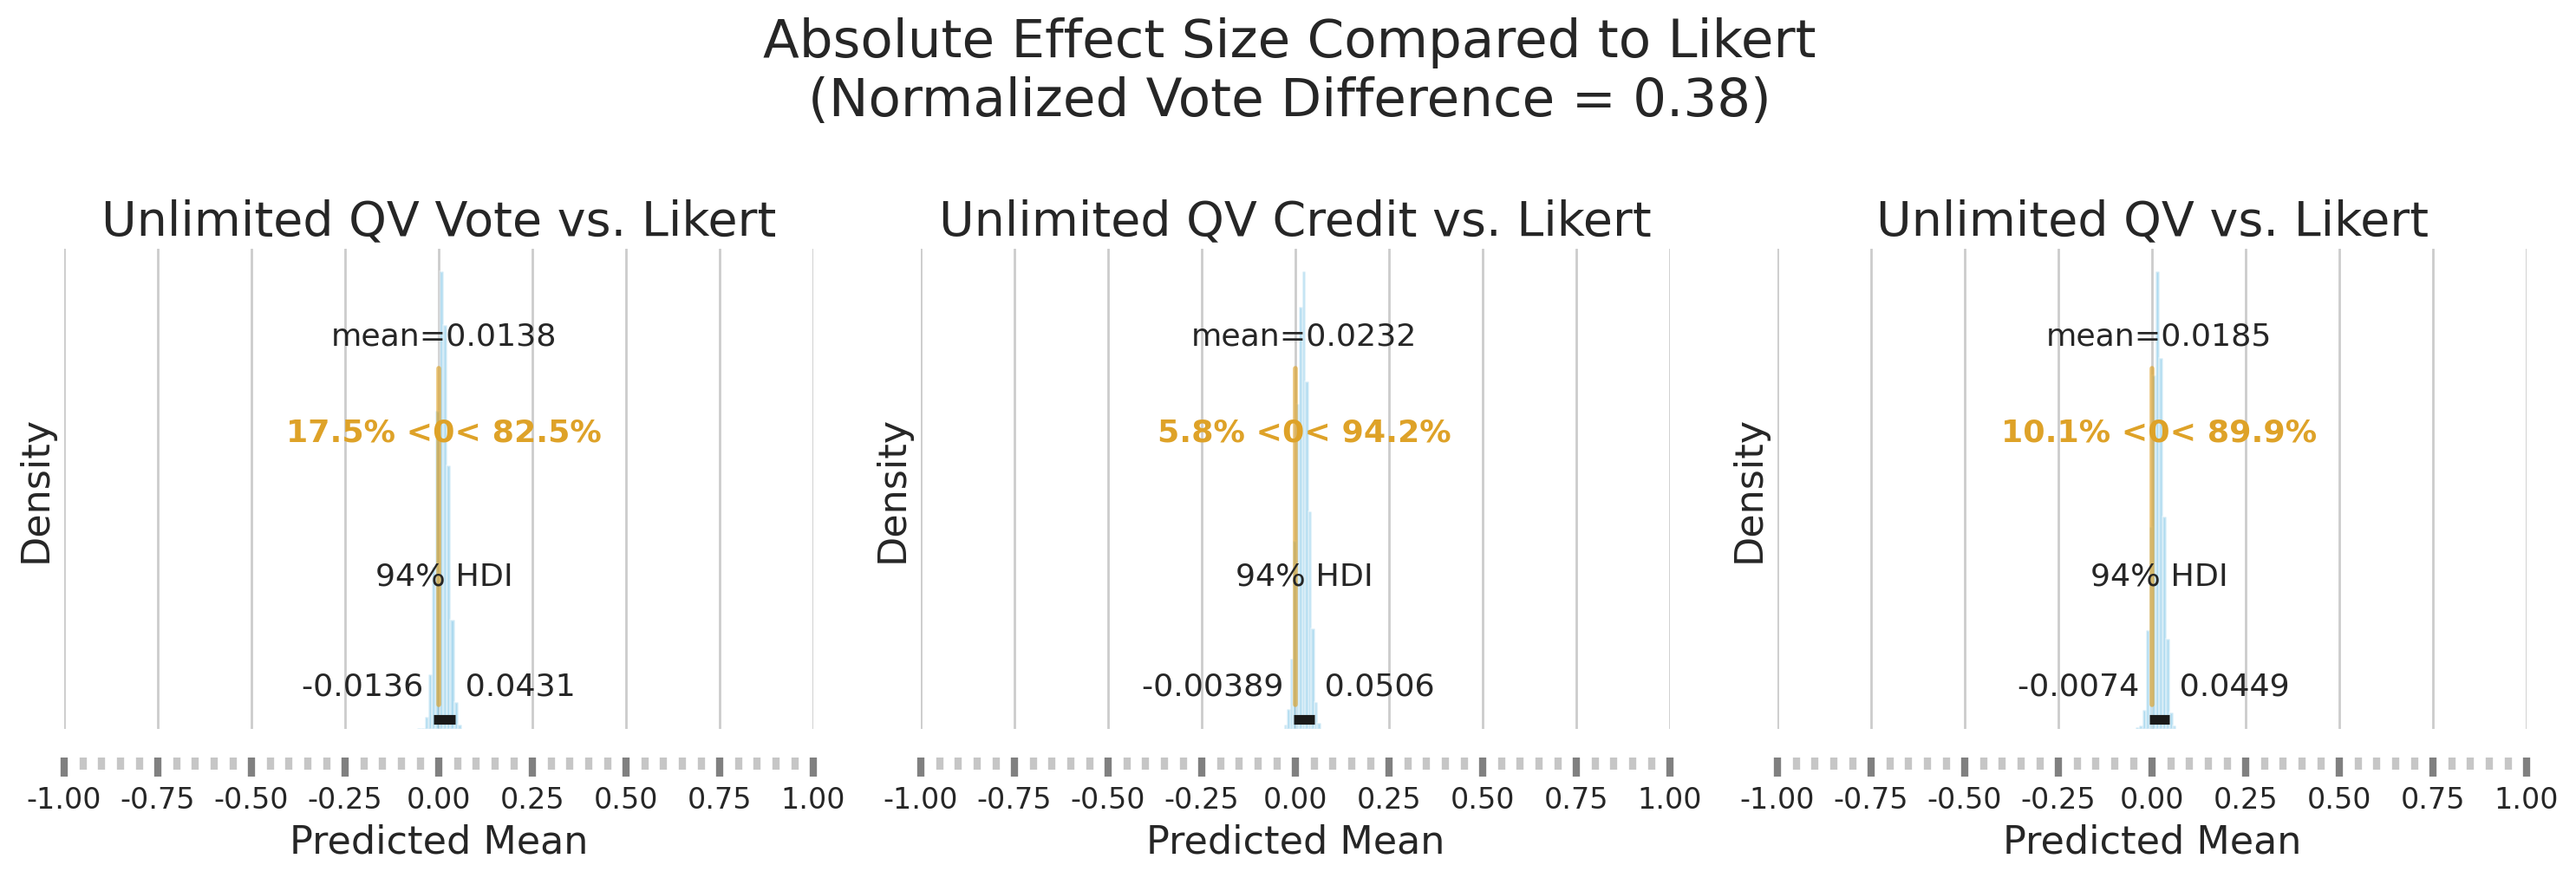

In [97]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'Likert', 1, 3, normalized_vote_diff, 'Unlimited_against_Likert')

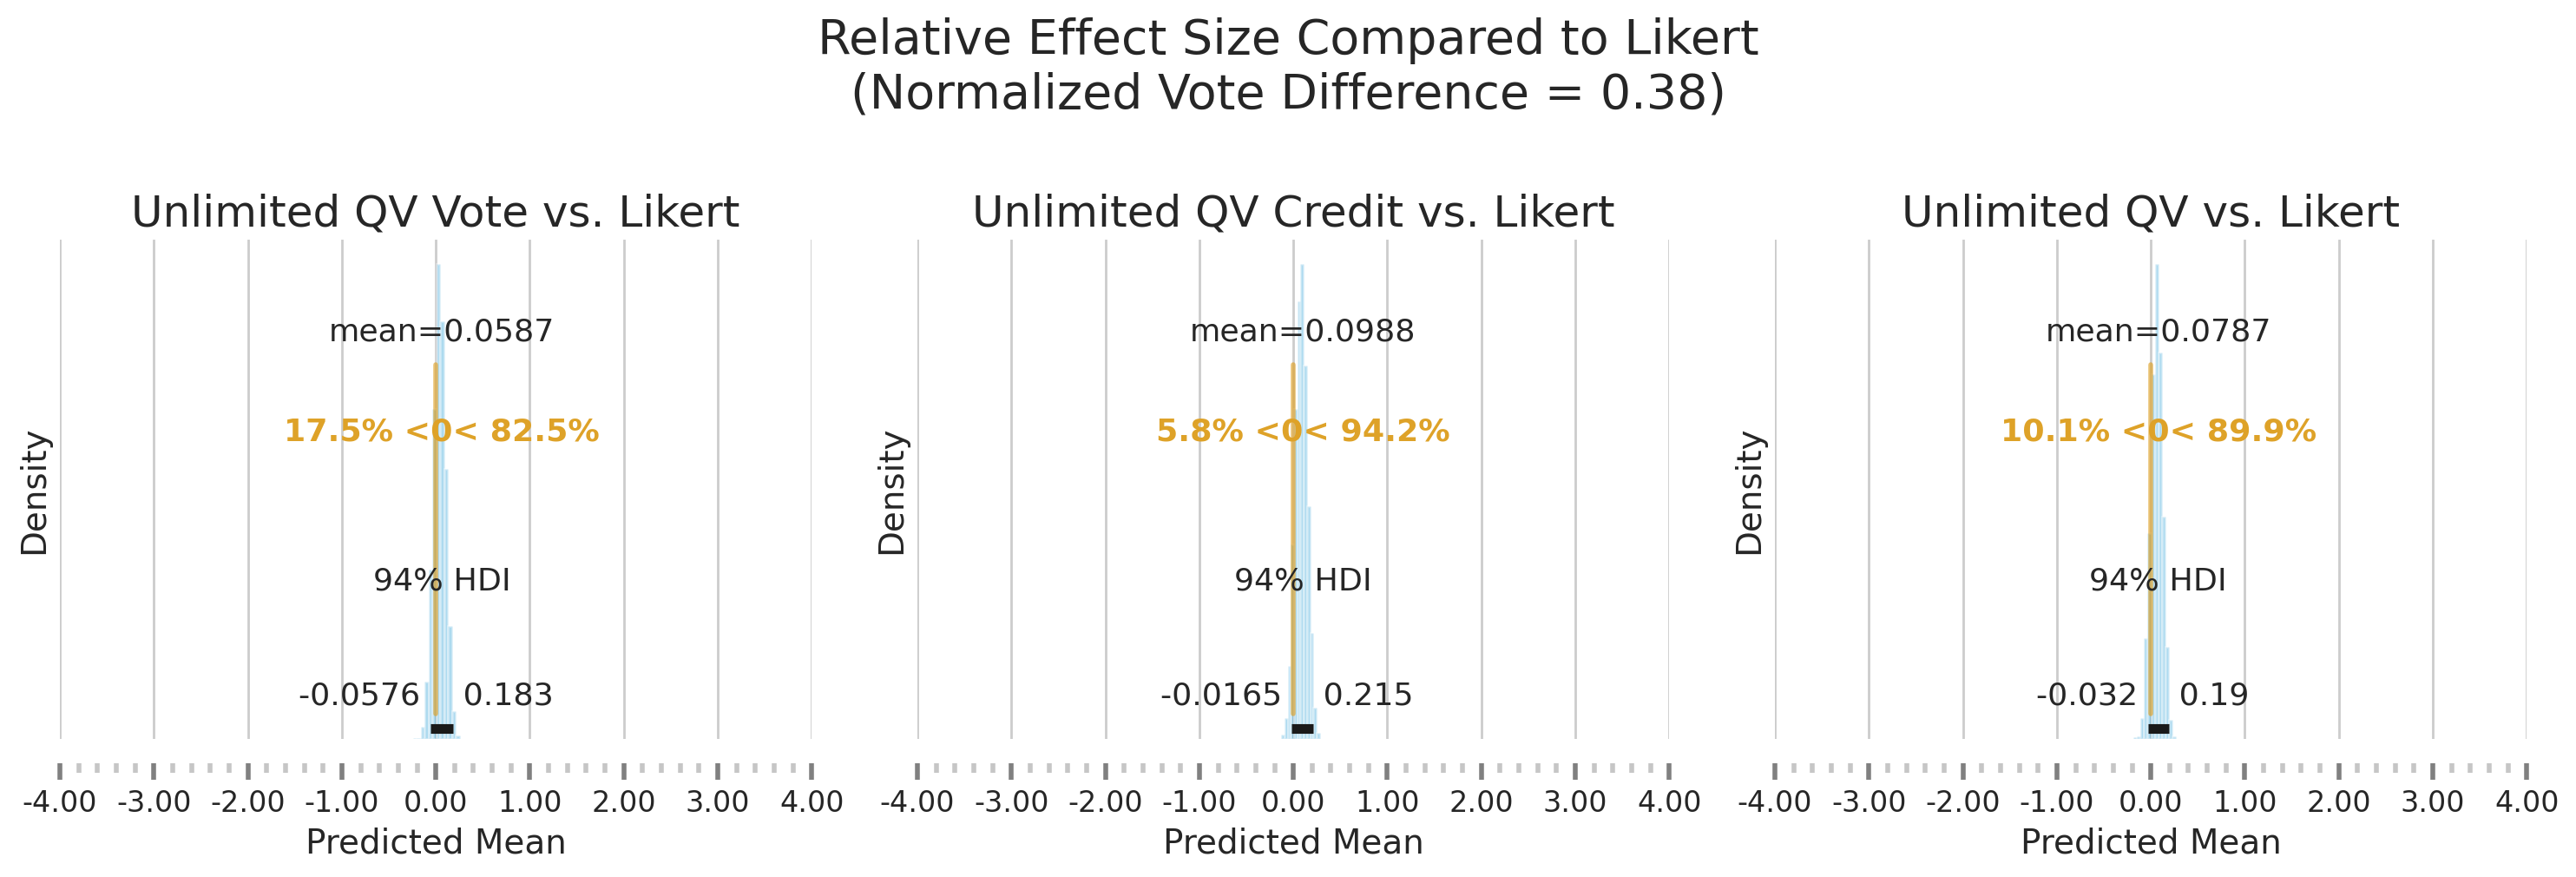

In [98]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'Likert', 1, 3, normalized_vote_diff, 'Unlimited_against_Likert')

##### Compare to QV Vote Average

In [99]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['QV Vote'], pred_sigmas_grouped['QV Vote'])

In [100]:
# Plot absolute difference between QV_C, LQV with QV Vote
conds_to_plot = [
  'QV36 Credit',
  'QV108 Credit',
  'QV324 Credit',
  'QV Credit',
  'CS36',
  'CS108',
  'CS324',
  'Constant Sum'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

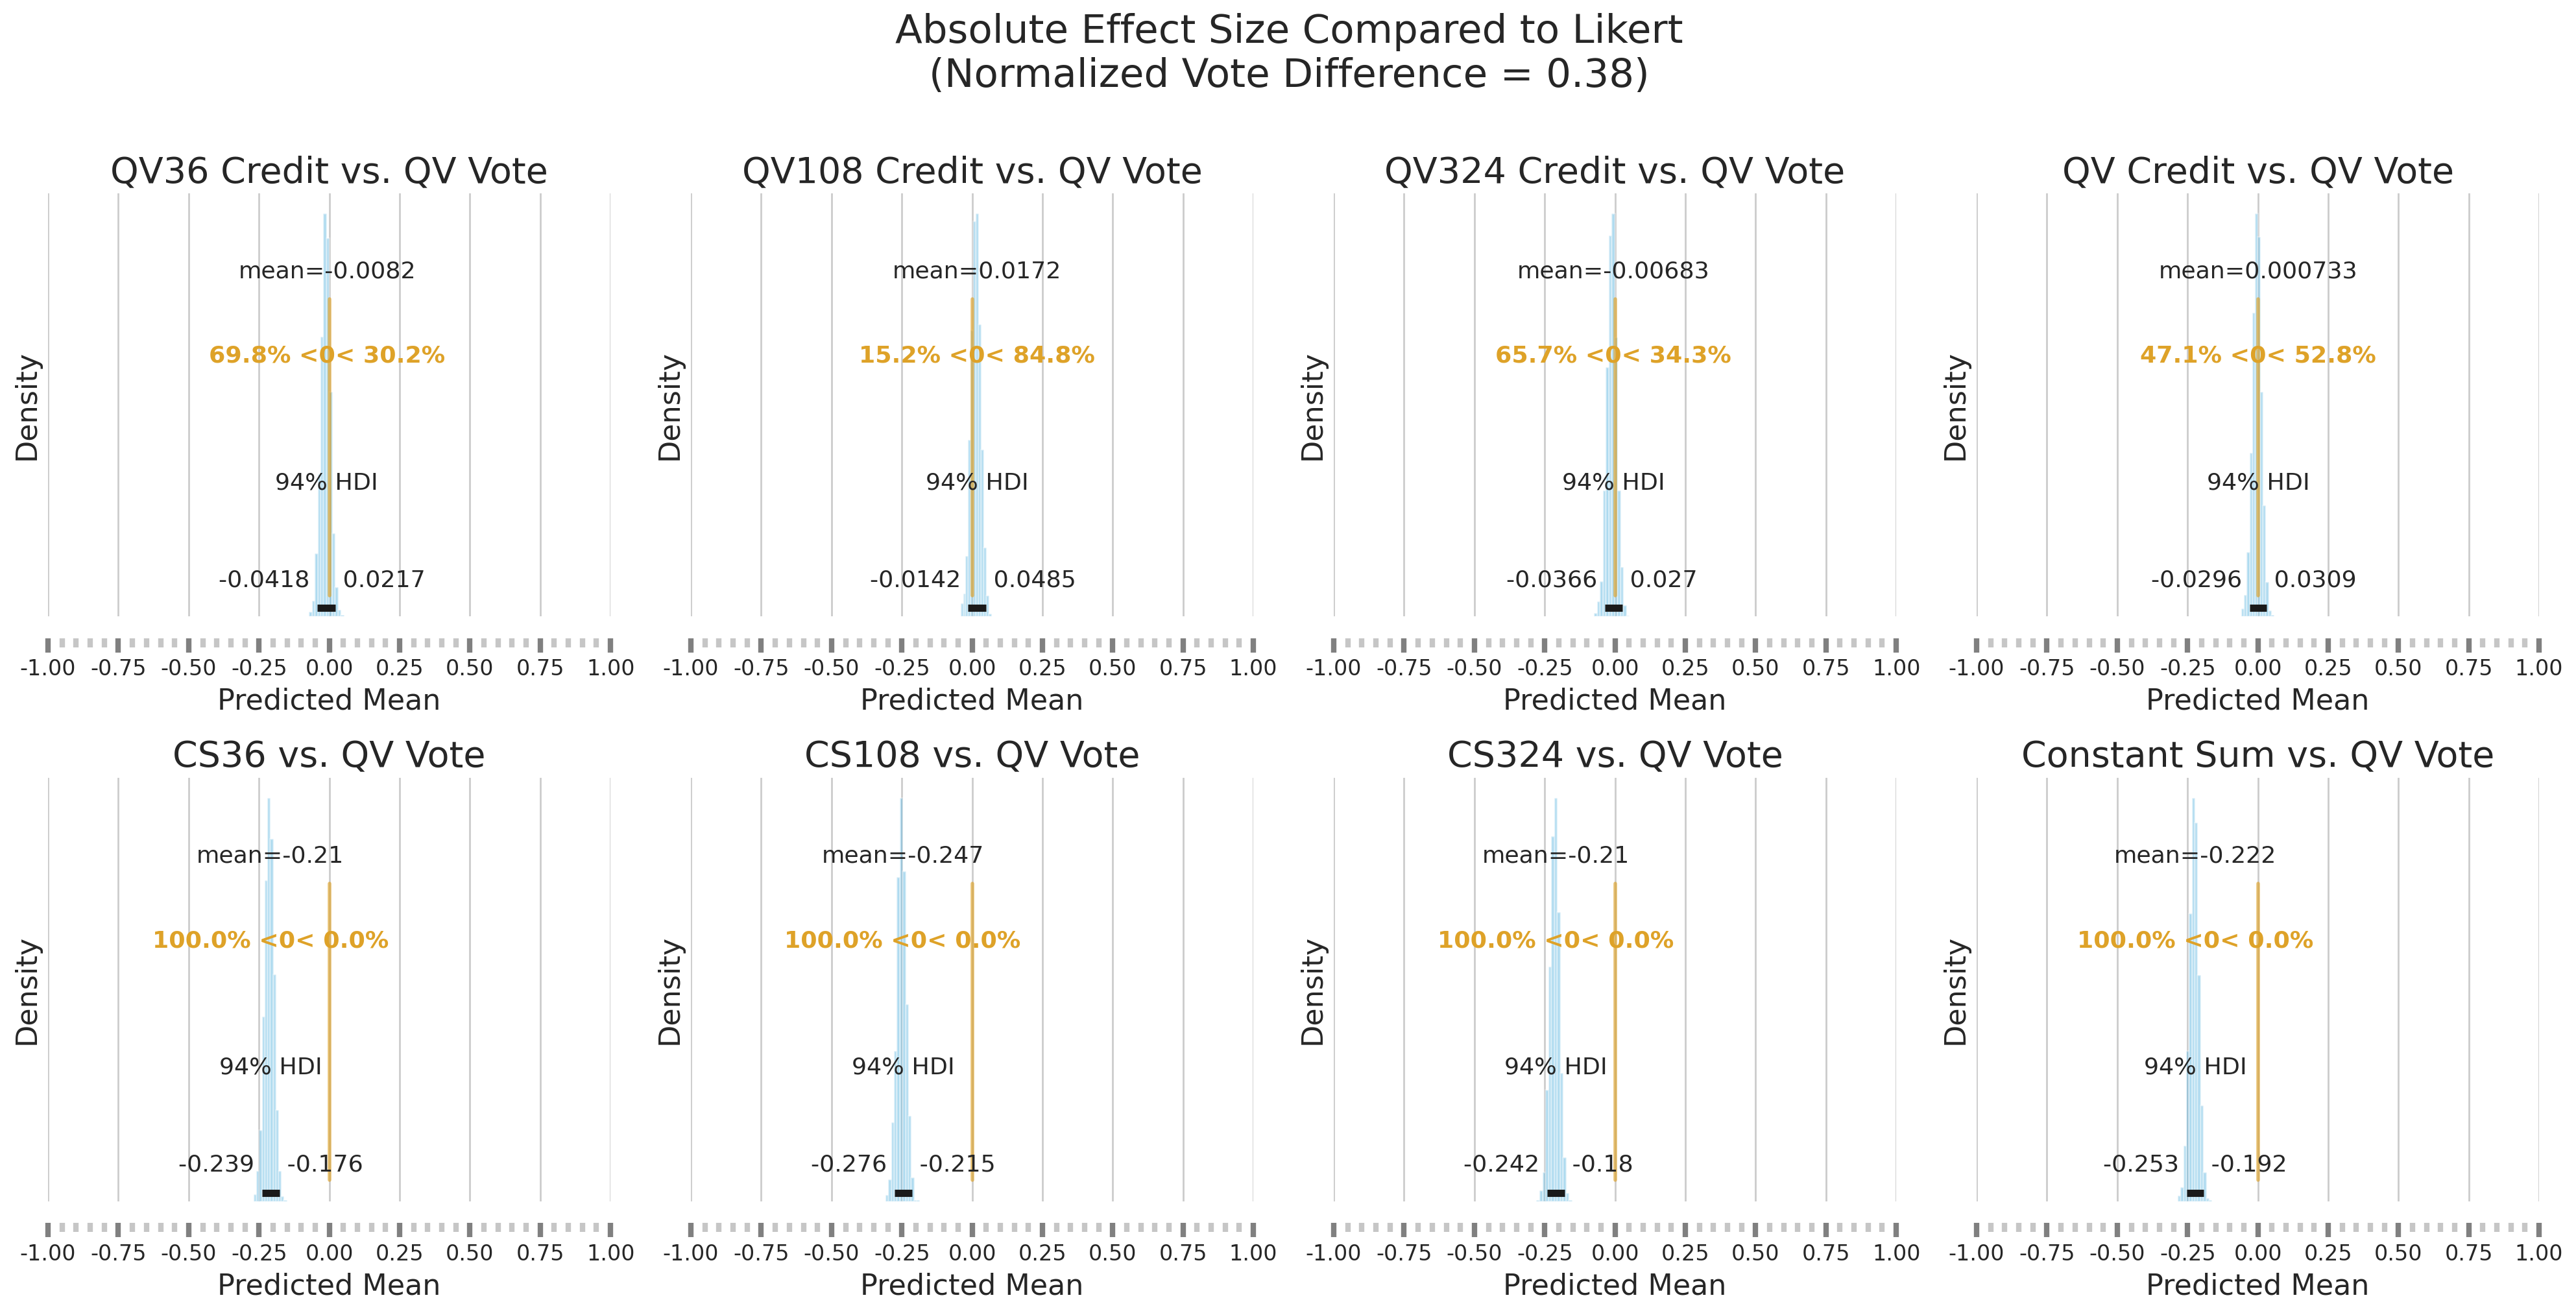

In [101]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'QV Vote', 2, 4, normalized_vote_diff, 'All6_against_QV_vote')

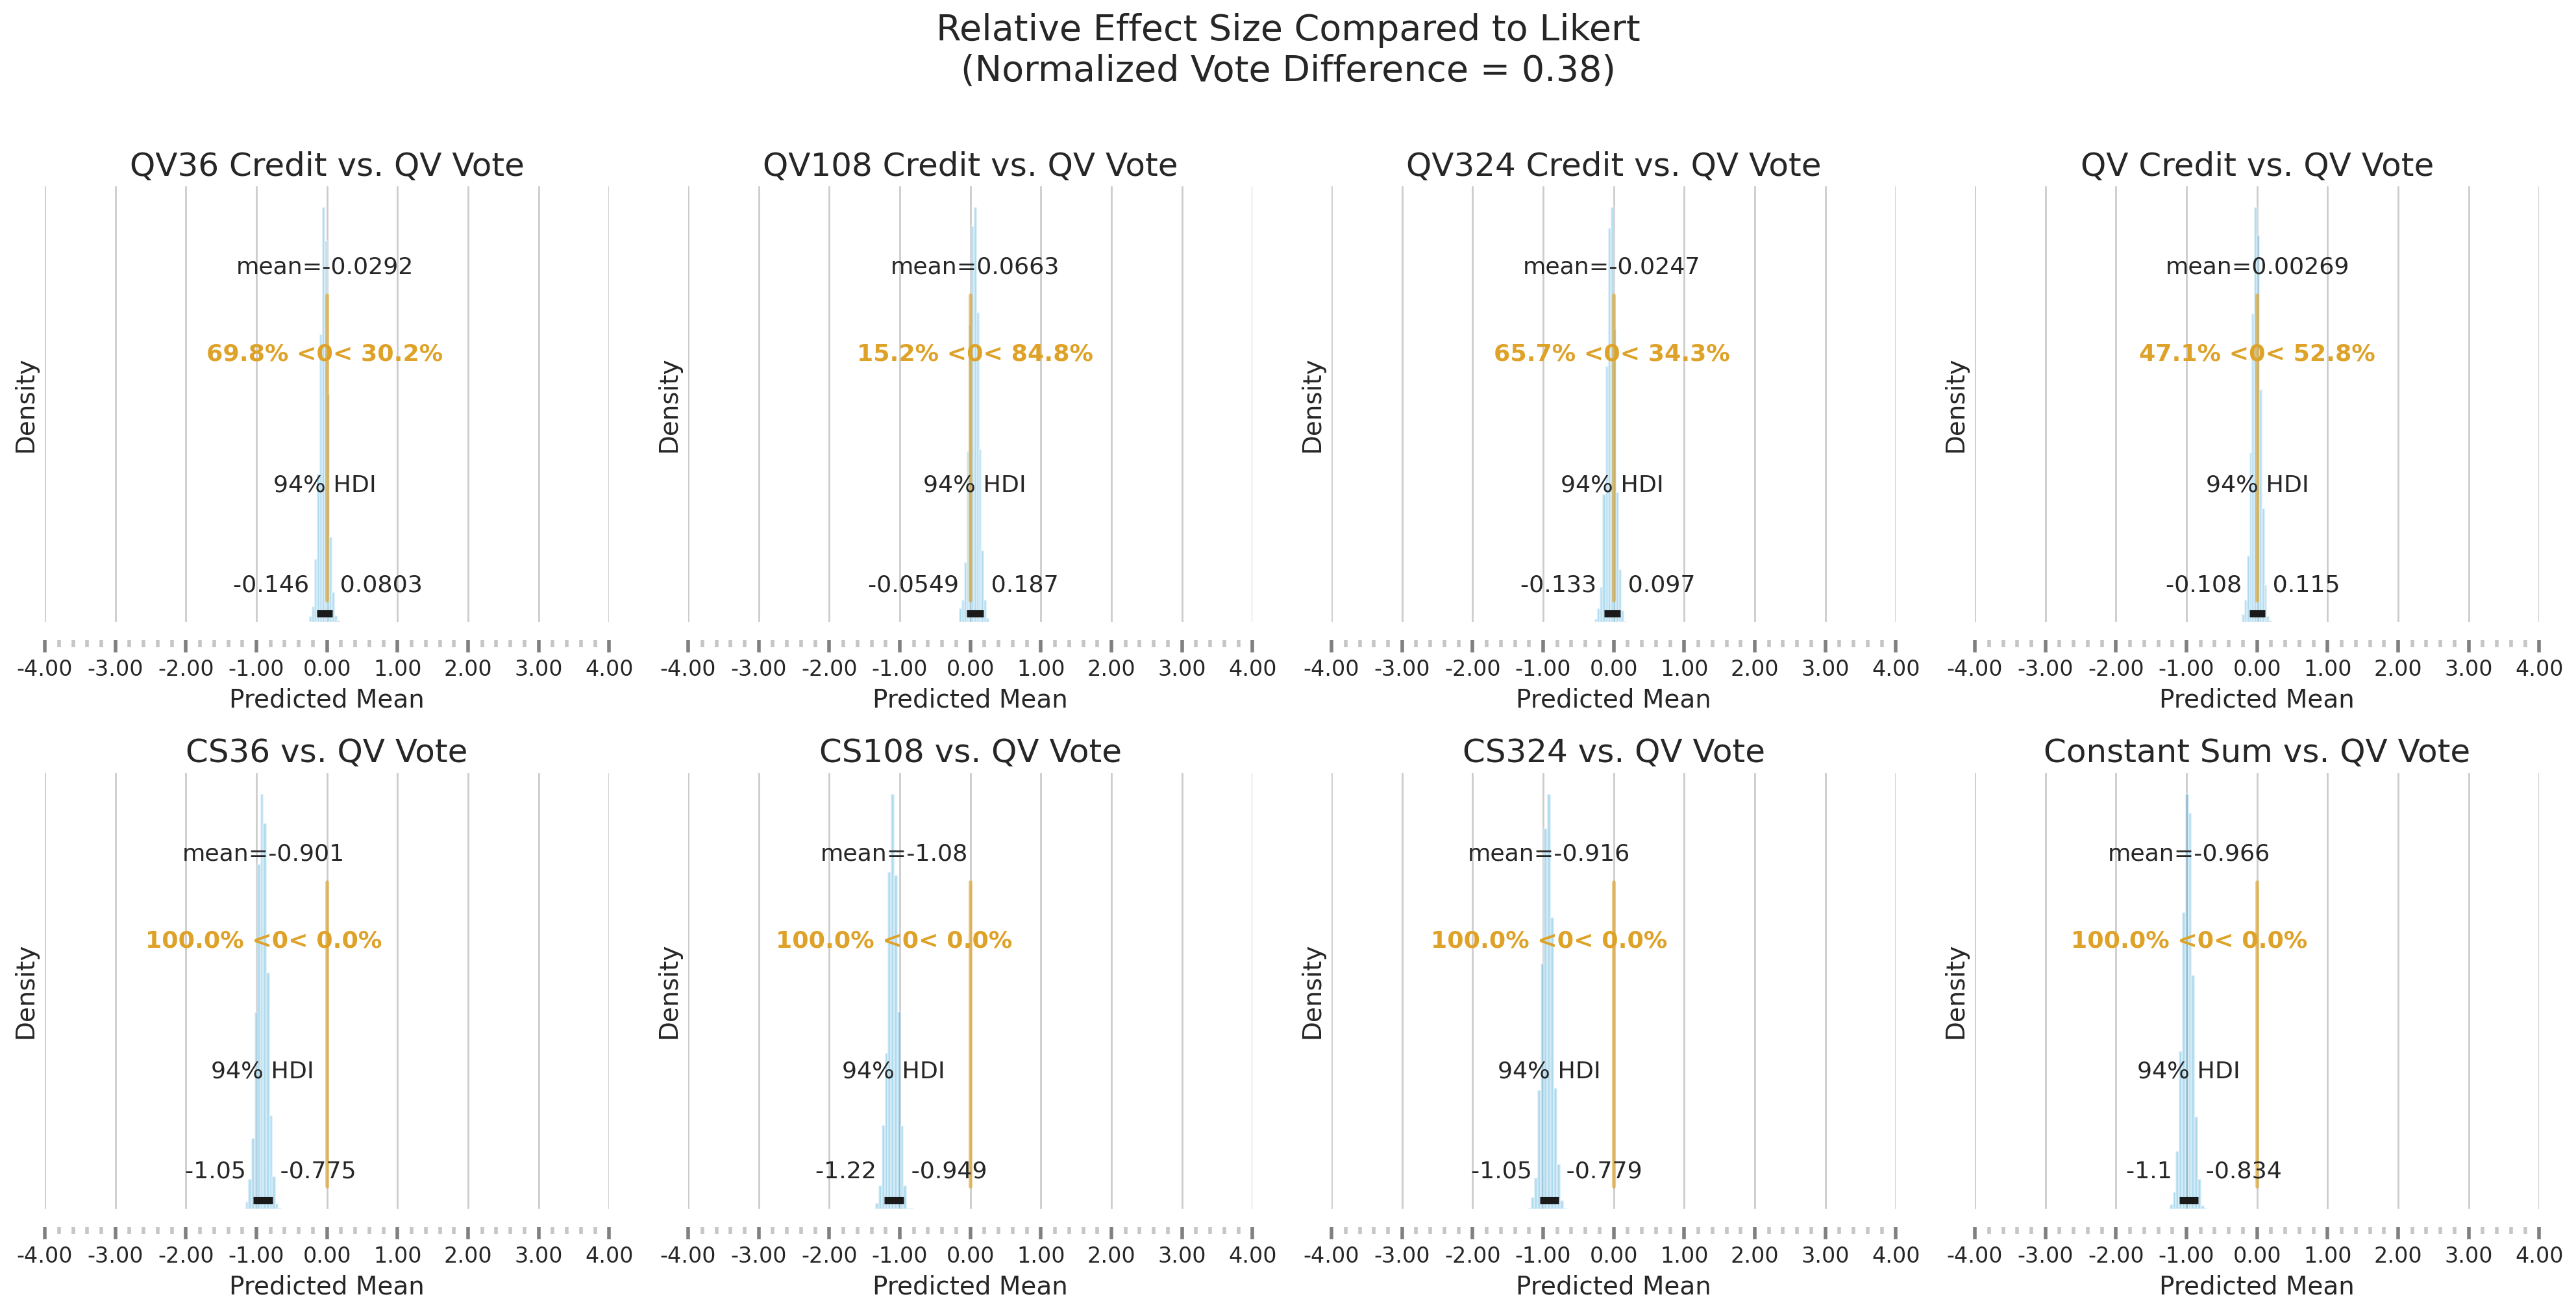

In [102]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'QV Vote', 2, 4, normalized_vote_diff, 'All6_against_QV_vote')

In [103]:
# Plot absolute difference between Unlimited QV, Unlimited QV_C with likert
conds_to_plot = [
  'Unlimited QV Vote',
  'Unlimited QV Credit',
  'Unlimited QV'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

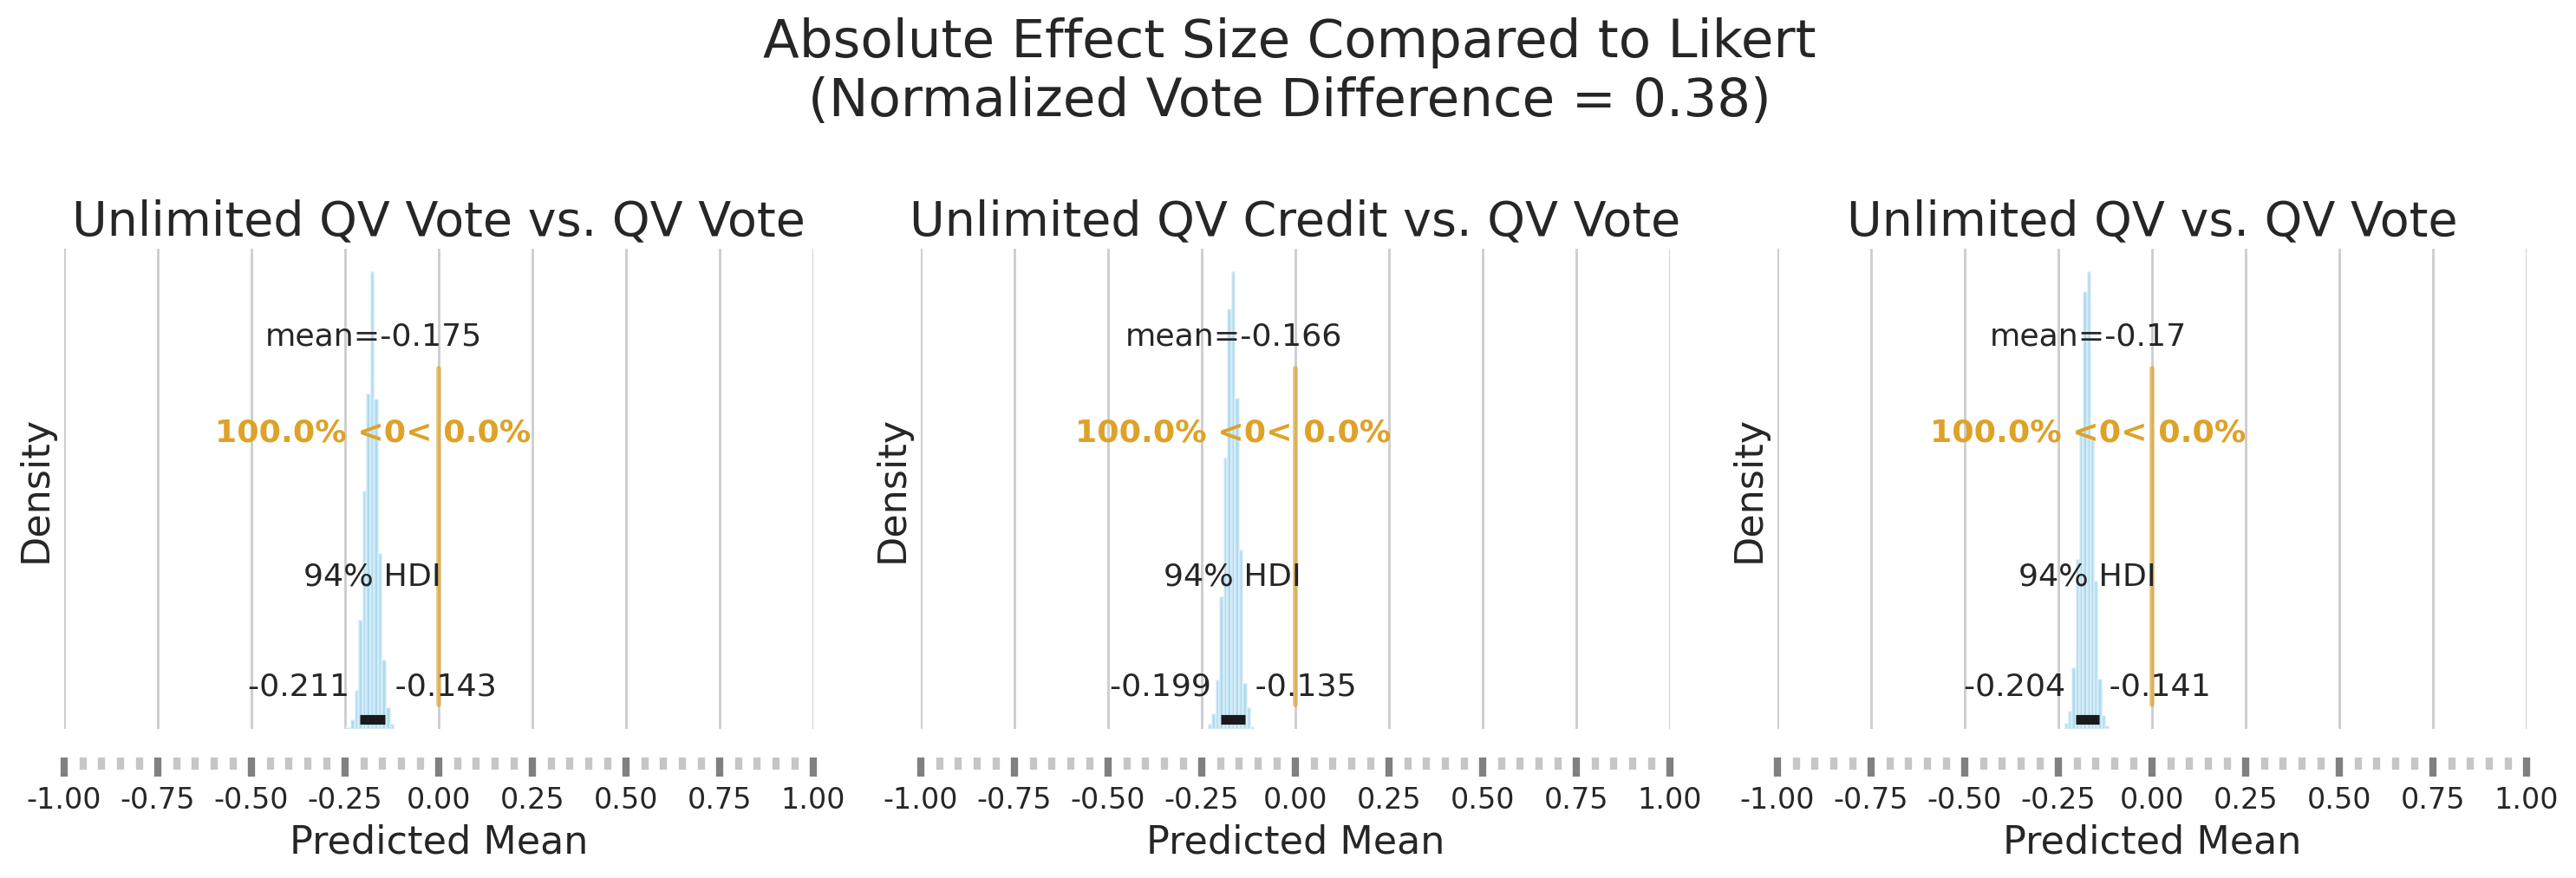

In [104]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'QV Vote', 1, 3, normalized_vote_diff, 'Unlimited_against_QV_vote')

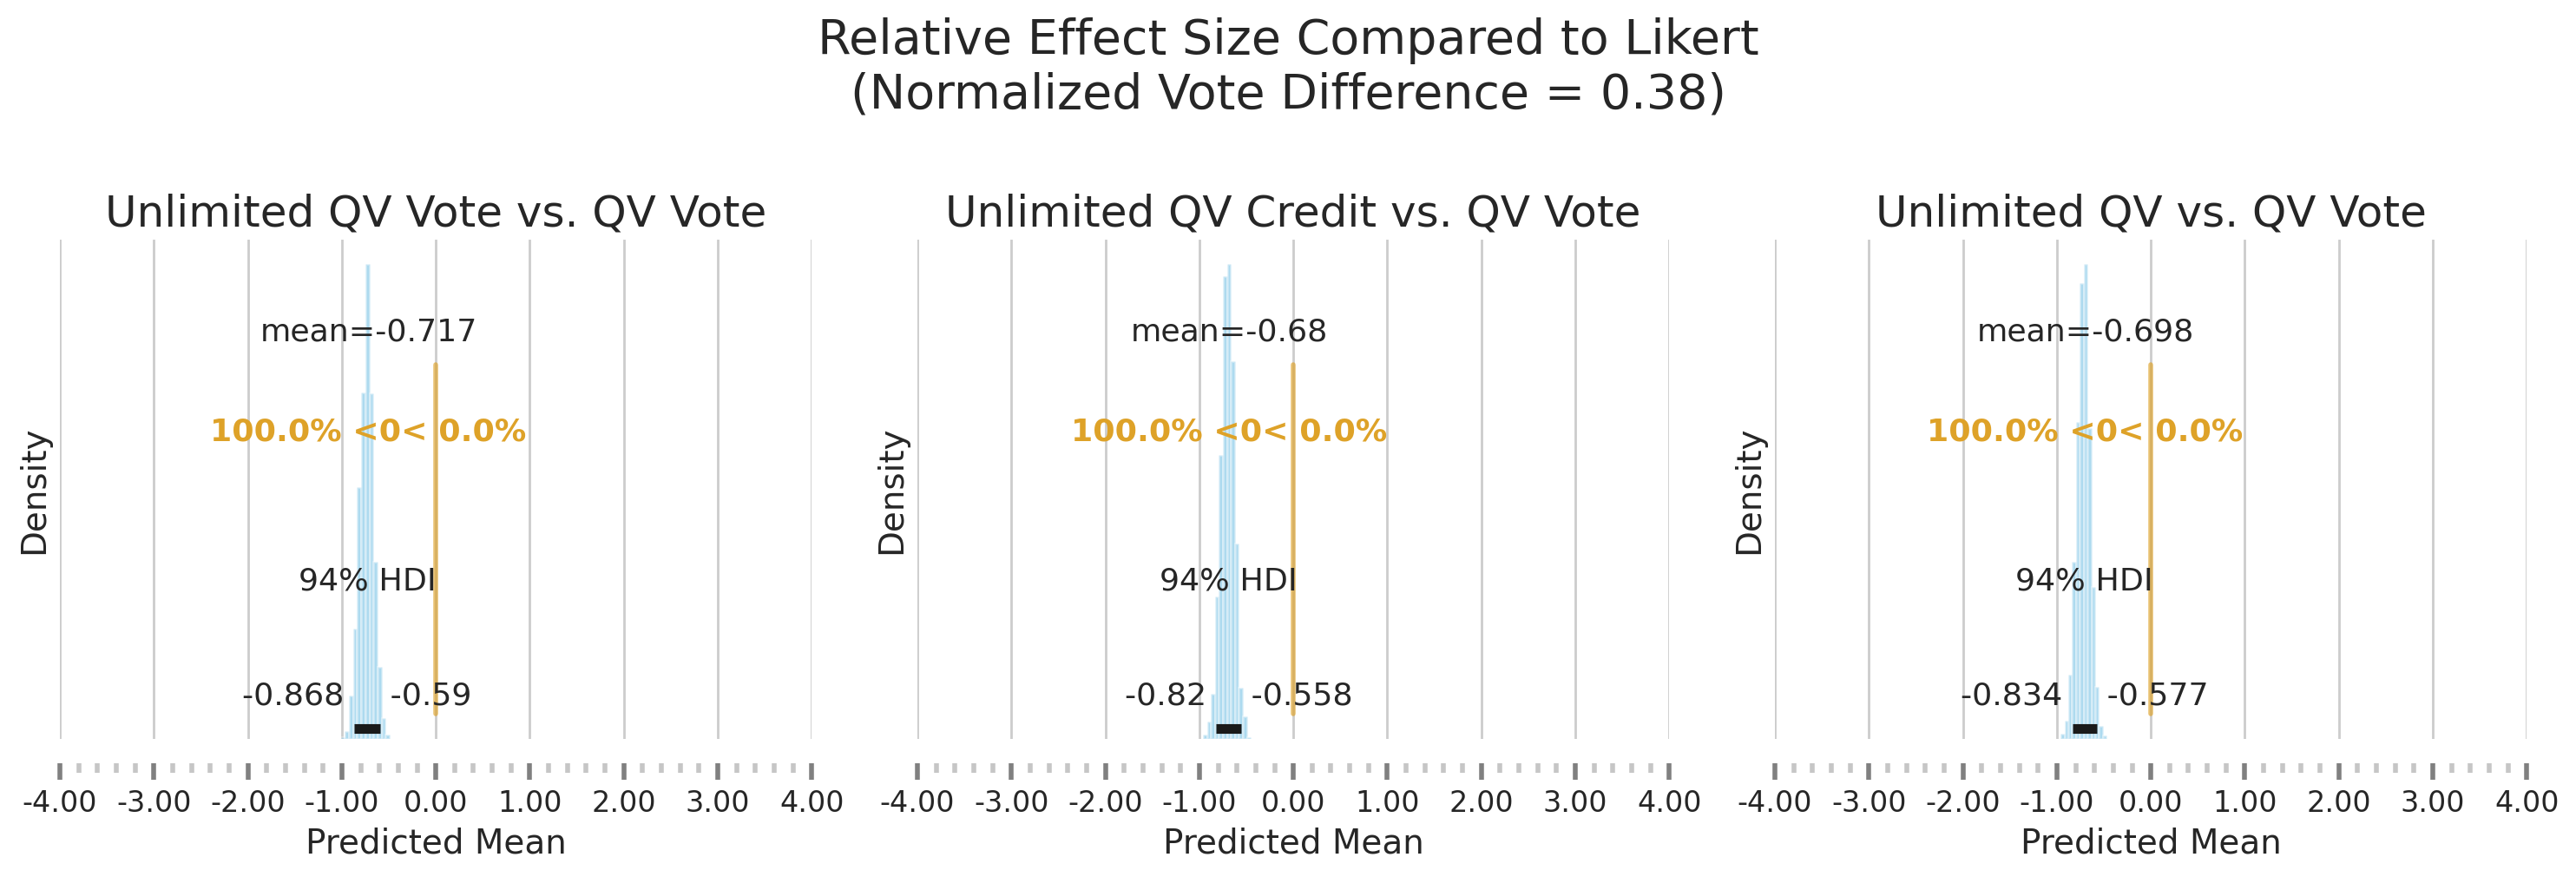

In [105]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'QV Vote', 1, 3, normalized_vote_diff, 'Unlimited_against_QV_vote')

##### Compare to CS (CS Avg as ref)

In [106]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['Constant Sum'], pred_sigmas_grouped['Constant Sum'])

In [107]:
# Plot absolute difference between within QV
conds_to_plot = [
  'Unlimited QV Vote',
  'Unlimited QV Credit',
  'Unlimited QV',
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

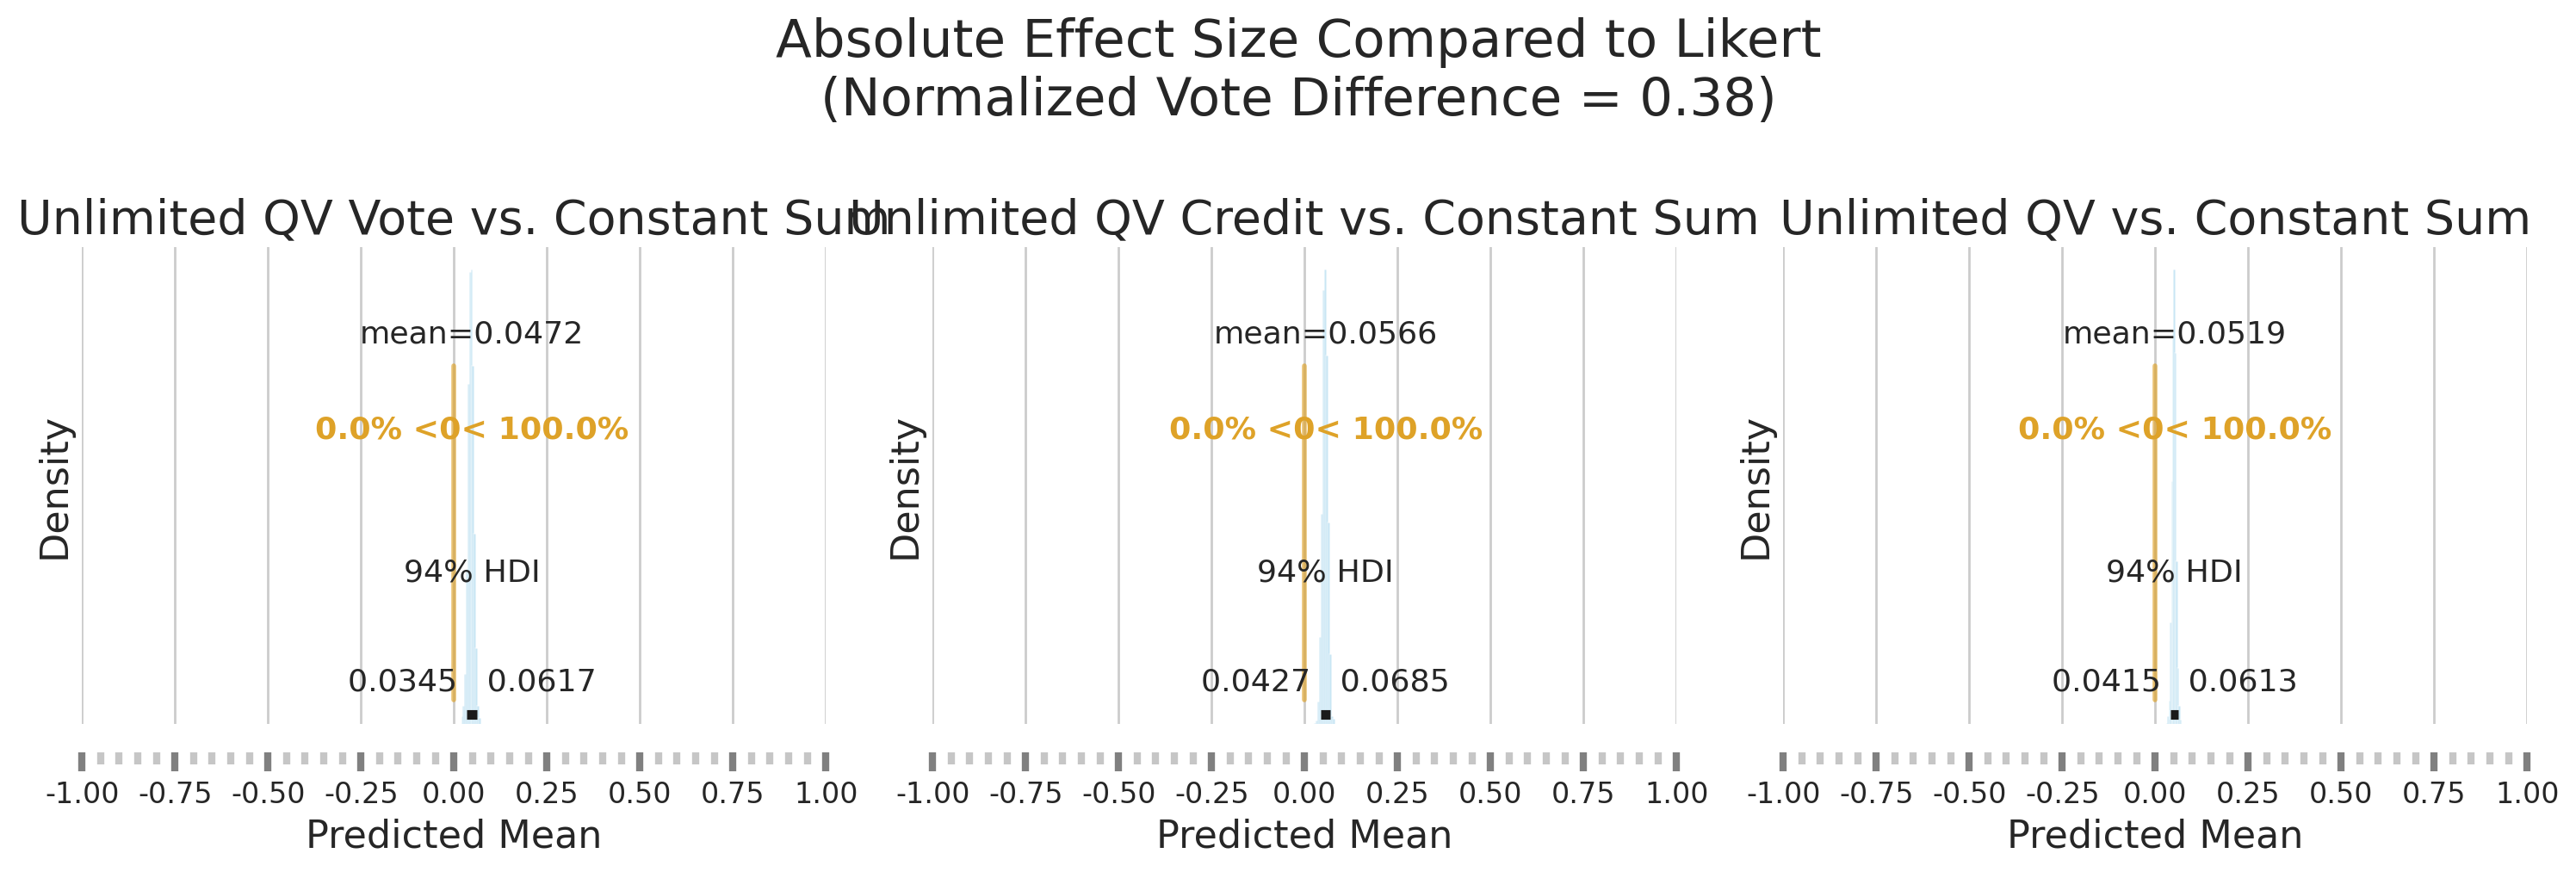

In [108]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'Constant Sum', 1, 3, normalized_vote_diff, 'Unlimited_against_CS')

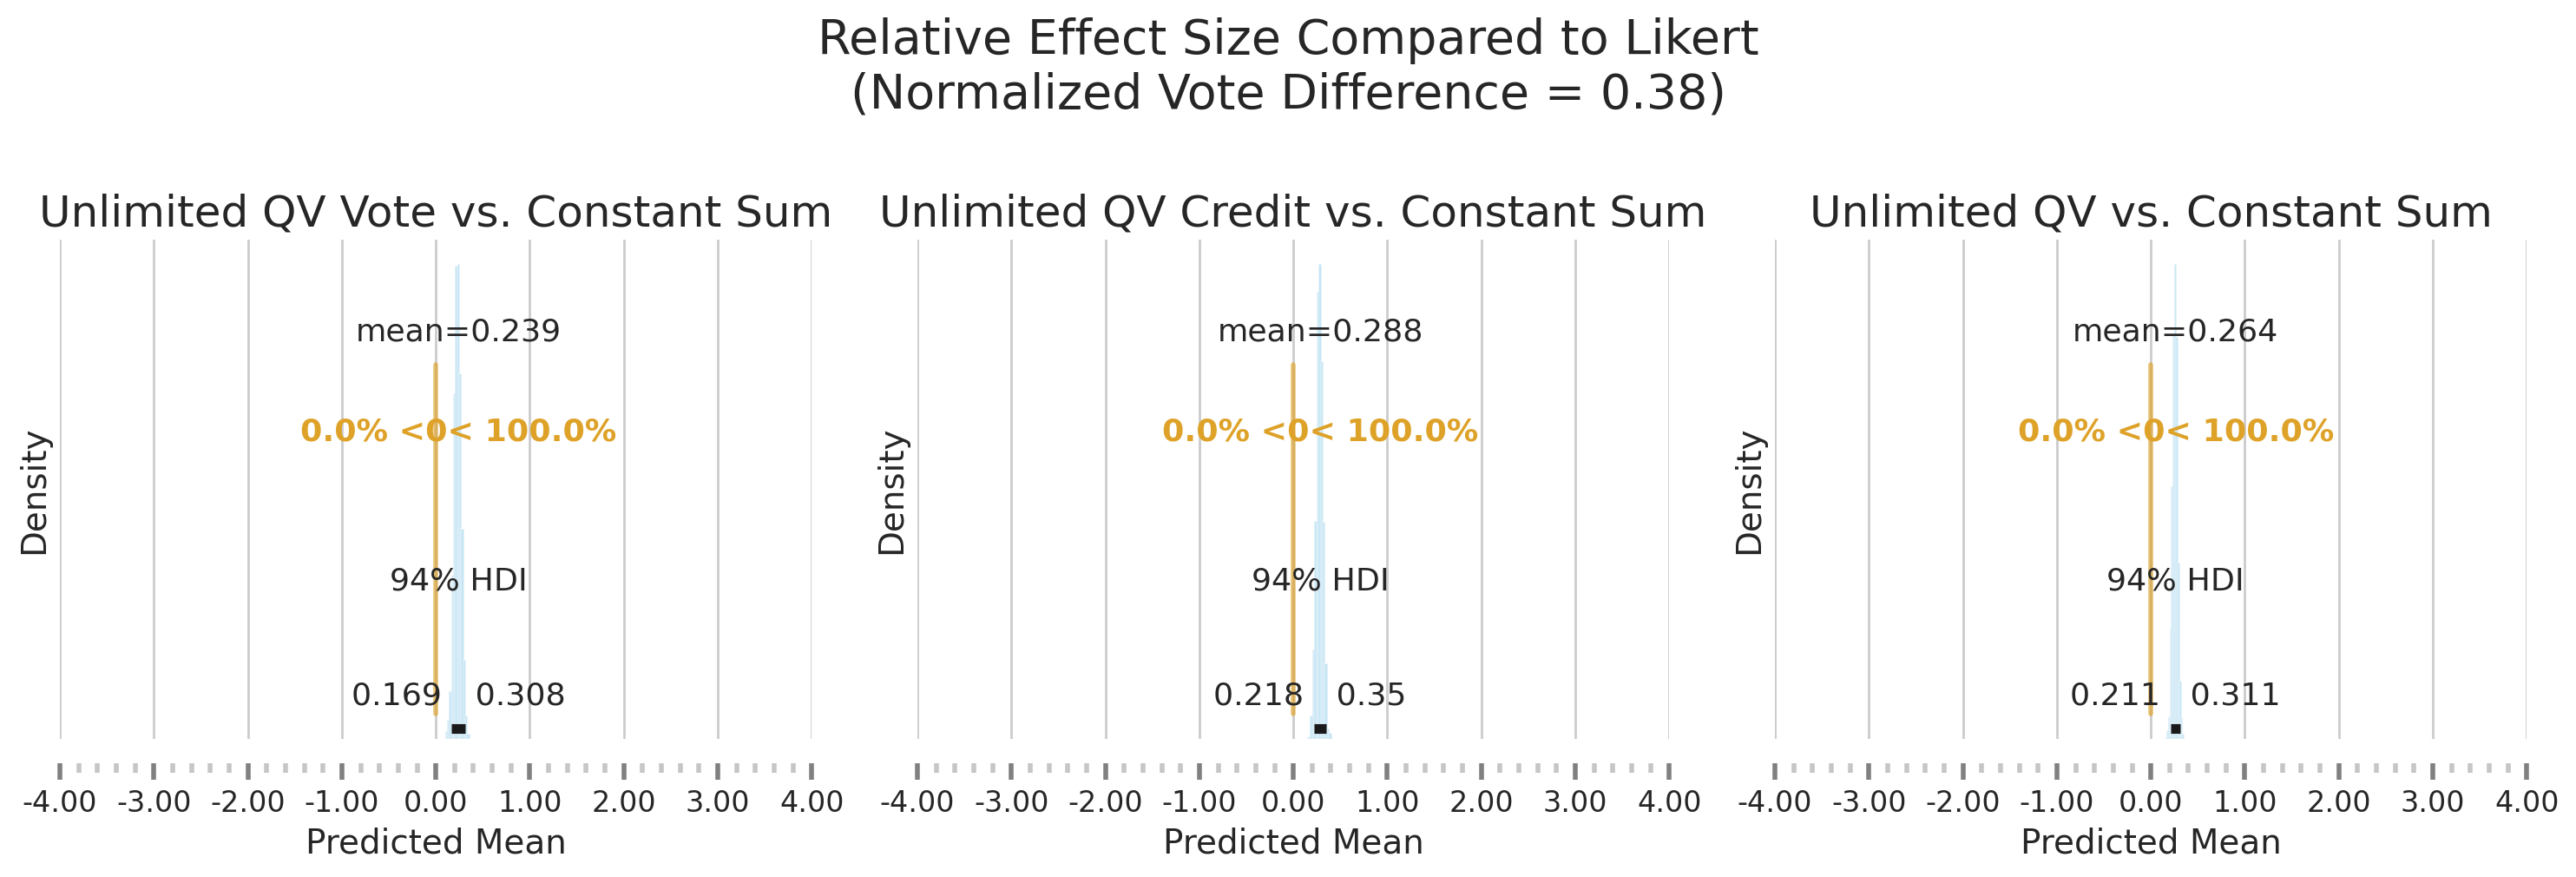

In [109]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'Constant Sum', 1, 3, normalized_vote_diff, 'Unlimited_against_CS')

##### Compare within QV Vote (QV108 as ref)

In [110]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['QV108 Vote'], pred_sigmas_grouped['QV108 Vote'])

In [111]:
# Plot absolute difference between within QV
conds_to_plot = [
  'QV36 Vote',
  'QV324 Vote'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

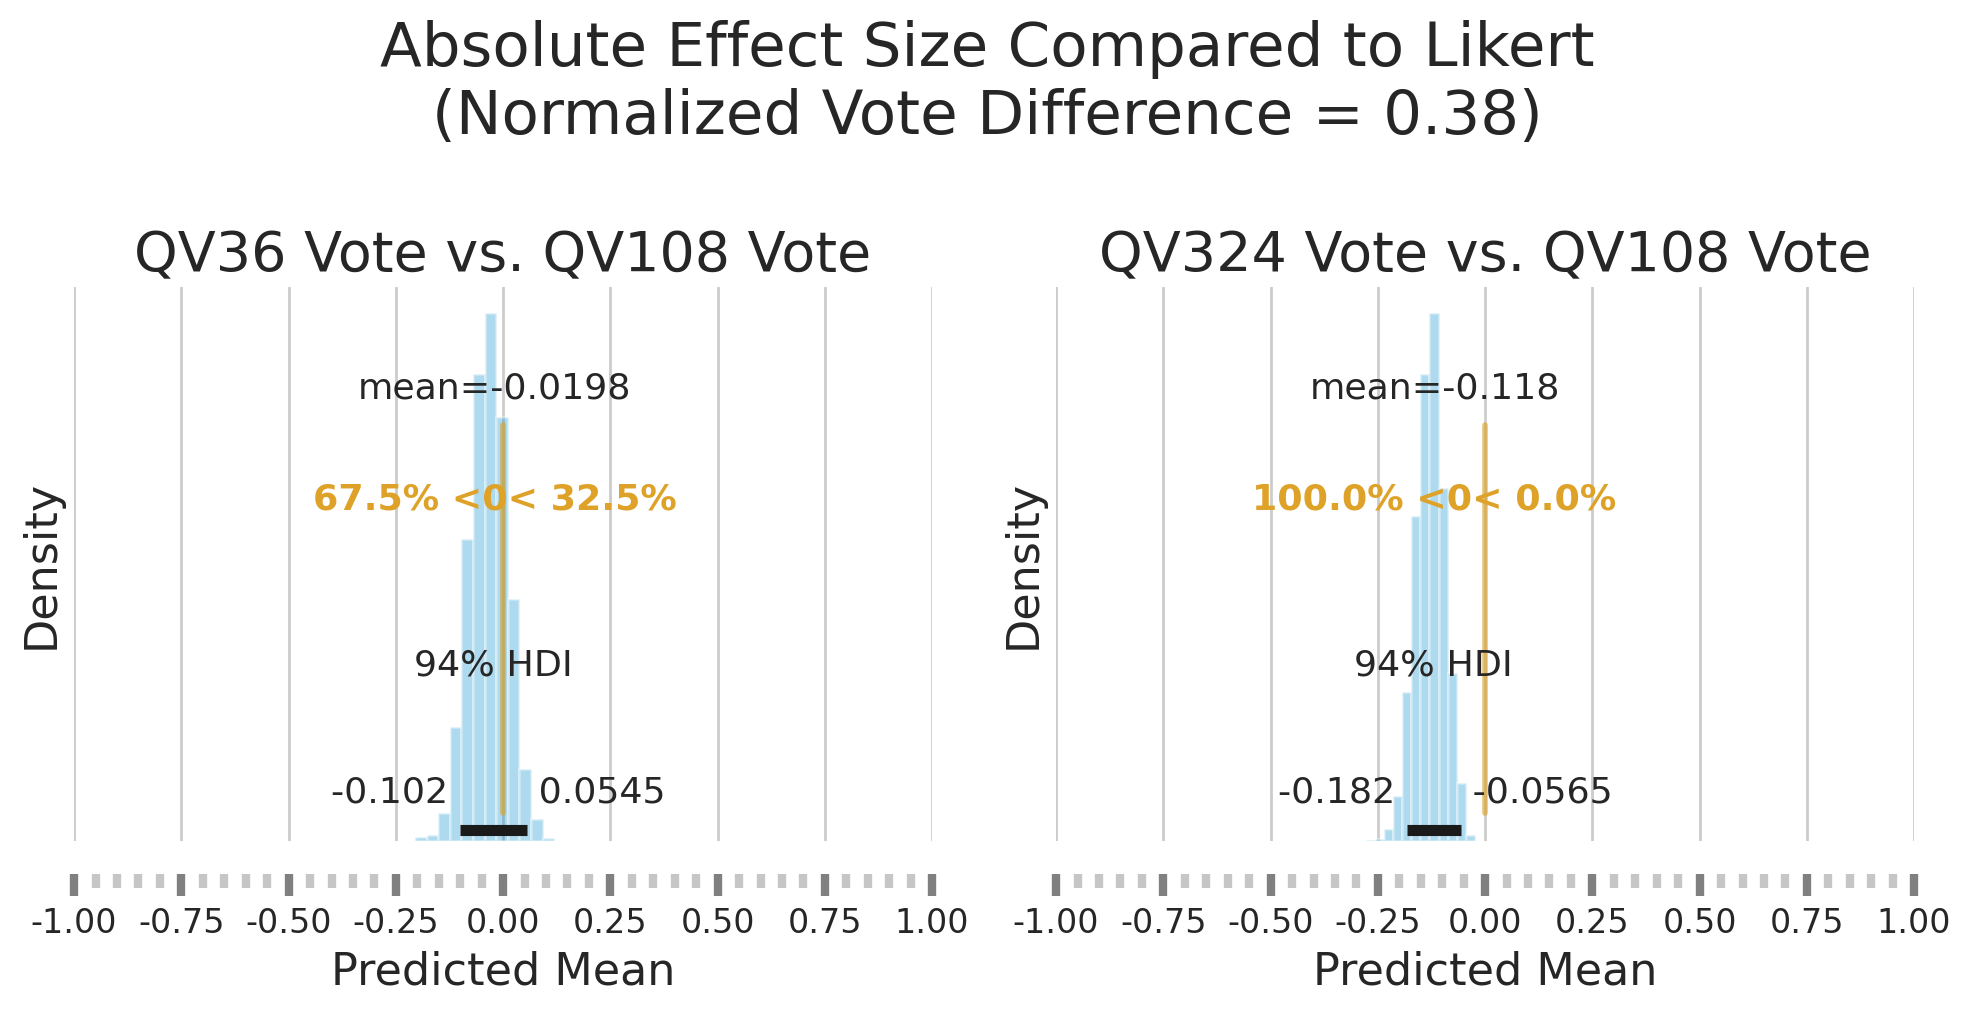

In [112]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'QV108 Vote', 1, 2, normalized_vote_diff, 'Within_QV_Vote')

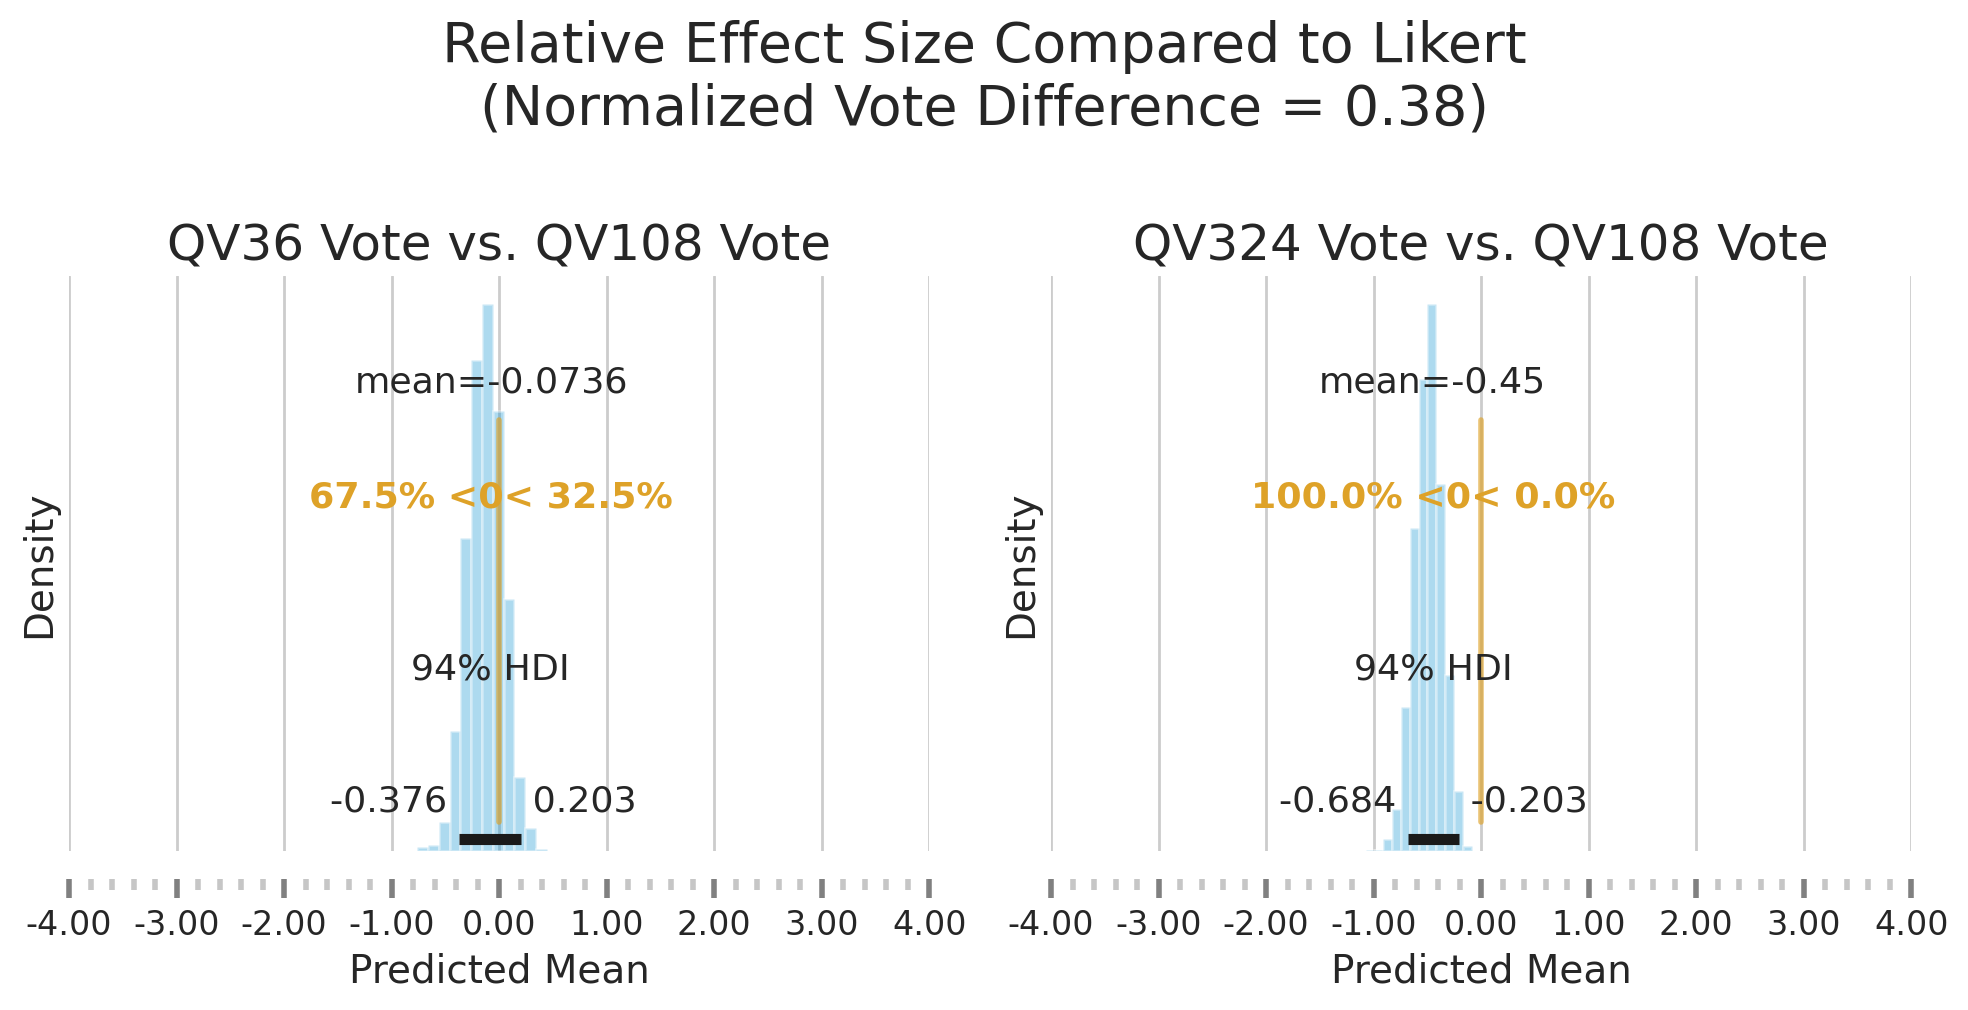

In [113]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'QV108 Vote', 1, 2, normalized_vote_diff, 'Within_QV_Vote')

##### Compare within QV Credit (QV108 Credit as ref)

In [114]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['QV108 Credit'], pred_sigmas_grouped['QV108 Credit'])

In [115]:
# Plot absolute difference between within QV
conds_to_plot = [
  'QV36 Credit',
  'QV324 Credit'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

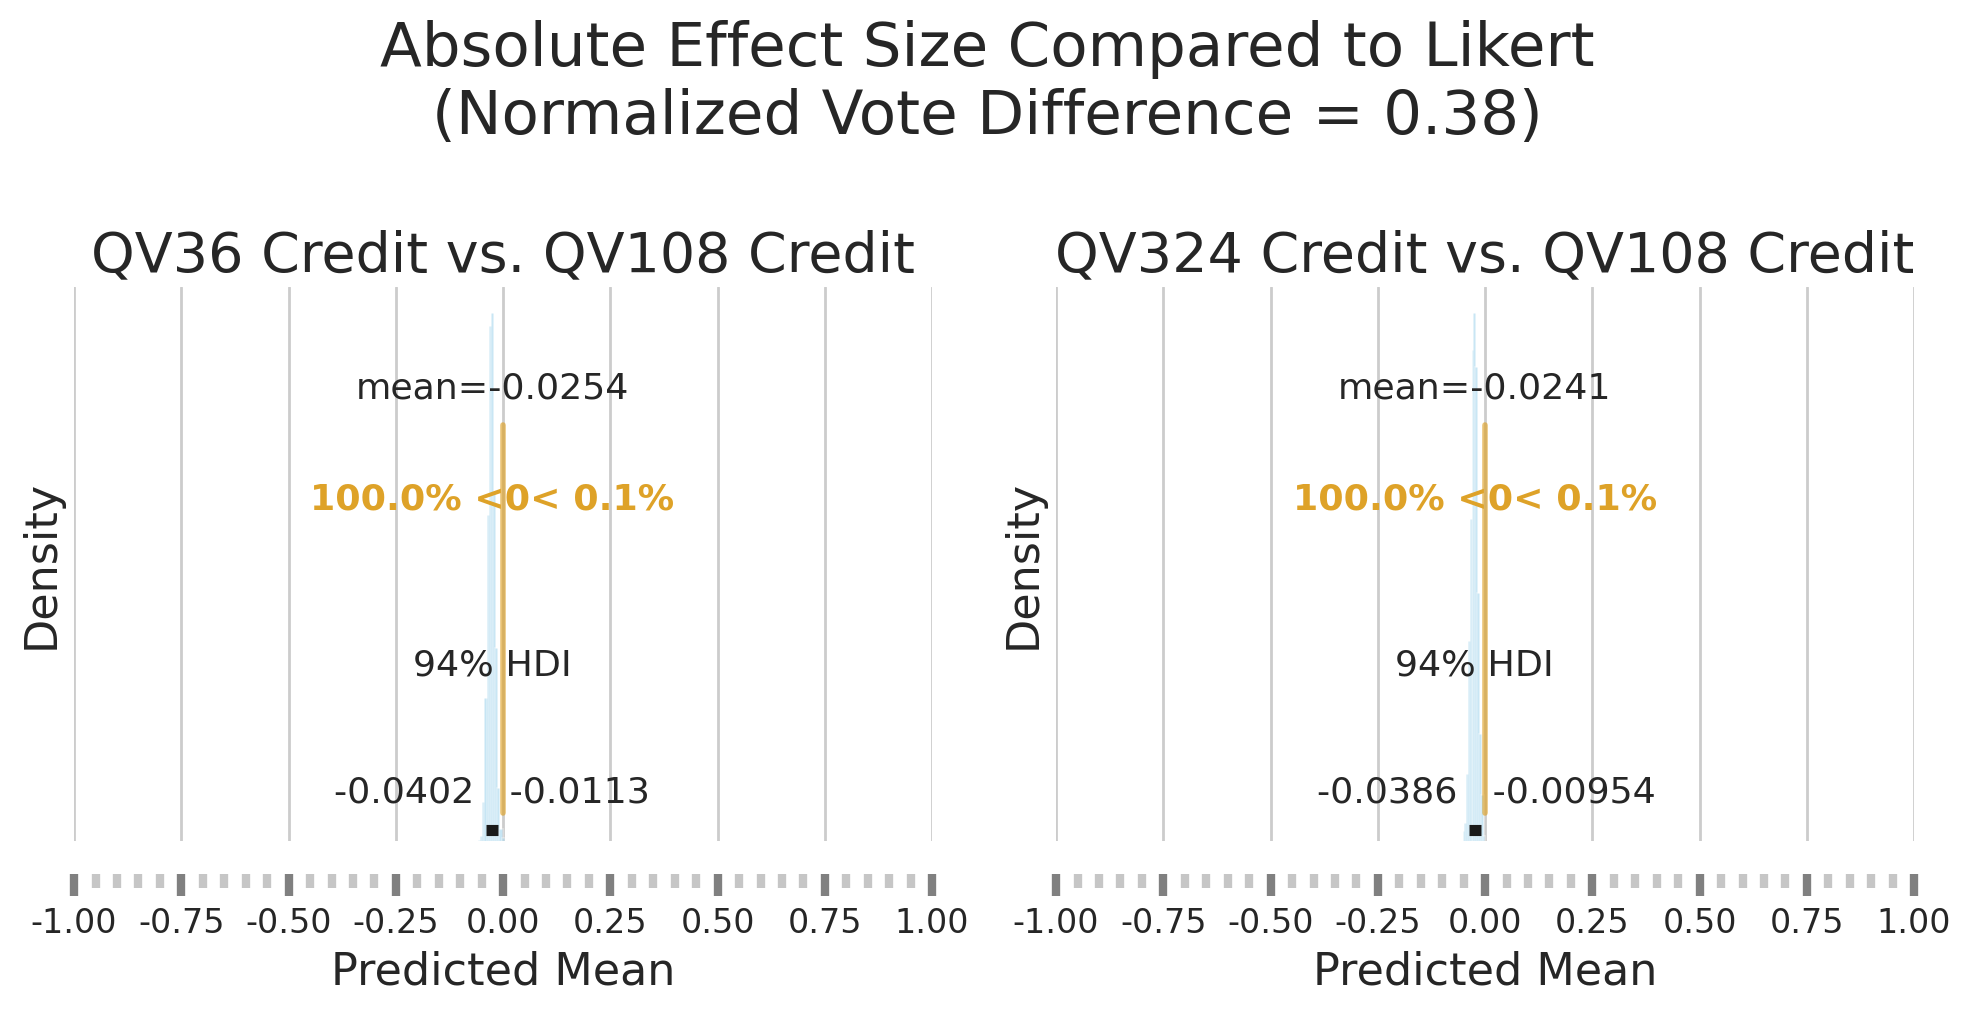

In [116]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'QV108 Credit', 1, 2, normalized_vote_diff, 'Within_QV_Credit')

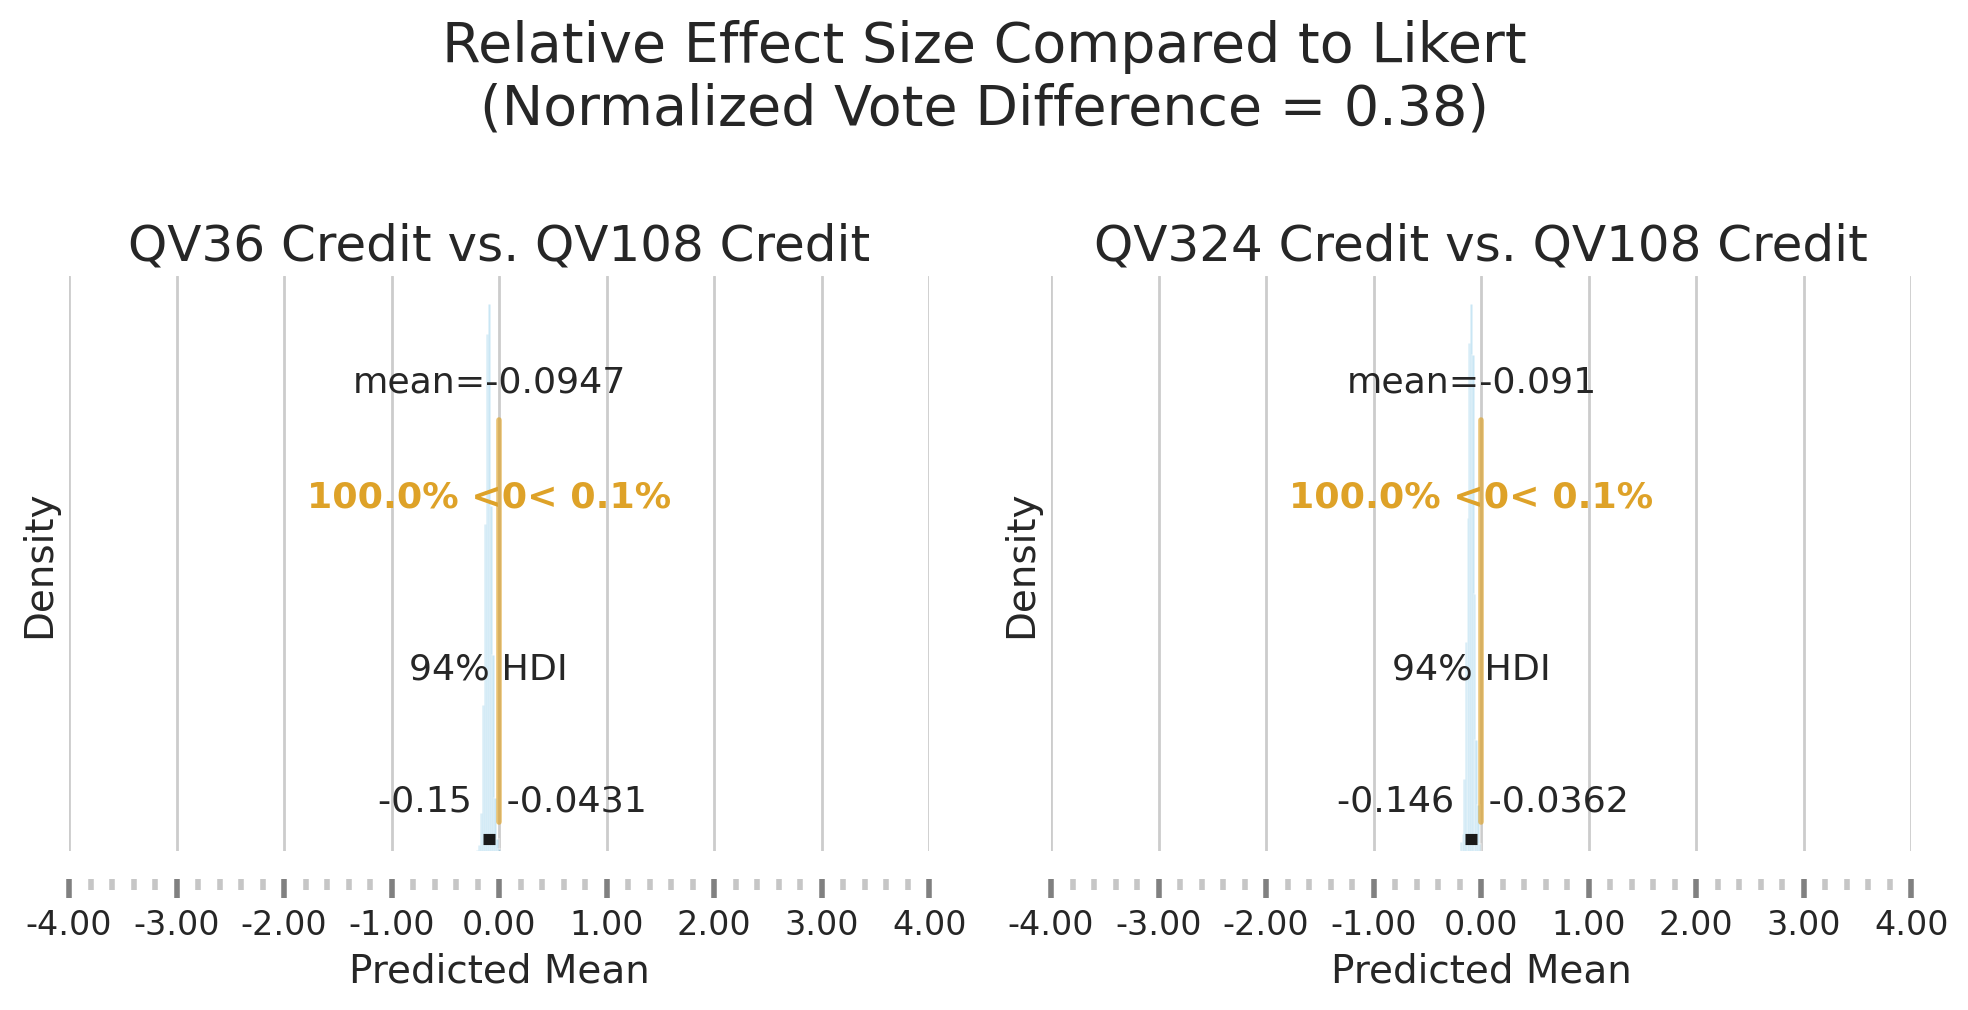

In [117]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'QV108 Credit', 1, 2, normalized_vote_diff, 'Within_QV_Credit')

##### Compare within CS (CS108 as ref)

In [118]:
contrasts_abs, contrasts_rel = calculate_effect_sizes(pred_mus_grouped, pred_sigmas_grouped, pred_mus_grouped['CS108'], pred_sigmas_grouped['CS108'])

In [119]:
# Plot absolute difference between within QV
conds_to_plot = [
  'CS36',
  'CS324'
]

contrasts_abs_to_plot = {cond: contrasts_abs[cond] for cond in conds_to_plot}
contrasts_rel_to_plot = {cond: contrasts_rel[cond] for cond in conds_to_plot}

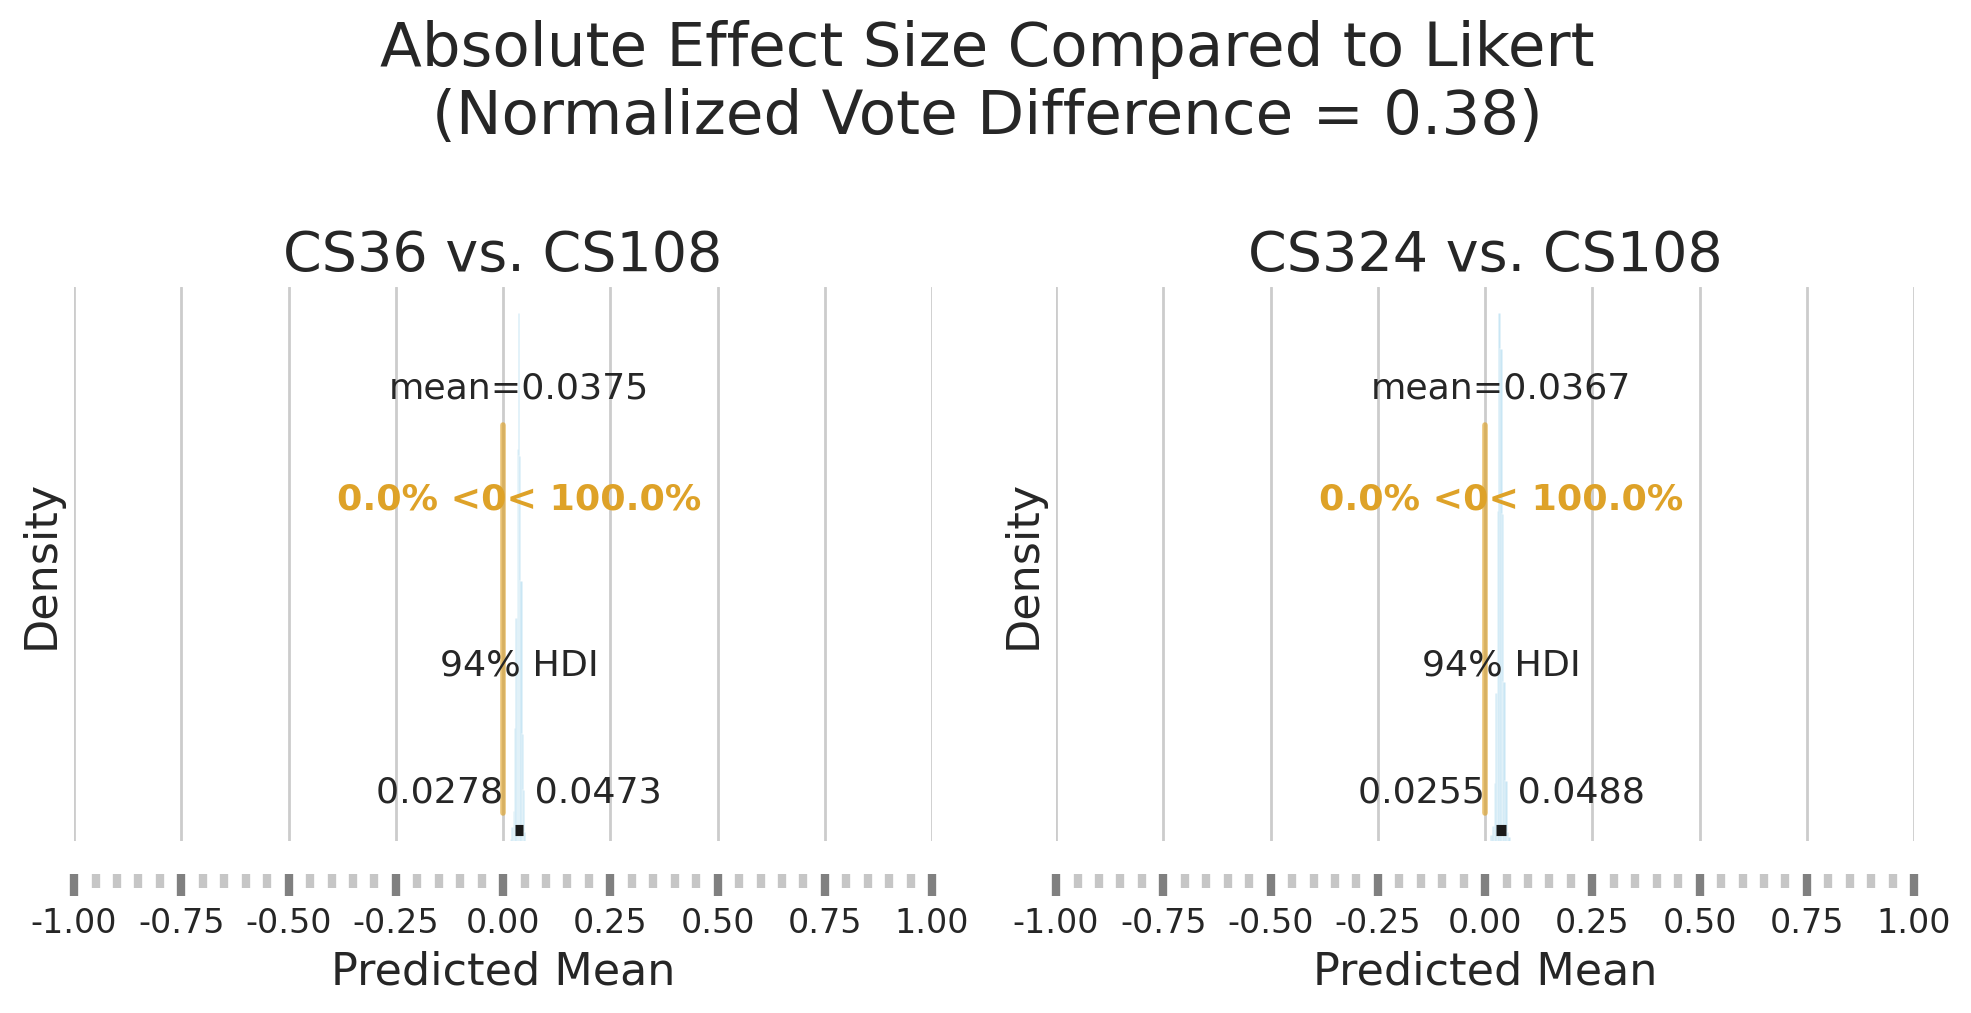

In [120]:
plot_absolute_effect_sizes(contrasts_abs_to_plot, conds_to_plot, 'CS108', 1, 2, normalized_vote_diff, 'Within_CS')

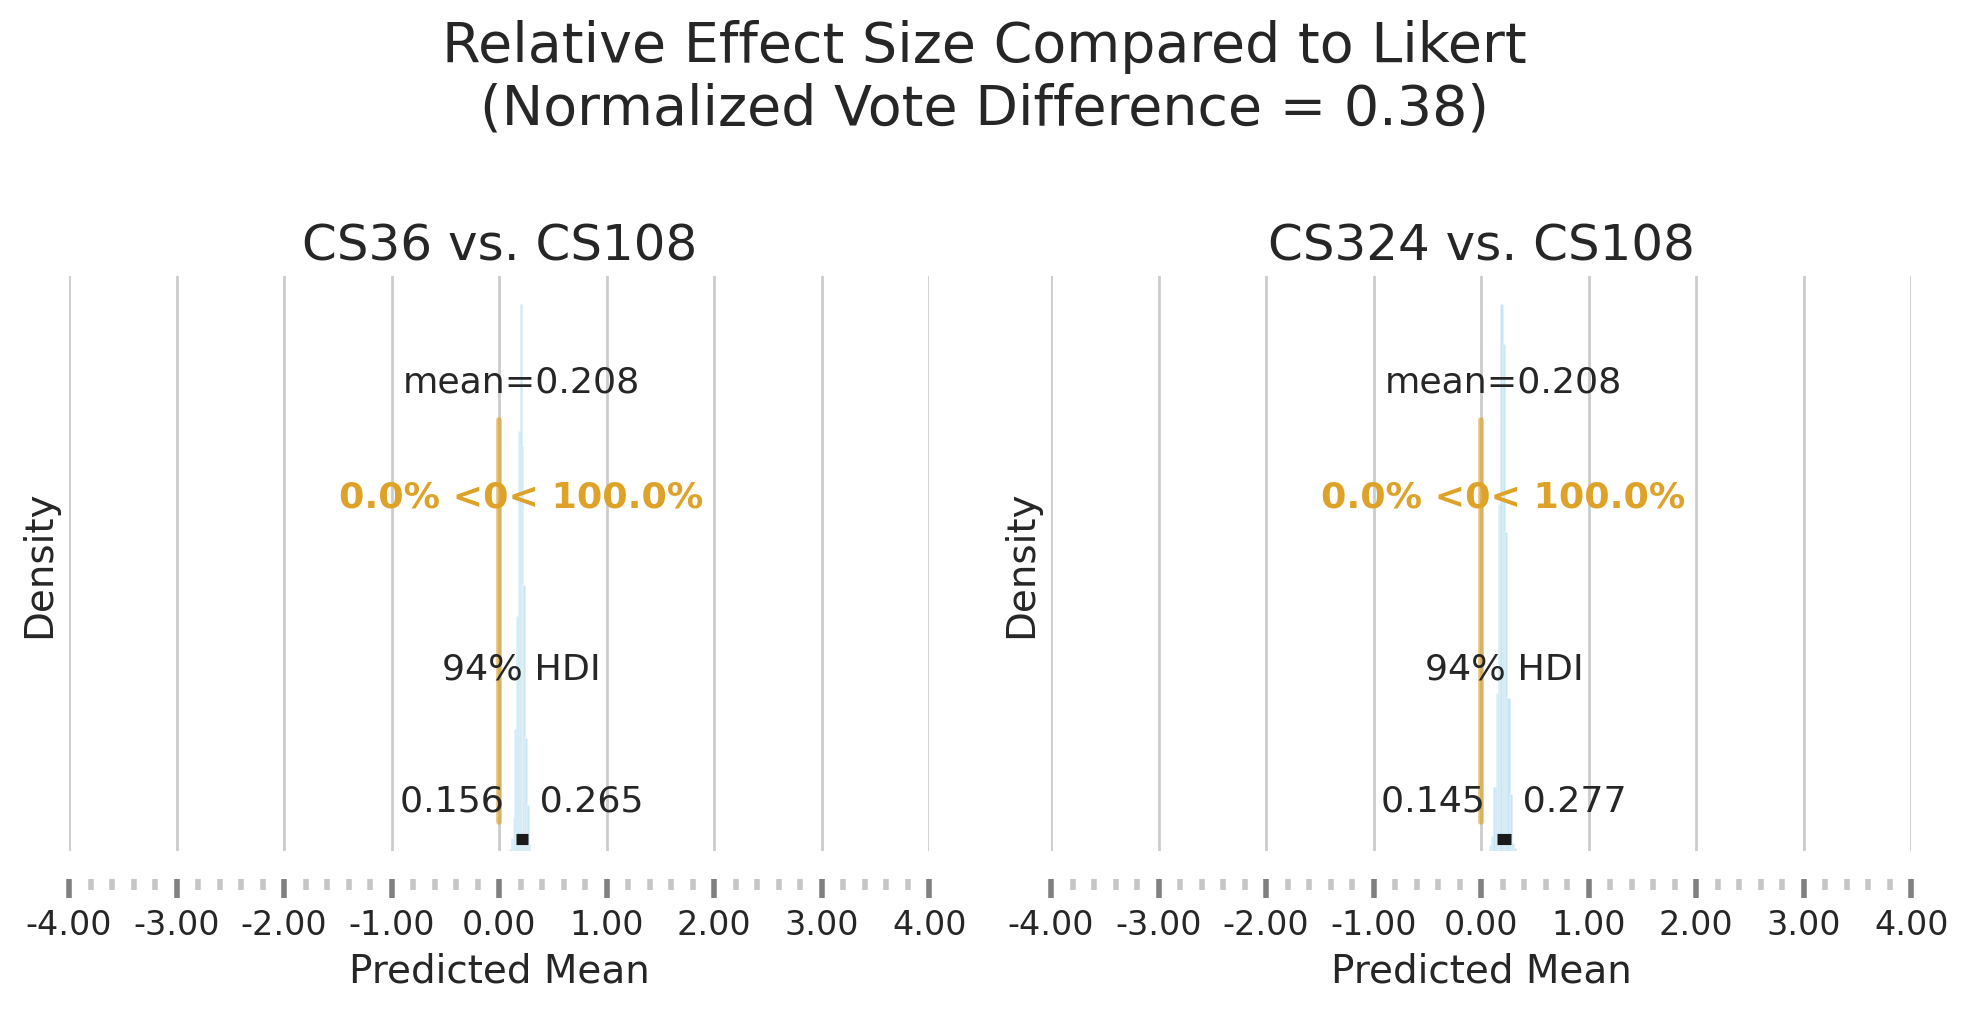

In [121]:
plot_relative_effect_sizes(contrasts_rel_to_plot, conds_to_plot, 'CS108', 1, 2, normalized_vote_diff, 'Within_CS')

In [122]:
sns.color_palette("Blues", 12)

[(0.9101883890811227, 0.9469127258746636, 0.9812995001922338),
 (0.8495501730103806, 0.9075432525951557, 0.9616147635524798),
 (0.7904959630911188, 0.8681737793156478, 0.9419300269127259),
 (0.7063437139561707, 0.8290196078431372, 0.9127104959630911),
 (0.6047058823529413, 0.7839753940792004, 0.8791387927720108),
 (0.47921568627450983, 0.7150788158400615, 0.8520722798923491),
 (0.37168781237985393, 0.6496270665128797, 0.8205151864667436),
 (0.27080353710111493, 0.5807304882737409, 0.7811457131872357),
 (0.18726643598615916, 0.5009919261822375, 0.7396078431372549),
 (0.11480199923106507, 0.42443675509419465, 0.6951941560938102),
 (0.05328719723183391, 0.34569780853517873, 0.6336793540945791),
 (0.03137254901960784, 0.2653748558246828, 0.5341484044598231)]

['QS Vote', 'QS Credit', 'Unlimited QS Credit', 'Unlimited QS Vote', 'Likert', 'LS']


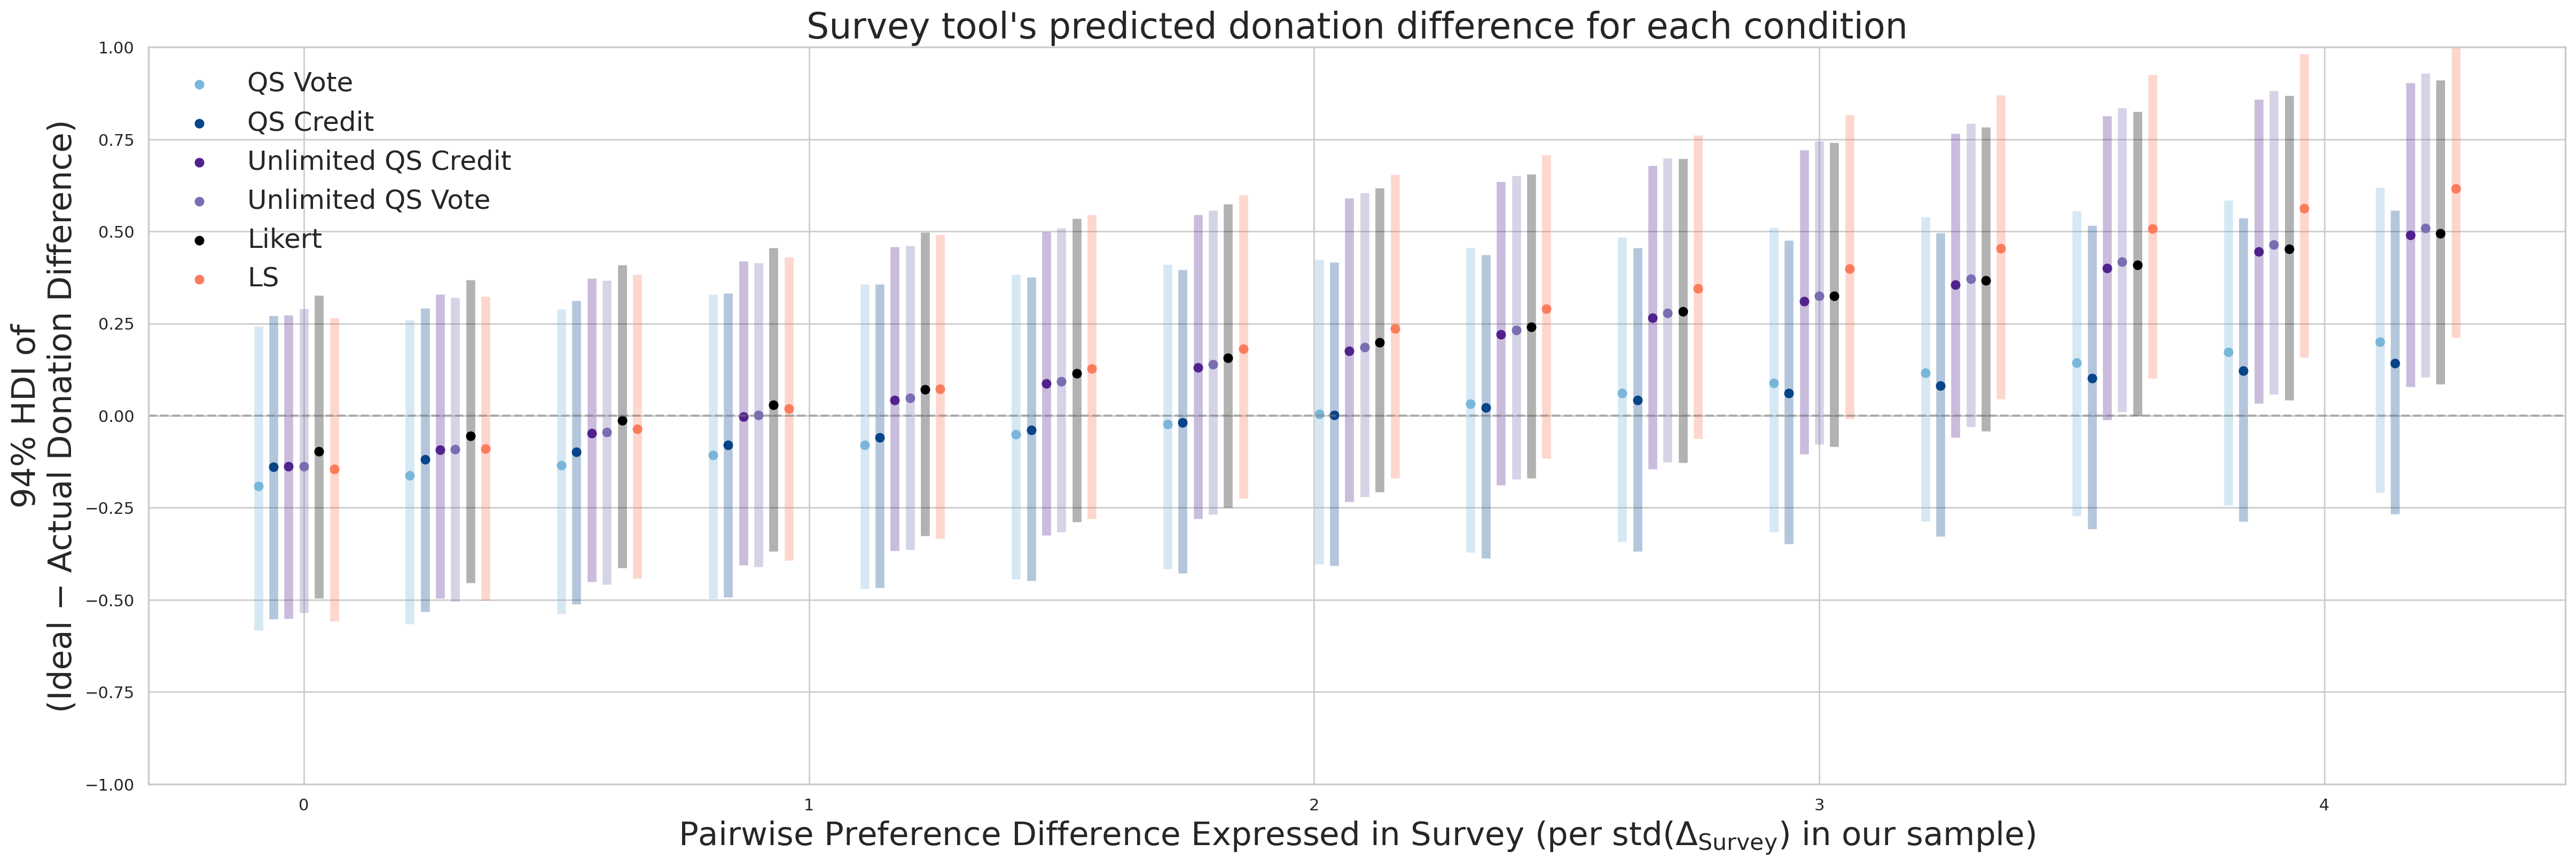

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from collections import defaultdict

########################################
# 1) PRECOMPUTE MEANS FROM THE POSTERIOR
########################################

order_data = model_data.posterior['b_order_bar'].mean(("chain"))
topic_data = model_data.posterior['b_topic_bar'].mean(("chain"))
sum_except_cond = topic_data * 2 + order_data

condition_data = model_data.posterior['b_cond'].mean(("chain"))
vote_data = model_data.posterior['b_vote'].mean(("chain"))
sigmas = model_data.posterior['b_sigma'].mean(("chain"))

conditions = [
    'likert', 'unlimited', 'unlimited_c',
    'qv36', 'qv108', 'qv324',
    'qv36_c', 'qv108_c', 'qv324_c',
    'lqv36', 'lqv108', 'lqv324'
]

pred_mus = []
pred_sigmas = []
pred_b_votes = []

for cond in conditions:
    b_cond = condition_data.sel(conditions=cond).values
    b_vote = vote_data.sel(conditions=cond).values
    b_sigma = sigmas.sel(conditions=cond).values
    mu = b_cond + b_vote * 0.5 + sum_except_cond
    pred_mus.append(mu)
    pred_sigmas.append(b_sigma)
    pred_b_votes.append(b_vote)

contrasts_abs = []
contrasts_rel = []
contrasts_ratio = []
likert_mu = pred_mus[0]
likert_sigma = pred_sigmas[0]
likert_b_vote = pred_b_votes[0]

plot_indices = [3, 4, 5, 6, 7, 8, 9, 10, 11]
selected_conditions = [conditions[i] for i in plot_indices]
selected_pred_mus = [pred_mus[i] for i in plot_indices]
selected_pred_sigmas = [pred_sigmas[i] for i in plot_indices]
selected_pred_b_votes = [pred_b_votes[i] for i in plot_indices]

for i in range(len(selected_conditions)):
    abs_effect = selected_pred_mus[i] - likert_mu
    pooled_sigma = np.sqrt(((selected_pred_sigmas[i] ** 2 + likert_sigma ** 2) / 2))
    rel_effect = abs_effect / pooled_sigma
    contrasts_abs.append(abs_effect)
    contrasts_rel.append(rel_effect)
    ratio_effect = selected_pred_b_votes[i] / likert_b_vote
    contrasts_ratio.append(ratio_effect)

########################################
# 2) CALCULATE HDIs, SUBTRACT THE RAW DIFF
########################################

def calculate_predictive_posterior_intervals(cond_offset_list, model_data, prob=0.94):
    import arviz as az

    b_cond_samples = model_data.posterior["b_cond"].mean(("chain"))
    b_vote_samples = model_data.posterior["b_vote"].mean(("chain"))
    b_order_samples = model_data.posterior["b_order_bar"]
    b_topic_samples = model_data.posterior["b_topic_bar"]

    sum_except_cond_samples = 2.0 * b_topic_samples + b_order_samples

    draws_list = []
    cond_names_order = []

    for cond_name, offset_used, raw_offset in cond_offset_list:
        b_cond_this = b_cond_samples.sel(conditions=cond_name)
        b_vote_this = b_vote_samples.sel(conditions=cond_name)
        mu_this = b_cond_this + b_vote_this * offset_used + sum_except_cond_samples
        shifted = raw_offset - mu_this   # How much people donated - what they say the difference is on the survey
        draws_list.append(shifted)
        cond_names_order.append(cond_name)

    grouped_ind_dict = {
      'Likert': [0],
      'Unlimited QS Vote': [1],
      'Unlimited QS Credit': [2],
      'QS Vote': [3, 4, 5],
      'QS Credit': [6, 7, 8],
      'LS': [9, 10, 11]
    }

    for cond, ind_list in grouped_ind_dict.items():
      pred_mu_sum = draws_list[ind_list[0]]

      for i in ind_list[1:]:
        pred_mu_sum += draws_list[i]

      pred_mu_avg = pred_mu_sum / len(ind_list)
      draws_list.append(pred_mu_avg)
      cond_names_order.append(cond)

    # print(len(draws_list))
    # print(cond_names_order)

    # Combine into a single DataArray and name it "value"
    mus_stacked = xr.concat(draws_list, dim="conditions_new")
    mus_stacked = mus_stacked.assign_coords({"conditions_new": cond_names_order})
    mus_stacked.name = "value"   # <--- NAME THE DATA
    # print(mus_stacked)

    # Use ArviZ HDI
    hdi_data = az.hdi(mus_stacked, hdi_prob=prob)
    # print(hdi_data)
    # Now hdi_data is a Dataset with var "value", dims: (conditions_new, hdi)

    mu_lower_da = hdi_data["value"].isel(hdi=0)   # DataArray for lower
    mu_upper_da = hdi_data["value"].isel(hdi=1)   # DataArray for upper
    mu_mean_da = mus_stacked.mean(dim=["chain", "draw"])  # Also a DataArray

    return mu_mean_da, mu_lower_da, mu_upper_da


########################################
# 3) BUILD THE DATA & CALL THE FUNCTION
########################################

SDs = np.arange(0, 4.21, 0.3)

condition_names = [
    'likert', 'unlimited', 'unlimited_c',
    'qv36', 'qv108', 'qv324',
    'qv36_c', 'qv108_c', 'qv324_c',
    'lqv36', 'lqv108', 'lqv324'
]

# plot_condition_names = [
#     'likert', 'unlimited', 'unlimited_c',
#     'qv108',
#     'qv108_c',
#     'lqv36'
# ]

plot_condition_names = [
  'QS Vote',
  'QS Credit',
  'Unlimited QS Credit',
  'Unlimited QS Vote',
  'Likert',
  'LS'
]

blue_palatte = sns.color_palette("Blues", 12)
orange_palette = sns.color_palette("Oranges", 8)
red_palette = sns.color_palette("Reds", 8)
green_palette = sns.color_palette("Greens", 8)
purple_palette = sns.color_palette("Purples", 8)

colors = {
    "likert": "#000000",
    "qv36": blue_palatte[2],
    "qv108": blue_palatte[3],
    "qv324": blue_palatte[4],
    "qv36_c": blue_palatte[7],
    "qv108_c": blue_palatte[8],
    "qv324_c": blue_palatte[9],
    "lqv36": red_palette[2],
    "lqv108": red_palette[3],
    "lqv324": red_palette[4],
    "unlimited": purple_palette[5],
    "unlimited_c": purple_palette[7],
    'Likert': "#000000",
    'Unlimited QS Vote': purple_palette[5],
    'Unlimited QS Credit': purple_palette[7],
    'QS Vote': blue_palatte[5],
    'QS Credit': blue_palatte[11],
    'LS': red_palette[3]
}

predicted_donations = {
    'SD': [],
    'condition': [],
    'mean': [],
    'lower': [],
    'upper': []
}

for sd_value in SDs:
    # For each SD, build offset for each condition
    raw_diff = 0.19 * sd_value
    transformed = (raw_diff + 1) / 2

    cond_offset_list = []
    for cond in condition_names:
        # If cond is in [likert, qv36, lqv36, etc.], use transformed offset
        # Otherwise, use raw_diff
        if cond in ['likert', 'qv36', 'qv108', 'qv324']:
            cond_offset_list.append((cond, transformed, raw_diff))
        else:
            cond_offset_list.append((cond, raw_diff, raw_diff))

    mu_mean, mu_lower, mu_upper = calculate_predictive_posterior_intervals(
        cond_offset_list, model_data, prob=0.94)

    for cond_name in plot_condition_names:
        predicted_donations['SD'].append(sd_value)
        predicted_donations['condition'].append(cond_name)
        predicted_donations['mean'].append(mu_mean.sel(conditions_new=cond_name).item())
        predicted_donations['lower'].append(mu_lower.sel(conditions_new=cond_name).item())
        predicted_donations['upper'].append(mu_upper.sel(conditions_new=cond_name).item())

# Group data by condition for plotting
results_by_cond = defaultdict(lambda: {"SD": [], "mean": [], "lower": [], "upper": []})
for i in range(len(predicted_donations['SD'])):
    c_name = predicted_donations['condition'][i]
    s_val = predicted_donations['SD'][i]
    mean   = predicted_donations['mean'][i]
    low   = predicted_donations['lower'][i]
    up    = predicted_donations['upper'][i]
    results_by_cond[c_name]["SD"].append(s_val)
    results_by_cond[c_name]["mean"].append(mean)
    results_by_cond[c_name]["lower"].append(low)
    results_by_cond[c_name]["upper"].append(up)

########################################
# 4) FINAL PLOT: NO LINES + JITTER
########################################

plt.figure(figsize=(24, 8))

shift_step = 0.03
condition_count = len(plot_condition_names)

for c_idx, cond_name in enumerate(plot_condition_names):
    sds_array = np.array(results_by_cond[cond_name]["SD"])
    sort_idx  = np.argsort(sds_array)

    sds_sorted = sds_array[sort_idx]
    mean_sorted = np.array(results_by_cond[cond_name]["mean"])[sort_idx]
    lows_sorted = np.array(results_by_cond[cond_name]["lower"])[sort_idx]
    ups_sorted  = np.array(results_by_cond[cond_name]["upper"])[sort_idx]

    # Horizontal jitter so intervals don’t collide
    shift = (c_idx - condition_count/2) * shift_step
    jittered_x = sds_sorted + shift

    color_used = colors.get(cond_name, 'black')
    # Scatter for mean, no connecting lines
    plt.scatter(jittered_x, mean_sorted, color=color_used, s=30, label=cond_name)
    # Vertical lines for intervals
    for x_pt, m_val, lo_val, up_val in zip(jittered_x, mean_sorted, lows_sorted, ups_sorted):
        plt.vlines(x_pt, lo_val, up_val, color=color_used, alpha=0.3, lw=6)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Survey tool's predicted donation difference for each condition", fontsize=24)
plt.ylabel("94% HDI of\n(Ideal − Actual Donation Difference)", fontsize=22)
plt.xlabel(r"Pairwise Preference Difference Expressed in Survey (per $\mathrm{std}(\Delta_{\mathrm{Survey}})$ in our sample)", fontsize=22)
plt.ylim(-1, 1)


# Make a single legend entry
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

print(plot_condition_names)
# Add legend
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=18, frameon=False)

plt.savefig(PLOT_PATH + "posterior_predictive_cumulative.pdf")


plt.show()
